# Init results

In [1]:
#%%capture
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import os
import cortex
import numpy as np
import matplotlib.pyplot as pl
from matplotlib import cm
import sys
import yaml
import time
from collections import defaultdict as dd
from scipy.stats import sem, ks_2samp
import seaborn as sns
import pandas as pds
import dill

opj = os.path.join

from prfpy.stimulus import PRFStimulus2D
from prfpy.model import Iso2DGaussianModel, CSS_Iso2DGaussianModel, Norm_Iso2DGaussianModel, DoG_Iso2DGaussianModel
from prfpy.fit import Iso2DGaussianFitter, Norm_Iso2DGaussianFitter, DoG_Iso2DGaussianFitter, CSS_Iso2DGaussianFitter

from prfpytools.preproc_utils import *
from prfpytools.postproc_utils import *
from prfpytools.visualize_results import visualize_results

from IPython.core.display import display, HTML

sound_file = '/Users/marcoaqil/Downloads/filling-your-inbox.mp3'

/Users/marcoaqil/anaconda3/envs/prfpy_2021/lib/python3.9/site-packages/nilearn/glm/__init__.py:55: FutureWarning: The nilearn.glm module is experimental. It may change in any future release of Nilearn.
  warn('The nilearn.glm module is experimental. '
/var/folders/vb/gdqfj5px0gb7r_bgl5hpf8n00000gn/T/ipykernel_99489/912037629.py:30: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
#results object
current_results = results()
                        

## Combine & Process results

In [7]:
current_results.combine_results(results_folder='/Volumes/Crucial_X8/SM-pRF/derivatives/prfpy', 
                    timecourse_folder='/Volumes/Crucial_X8/SM-pRF/derivatives/timecourses',
                                cvfold_comb='mean',
                               calculate_CCrsq=False,
                               calculate_noise_ceiling=True,
                               screenshot_paths=['/Volumes/Crucial_X8/SM-pRF/derivatives/2R_Screenshots'])

  0%|                                                                                                                                               | 0/28 [00:00<?, ?it/s]

[{'TR': 1.32, 'add_mean': True, 'analysis_time': '2023-06-28-16-15-04', 'batch_submission_system': 'slurm', 'crossvalidate': False, 'css_grid': True, 'data_path': '/home/marcoaq/SM-pRF/derivatives/nordic_pybest', 'data_scaling': 'psc', 'discard_volumes': 4, 'dm_edges_clipping': [8, 0, 0, 0], 'dog_grid': True, 'duration': '0:40', 'filter_predictions': False, 'filter_type': 'dc', 'first_modes_to_remove': 3, 'fit_runs': [0, 2, 4], 'fitting_space': 'fsnative', 'fix_bold_baseline': True, 'ftol': 1e-05, 'grid_fit_hrf_gauss': True, 'grid_fit_hrf_norm': True, 'highpass': True, 'hrf': [1, 2, 0], 'iter_fit_hrf': True, 'job_id': 11989263, 'last_modes_to_remove_percent': 0, 'min_percent_var': 0.1, 'models_to_fit': ['gauss', 'norm'], 'n_batches': 15, 'n_chunks': 200, 'n_jobs': 15, 'n_pix': 54, 'norm_full_grid': False, 'norm_model_variant': ['abcd', 'abc'], 'normalize_RFs': False, 'normalize_integral_dx': False, 'param_bounds': True, 'param_constraints': True, 'polyorder': 1, 'pos_prfs_only': True, 

/Users/marcoaqil/anaconda3/envs/prfpy_2021/lib/python3.9/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
  4%|████▊                                                                                                                                  | 1/28 [01:02<28:14, 62.75s/it]

[{'TR': 1.32, 'add_mean': True, 'analysis_time': '2023-06-28-16-15-07', 'batch_submission_system': 'slurm', 'crossvalidate': False, 'css_grid': True, 'data_path': '/home/marcoaq/SM-pRF/derivatives/nordic_pybest', 'data_scaling': 'psc', 'discard_volumes': 4, 'dm_edges_clipping': [11, 0, 0, 0], 'dog_grid': True, 'duration': '0:40', 'filter_predictions': False, 'filter_type': 'dc', 'first_modes_to_remove': 3, 'fit_runs': [0, 2, 4], 'fitting_space': 'fsnative', 'fix_bold_baseline': True, 'ftol': 1e-05, 'grid_fit_hrf_gauss': True, 'grid_fit_hrf_norm': True, 'highpass': True, 'hrf': [1, 2, 0], 'iter_fit_hrf': True, 'job_id': 11989297, 'last_modes_to_remove_percent': 0, 'min_percent_var': 0.1, 'models_to_fit': ['gauss', 'norm'], 'n_batches': 15, 'n_chunks': 200, 'n_jobs': 15, 'n_pix': 54, 'norm_full_grid': False, 'norm_model_variant': ['abcd', 'abc'], 'normalize_RFs': False, 'normalize_integral_dx': False, 'param_bounds': True, 'param_constraints': True, 'polyorder': 1, 'pos_prfs_only': True,

  7%|█████████▋                                                                                                                             | 2/28 [01:47<22:34, 52.10s/it]

[{'TR': 1.32, 'add_mean': True, 'analysis_time': '2023-06-28-16-15-10', 'batch_submission_system': 'slurm', 'crossvalidate': False, 'css_grid': True, 'data_path': '/home/marcoaq/SM-pRF/derivatives/nordic_pybest', 'data_scaling': 'psc', 'discard_volumes': 4, 'dm_edges_clipping': [13, 0, 0, 0], 'dog_grid': True, 'duration': '0:40', 'filter_predictions': False, 'filter_type': 'dc', 'first_modes_to_remove': 3, 'fit_runs': [0, 2, 4], 'fitting_space': 'fsnative', 'fix_bold_baseline': True, 'ftol': 1e-05, 'grid_fit_hrf_gauss': True, 'grid_fit_hrf_norm': True, 'highpass': True, 'hrf': [1, 2, 0], 'iter_fit_hrf': True, 'job_id': 11989331, 'last_modes_to_remove_percent': 0, 'min_percent_var': 0.1, 'models_to_fit': ['gauss', 'norm'], 'n_batches': 15, 'n_chunks': 200, 'n_jobs': 15, 'n_pix': 54, 'norm_full_grid': False, 'norm_model_variant': ['abcd', 'abc'], 'normalize_RFs': False, 'normalize_integral_dx': False, 'param_bounds': True, 'param_constraints': True, 'polyorder': 1, 'pos_prfs_only': True,

 11%|██████████████▍                                                                                                                        | 3/28 [02:29<19:49, 47.56s/it]

[{'TR': 1.32, 'add_mean': True, 'analysis_time': '2023-06-29-14-12-31', 'batch_submission_system': 'slurm', 'crossvalidate': False, 'css_grid': True, 'data_path': '/home/marcoaq/SM-pRF/derivatives/nordic_pybest', 'data_scaling': 'raw', 'discard_volumes': 4, 'dm_edges_clipping': [13, 0, 0, 0], 'dog_grid': True, 'duration': '0:40', 'filter_predictions': False, 'filter_type': 'dc', 'first_modes_to_remove': 3, 'fit_runs': [0, 2, 4], 'fitting_space': 'fsnative', 'fix_bold_baseline': True, 'ftol': 1e-05, 'grid_fit_hrf_gauss': True, 'grid_fit_hrf_norm': True, 'highpass': True, 'hrf': [1, 2, 0], 'iter_fit_hrf': True, 'job_id': 12031372, 'last_modes_to_remove_percent': 0, 'min_percent_var': 0.1, 'models_to_fit': ['gauss', 'norm'], 'n_batches': 15, 'n_chunks': 200, 'n_jobs': 15, 'n_pix': 54, 'norm_full_grid': False, 'norm_model_variant': ['abcd', 'abc'], 'normalize_RFs': False, 'normalize_integral_dx': False, 'param_bounds': True, 'param_constraints': True, 'polyorder': 1, 'pos_prfs_only': True,

 14%|███████████████████▎                                                                                                                   | 4/28 [02:29<11:33, 28.89s/it]

[{'TR': 1.32, 'add_mean': True, 'analysis_time': '2023-06-28-18-00-18', 'batch_submission_system': 'slurm', 'crossvalidate': False, 'css_grid': True, 'data_path': '/home/marcoaq/SM-pRF/derivatives/nordic_pybest', 'data_scaling': 'psc', 'discard_volumes': 4, 'dm_edges_clipping': [6, 0, 0, 0], 'dog_grid': True, 'duration': '0:40', 'filter_predictions': False, 'filter_type': 'dc', 'first_modes_to_remove': 3, 'fit_runs': [0, 2, 4], 'fitting_space': 'fsnative', 'fix_bold_baseline': True, 'ftol': 1e-05, 'grid_fit_hrf_gauss': True, 'grid_fit_hrf_norm': True, 'highpass': True, 'hrf': [1, 2, 0], 'iter_fit_hrf': True, 'job_id': 11993976, 'last_modes_to_remove_percent': 0, 'min_percent_var': 0.1, 'models_to_fit': ['gauss', 'norm'], 'n_batches': 15, 'n_chunks': 200, 'n_jobs': 15, 'n_pix': 54, 'norm_full_grid': False, 'norm_model_variant': ['abcd', 'abc'], 'normalize_RFs': False, 'normalize_integral_dx': False, 'param_bounds': True, 'param_constraints': True, 'polyorder': 1, 'pos_prfs_only': True, 

 18%|████████████████████████                                                                                                               | 5/28 [03:18<13:45, 35.91s/it]

[{'TR': 1.32, 'add_mean': True, 'analysis_time': '2023-06-28-18-00-21', 'batch_submission_system': 'slurm', 'crossvalidate': False, 'css_grid': True, 'data_path': '/home/marcoaq/SM-pRF/derivatives/nordic_pybest', 'data_scaling': 'psc', 'discard_volumes': 4, 'dm_edges_clipping': [9, 0, 0, 0], 'dog_grid': True, 'duration': '0:40', 'filter_predictions': False, 'filter_type': 'dc', 'first_modes_to_remove': 3, 'fit_runs': [0, 2, 4], 'fitting_space': 'fsnative', 'fix_bold_baseline': True, 'ftol': 1e-05, 'grid_fit_hrf_gauss': True, 'grid_fit_hrf_norm': True, 'highpass': True, 'hrf': [1, 2, 0], 'iter_fit_hrf': True, 'job_id': 11993997, 'last_modes_to_remove_percent': 0, 'min_percent_var': 0.1, 'models_to_fit': ['gauss', 'norm'], 'n_batches': 15, 'n_chunks': 200, 'n_jobs': 15, 'n_pix': 54, 'norm_full_grid': False, 'norm_model_variant': ['abcd', 'abc'], 'normalize_RFs': False, 'normalize_integral_dx': False, 'param_bounds': True, 'param_constraints': True, 'polyorder': 1, 'pos_prfs_only': True, 

 21%|████████████████████████████▉                                                                                                          | 6/28 [04:10<15:10, 41.37s/it]

[{'TR': 1.32, 'add_mean': True, 'analysis_time': '2023-06-28-18-00-25', 'batch_submission_system': 'slurm', 'crossvalidate': False, 'css_grid': True, 'data_path': '/home/marcoaq/SM-pRF/derivatives/nordic_pybest', 'data_scaling': 'psc', 'discard_volumes': 4, 'dm_edges_clipping': [14, 0, 0, 0], 'dog_grid': True, 'duration': '0:40', 'filter_predictions': False, 'filter_type': 'dc', 'first_modes_to_remove': 3, 'fit_runs': [0, 2, 4], 'fitting_space': 'fsnative', 'fix_bold_baseline': True, 'ftol': 1e-05, 'grid_fit_hrf_gauss': True, 'grid_fit_hrf_norm': True, 'highpass': True, 'hrf': [1, 2, 0], 'iter_fit_hrf': True, 'job_id': 11994018, 'last_modes_to_remove_percent': 0, 'min_percent_var': 0.1, 'models_to_fit': ['gauss', 'norm'], 'n_batches': 15, 'n_chunks': 200, 'n_jobs': 15, 'n_pix': 54, 'norm_full_grid': False, 'norm_model_variant': ['abcd', 'abc'], 'normalize_RFs': False, 'normalize_integral_dx': False, 'param_bounds': True, 'param_constraints': True, 'polyorder': 1, 'pos_prfs_only': True,

 25%|█████████████████████████████████▊                                                                                                     | 7/28 [05:01<15:39, 44.75s/it]

[{'TR': 1.32, 'add_mean': True, 'analysis_time': '2023-06-28-21-24-09', 'batch_submission_system': 'slurm', 'crossvalidate': False, 'css_grid': True, 'data_path': '/home/marcoaq/SM-pRF/derivatives/nordic_pybest', 'data_scaling': 'psc', 'discard_volumes': 4, 'dm_edges_clipping': [14, 0, 0, 0], 'dog_grid': True, 'duration': '0:40', 'filter_predictions': False, 'filter_type': 'dc', 'first_modes_to_remove': 3, 'fit_runs': [0, 2, 4], 'fitting_space': 'fsnative', 'fix_bold_baseline': True, 'ftol': 1e-05, 'grid_fit_hrf_gauss': True, 'grid_fit_hrf_norm': True, 'highpass': True, 'hrf': [1, 2, 0], 'iter_fit_hrf': True, 'job_id': 11996261, 'last_modes_to_remove_percent': 0, 'min_percent_var': 0.1, 'models_to_fit': ['gauss', 'norm'], 'n_batches': 15, 'n_chunks': 200, 'n_jobs': 15, 'n_pix': 54, 'norm_full_grid': False, 'norm_model_variant': ['abcd', 'abc'], 'normalize_RFs': False, 'normalize_integral_dx': False, 'param_bounds': True, 'param_constraints': True, 'polyorder': 1, 'pos_prfs_only': True,

 29%|██████████████████████████████████████▌                                                                                                | 8/28 [05:02<10:11, 30.59s/it]

[{'TR': 1.32, 'add_mean': True, 'analysis_time': '2023-06-28-21-47-04', 'batch_submission_system': 'slurm', 'crossvalidate': False, 'css_grid': True, 'data_path': '/home/marcoaq/SM-pRF/derivatives/nordic_pybest', 'data_scaling': 'psc', 'discard_volumes': 4, 'dm_edges_clipping': [7, 0, 0, 0], 'dog_grid': True, 'duration': '0:40', 'filter_predictions': False, 'filter_type': 'dc', 'first_modes_to_remove': 3, 'fit_runs': [0, 2, 4], 'fitting_space': 'fsnative', 'fix_bold_baseline': True, 'ftol': 1e-05, 'grid_fit_hrf_gauss': True, 'grid_fit_hrf_norm': True, 'highpass': True, 'hrf': [1, 2, 0], 'iter_fit_hrf': True, 'job_id': 11996524, 'last_modes_to_remove_percent': 0, 'min_percent_var': 0.1, 'models_to_fit': ['gauss', 'norm'], 'n_batches': 15, 'n_chunks': 200, 'n_jobs': 15, 'n_pix': 54, 'norm_full_grid': False, 'norm_model_variant': ['abcd', 'abc'], 'normalize_RFs': False, 'normalize_integral_dx': False, 'param_bounds': True, 'param_constraints': True, 'polyorder': 1, 'pos_prfs_only': True, 

 32%|███████████████████████████████████████████▍                                                                                           | 9/28 [05:39<10:19, 32.61s/it]

[{'TR': 1.32, 'add_mean': True, 'analysis_time': '2023-06-28-21-47-10', 'batch_submission_system': 'slurm', 'crossvalidate': False, 'css_grid': True, 'data_path': '/home/marcoaq/SM-pRF/derivatives/nordic_pybest', 'data_scaling': 'psc', 'discard_volumes': 4, 'dm_edges_clipping': [12, 0, 0, 0], 'dog_grid': True, 'duration': '0:40', 'filter_predictions': False, 'filter_type': 'dc', 'first_modes_to_remove': 3, 'fit_runs': [0, 2, 4], 'fitting_space': 'fsnative', 'fix_bold_baseline': True, 'ftol': 1e-05, 'grid_fit_hrf_gauss': True, 'grid_fit_hrf_norm': True, 'highpass': True, 'hrf': [1, 2, 0], 'iter_fit_hrf': True, 'job_id': 11996545, 'last_modes_to_remove_percent': 0, 'min_percent_var': 0.1, 'models_to_fit': ['gauss', 'norm'], 'n_batches': 15, 'n_chunks': 200, 'n_jobs': 15, 'n_pix': 54, 'norm_full_grid': False, 'norm_model_variant': ['abcd', 'abc'], 'normalize_RFs': False, 'normalize_integral_dx': False, 'param_bounds': True, 'param_constraints': True, 'polyorder': 1, 'pos_prfs_only': True,

 36%|███████████████████████████████████████████████▊                                                                                      | 10/28 [06:16<10:10, 33.94s/it]

[{'TR': 1.32, 'add_mean': True, 'analysis_time': '2023-06-28-21-47-18', 'batch_submission_system': 'slurm', 'crossvalidate': False, 'css_grid': True, 'data_path': '/home/marcoaq/SM-pRF/derivatives/nordic_pybest', 'data_scaling': 'psc', 'discard_volumes': 4, 'dm_edges_clipping': [13, 0, 0, 0], 'dog_grid': True, 'duration': '0:40', 'filter_predictions': False, 'filter_type': 'dc', 'first_modes_to_remove': 3, 'fit_runs': [0, 2, 4], 'fitting_space': 'fsnative', 'fix_bold_baseline': True, 'ftol': 1e-05, 'grid_fit_hrf_gauss': True, 'grid_fit_hrf_norm': True, 'highpass': True, 'hrf': [1, 2, 0], 'iter_fit_hrf': True, 'job_id': 11996566, 'last_modes_to_remove_percent': 0, 'min_percent_var': 0.1, 'models_to_fit': ['gauss', 'norm'], 'n_batches': 15, 'n_chunks': 200, 'n_jobs': 15, 'n_pix': 54, 'norm_full_grid': False, 'norm_model_variant': ['abcd', 'abc'], 'normalize_RFs': False, 'normalize_integral_dx': False, 'param_bounds': True, 'param_constraints': True, 'polyorder': 1, 'pos_prfs_only': True,

 43%|█████████████████████████████████████████████████████████▍                                                                            | 12/28 [06:51<06:24, 24.02s/it]

[{'TR': 1.32, 'add_mean': True, 'analysis_time': '2023-06-28-21-46-54', 'batch_submission_system': 'slurm', 'crossvalidate': False, 'css_grid': True, 'data_path': '/home/marcoaq/SM-pRF/derivatives/nordic_pybest', 'data_scaling': 'psc', 'discard_volumes': 4, 'dm_edges_clipping': [14, 0, 0, 0], 'dog_grid': True, 'duration': '0:40', 'filter_predictions': False, 'filter_type': 'dc', 'first_modes_to_remove': 3, 'fit_runs': [0, 2, 4], 'fitting_space': 'fsnative', 'fix_bold_baseline': True, 'ftol': 1e-05, 'grid_fit_hrf_gauss': True, 'grid_fit_hrf_norm': True, 'highpass': True, 'hrf': [1, 2, 0], 'iter_fit_hrf': True, 'job_id': 11996503, 'last_modes_to_remove_percent': 0, 'min_percent_var': 0.1, 'models_to_fit': ['gauss', 'norm'], 'n_batches': 15, 'n_chunks': 200, 'n_jobs': 15, 'n_pix': 54, 'norm_full_grid': False, 'norm_model_variant': ['abcd', 'abc'], 'normalize_RFs': False, 'normalize_integral_dx': False, 'param_bounds': True, 'param_constraints': True, 'polyorder': 1, 'pos_prfs_only': True,

 46%|██████████████████████████████████████████████████████████████▏                                                                       | 13/28 [07:32<07:17, 29.15s/it]

[{'TR': 1.32, 'add_mean': True, 'analysis_time': '2023-06-28-22-29-52', 'batch_submission_system': 'slurm', 'crossvalidate': False, 'css_grid': True, 'data_path': '/home/marcoaq/SM-pRF/derivatives/nordic_pybest', 'data_scaling': 'psc', 'discard_volumes': 4, 'dm_edges_clipping': [12, 0, 0, 0], 'dog_grid': True, 'duration': '0:40', 'filter_predictions': False, 'filter_type': 'dc', 'first_modes_to_remove': 3, 'fit_runs': [0, 2, 4], 'fitting_space': 'fsnative', 'fix_bold_baseline': True, 'ftol': 1e-05, 'grid_fit_hrf_gauss': True, 'grid_fit_hrf_norm': True, 'highpass': True, 'hrf': [1, 2, 0], 'iter_fit_hrf': True, 'job_id': 11997104, 'last_modes_to_remove_percent': 0, 'min_percent_var': 0.1, 'models_to_fit': ['gauss', 'norm'], 'n_batches': 15, 'n_chunks': 200, 'n_jobs': 15, 'n_pix': 54, 'norm_full_grid': False, 'norm_model_variant': ['abcd', 'abc'], 'normalize_RFs': False, 'normalize_integral_dx': False, 'param_bounds': True, 'param_constraints': True, 'polyorder': 1, 'pos_prfs_only': True,

 50%|███████████████████████████████████████████████████████████████████                                                                   | 14/28 [08:23<08:17, 35.52s/it]

[{'TR': 1.32, 'add_mean': True, 'analysis_time': '2023-06-28-22-29-55', 'batch_submission_system': 'slurm', 'crossvalidate': False, 'css_grid': True, 'data_path': '/home/marcoaq/SM-pRF/derivatives/nordic_pybest', 'data_scaling': 'psc', 'discard_volumes': 4, 'dm_edges_clipping': [16, 0, 0, 0], 'dog_grid': True, 'duration': '0:40', 'filter_predictions': False, 'filter_type': 'dc', 'first_modes_to_remove': 3, 'fit_runs': [0, 2, 4], 'fitting_space': 'fsnative', 'fix_bold_baseline': True, 'ftol': 1e-05, 'grid_fit_hrf_gauss': True, 'grid_fit_hrf_norm': True, 'highpass': True, 'hrf': [1, 2, 0], 'iter_fit_hrf': True, 'job_id': 11997105, 'last_modes_to_remove_percent': 0, 'min_percent_var': 0.1, 'models_to_fit': ['gauss', 'norm'], 'n_batches': 15, 'n_chunks': 200, 'n_jobs': 15, 'n_pix': 54, 'norm_full_grid': False, 'norm_model_variant': ['abcd', 'abc'], 'normalize_RFs': False, 'normalize_integral_dx': False, 'param_bounds': True, 'param_constraints': True, 'polyorder': 1, 'pos_prfs_only': True,

 54%|███████████████████████████████████████████████████████████████████████▊                                                              | 15/28 [09:13<08:42, 40.17s/it]

[{'TR': 1.32, 'add_mean': True, 'analysis_time': '2023-06-28-22-29-43', 'batch_submission_system': 'slurm', 'crossvalidate': False, 'css_grid': True, 'data_path': '/home/marcoaq/SM-pRF/derivatives/nordic_pybest', 'data_scaling': 'psc', 'discard_volumes': 4, 'dm_edges_clipping': [16, 0, 0, 0], 'dog_grid': True, 'duration': '0:40', 'filter_predictions': False, 'filter_type': 'dc', 'first_modes_to_remove': 3, 'fit_runs': [0, 2, 4], 'fitting_space': 'fsnative', 'fix_bold_baseline': True, 'ftol': 1e-05, 'grid_fit_hrf_gauss': True, 'grid_fit_hrf_norm': True, 'highpass': True, 'hrf': [1, 2, 0], 'iter_fit_hrf': True, 'job_id': 11997102, 'last_modes_to_remove_percent': 0, 'min_percent_var': 0.1, 'models_to_fit': ['gauss', 'norm'], 'n_batches': 15, 'n_chunks': 200, 'n_jobs': 15, 'n_pix': 54, 'norm_full_grid': False, 'norm_model_variant': ['abcd', 'abc'], 'normalize_RFs': False, 'normalize_integral_dx': False, 'param_bounds': True, 'param_constraints': True, 'polyorder': 1, 'pos_prfs_only': True,

 57%|████████████████████████████████████████████████████████████████████████████▌                                                         | 16/28 [09:14<05:37, 28.15s/it]

[{'TR': 1.32, 'add_mean': True, 'analysis_time': '2023-06-28-23-11-45', 'batch_submission_system': 'slurm', 'crossvalidate': False, 'css_grid': True, 'data_path': '/home/marcoaq/SM-pRF/derivatives/nordic_pybest', 'data_scaling': 'psc', 'discard_volumes': 4, 'dm_edges_clipping': [12, 0, 0, 0], 'dog_grid': True, 'duration': '0:40', 'filter_predictions': False, 'filter_type': 'dc', 'first_modes_to_remove': 3, 'fit_runs': [0, 2, 4], 'fitting_space': 'fsnative', 'fix_bold_baseline': True, 'ftol': 1e-05, 'grid_fit_hrf_gauss': True, 'grid_fit_hrf_norm': True, 'highpass': True, 'hrf': [1, 2, 0], 'iter_fit_hrf': True, 'job_id': 11997562, 'last_modes_to_remove_percent': 0, 'min_percent_var': 0.1, 'models_to_fit': ['gauss', 'norm'], 'n_batches': 15, 'n_chunks': 200, 'n_jobs': 15, 'n_pix': 54, 'norm_full_grid': False, 'norm_model_variant': ['abcd', 'abc'], 'normalize_RFs': False, 'normalize_integral_dx': False, 'param_bounds': True, 'param_constraints': True, 'polyorder': 1, 'pos_prfs_only': True,

 61%|█████████████████████████████████████████████████████████████████████████████████▎                                                    | 17/28 [09:47<05:27, 29.80s/it]

[{'TR': 1.32, 'add_mean': True, 'analysis_time': '2023-06-28-23-11-48', 'batch_submission_system': 'slurm', 'crossvalidate': False, 'css_grid': True, 'data_path': '/home/marcoaq/SM-pRF/derivatives/nordic_pybest', 'data_scaling': 'psc', 'discard_volumes': 4, 'dm_edges_clipping': [11, 0, 0, 0], 'dog_grid': True, 'duration': '0:40', 'filter_predictions': False, 'filter_type': 'dc', 'first_modes_to_remove': 3, 'fit_runs': [0, 2, 4], 'fitting_space': 'fsnative', 'fix_bold_baseline': True, 'ftol': 1e-05, 'grid_fit_hrf_gauss': True, 'grid_fit_hrf_norm': True, 'highpass': True, 'hrf': [1, 2, 0], 'iter_fit_hrf': True, 'job_id': 11997565, 'last_modes_to_remove_percent': 0, 'min_percent_var': 0.1, 'models_to_fit': ['gauss', 'norm'], 'n_batches': 15, 'n_chunks': 200, 'n_jobs': 15, 'n_pix': 54, 'norm_full_grid': False, 'norm_model_variant': ['abcd', 'abc'], 'normalize_RFs': False, 'normalize_integral_dx': False, 'param_bounds': True, 'param_constraints': True, 'polyorder': 1, 'pos_prfs_only': True,

 64%|██████████████████████████████████████████████████████████████████████████████████████▏                                               | 18/28 [10:21<05:08, 30.88s/it]

[{'TR': 1.32, 'add_mean': True, 'analysis_time': '2023-06-28-23-11-53', 'batch_submission_system': 'slurm', 'crossvalidate': False, 'css_grid': True, 'data_path': '/home/marcoaq/SM-pRF/derivatives/nordic_pybest', 'data_scaling': 'psc', 'discard_volumes': 4, 'dm_edges_clipping': [16, 0, 0, 0], 'dog_grid': True, 'duration': '0:40', 'filter_predictions': False, 'filter_type': 'dc', 'first_modes_to_remove': 3, 'fit_runs': [0, 2, 4], 'fitting_space': 'fsnative', 'fix_bold_baseline': True, 'ftol': 1e-05, 'grid_fit_hrf_gauss': True, 'grid_fit_hrf_norm': True, 'highpass': True, 'hrf': [1, 2, 0], 'iter_fit_hrf': True, 'job_id': 11997567, 'last_modes_to_remove_percent': 0, 'min_percent_var': 0.1, 'models_to_fit': ['gauss', 'norm'], 'n_batches': 15, 'n_chunks': 200, 'n_jobs': 15, 'n_pix': 54, 'norm_full_grid': False, 'norm_model_variant': ['abcd', 'abc'], 'normalize_RFs': False, 'normalize_integral_dx': False, 'param_bounds': True, 'param_constraints': True, 'polyorder': 1, 'pos_prfs_only': True,

 68%|██████████████████████████████████████████████████████████████████████████████████████████▉                                           | 19/28 [10:54<04:44, 31.65s/it]

[{'TR': 1.32, 'add_mean': True, 'analysis_time': '2023-06-28-23-11-25', 'batch_submission_system': 'slurm', 'crossvalidate': False, 'css_grid': True, 'data_path': '/home/marcoaq/SM-pRF/derivatives/nordic_pybest', 'data_scaling': 'psc', 'discard_volumes': 4, 'dm_edges_clipping': [20, 0, 0, 0], 'dog_grid': True, 'duration': '0:40', 'filter_predictions': False, 'filter_type': 'dc', 'first_modes_to_remove': 3, 'fit_runs': [0, 2, 4], 'fitting_space': 'fsnative', 'fix_bold_baseline': True, 'ftol': 1e-05, 'grid_fit_hrf_gauss': True, 'grid_fit_hrf_norm': True, 'highpass': True, 'hrf': [1, 2, 0], 'iter_fit_hrf': True, 'job_id': 11997553, 'last_modes_to_remove_percent': 0, 'min_percent_var': 0.1, 'models_to_fit': ['gauss', 'norm'], 'n_batches': 15, 'n_chunks': 200, 'n_jobs': 15, 'n_pix': 54, 'norm_full_grid': False, 'norm_model_variant': ['abcd', 'abc'], 'normalize_RFs': False, 'normalize_integral_dx': False, 'param_bounds': True, 'param_constraints': True, 'polyorder': 1, 'pos_prfs_only': True,

 71%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                      | 20/28 [10:54<02:57, 22.21s/it]

[{'TR': 1.32, 'add_mean': True, 'analysis_time': '2023-06-29-12-16-53', 'batch_submission_system': 'slurm', 'crossvalidate': False, 'css_grid': True, 'data_path': '/home/marcoaq/SM-pRF/derivatives/nordic_pybest', 'data_scaling': 'psc', 'discard_volumes': 4, 'dm_edges_clipping': [9, 0, 0, 0], 'dog_grid': True, 'duration': '0:40', 'filter_predictions': False, 'filter_type': 'dc', 'first_modes_to_remove': 3, 'fit_runs': [0, 2, 4], 'fitting_space': 'fsnative', 'fix_bold_baseline': True, 'ftol': 1e-05, 'grid_fit_hrf_gauss': True, 'grid_fit_hrf_norm': True, 'highpass': True, 'hrf': [1, 2, 0], 'iter_fit_hrf': True, 'job_id': 12030489, 'last_modes_to_remove_percent': 0, 'min_percent_var': 0.1, 'models_to_fit': ['gauss', 'norm'], 'n_batches': 15, 'n_chunks': 200, 'n_jobs': 15, 'n_pix': 54, 'norm_full_grid': False, 'norm_model_variant': ['abcd', 'abc'], 'normalize_RFs': False, 'normalize_integral_dx': False, 'param_bounds': True, 'param_constraints': True, 'polyorder': 1, 'pos_prfs_only': True, 

 75%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 21/28 [11:26<02:55, 25.13s/it]

[{'TR': 1.32, 'add_mean': True, 'analysis_time': '2023-06-29-12-16-56', 'batch_submission_system': 'slurm', 'crossvalidate': False, 'css_grid': True, 'data_path': '/home/marcoaq/SM-pRF/derivatives/nordic_pybest', 'data_scaling': 'psc', 'discard_volumes': 4, 'dm_edges_clipping': [10, 0, 0, 0], 'dog_grid': True, 'duration': '0:40', 'filter_predictions': False, 'filter_type': 'dc', 'first_modes_to_remove': 3, 'fit_runs': [0, 2, 4], 'fitting_space': 'fsnative', 'fix_bold_baseline': True, 'ftol': 1e-05, 'grid_fit_hrf_gauss': True, 'grid_fit_hrf_norm': True, 'highpass': True, 'hrf': [1, 2, 0], 'iter_fit_hrf': True, 'job_id': 12030510, 'last_modes_to_remove_percent': 0, 'min_percent_var': 0.1, 'models_to_fit': ['gauss', 'norm'], 'n_batches': 15, 'n_chunks': 200, 'n_jobs': 15, 'n_pix': 54, 'norm_full_grid': False, 'norm_model_variant': ['abcd', 'abc'], 'normalize_RFs': False, 'normalize_integral_dx': False, 'param_bounds': True, 'param_constraints': True, 'polyorder': 1, 'pos_prfs_only': True,

 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎                            | 22/28 [11:59<02:44, 27.46s/it]

[{'TR': 1.32, 'add_mean': True, 'analysis_time': '2023-06-29-12-16-58', 'batch_submission_system': 'slurm', 'crossvalidate': False, 'css_grid': True, 'data_path': '/home/marcoaq/SM-pRF/derivatives/nordic_pybest', 'data_scaling': 'psc', 'discard_volumes': 4, 'dm_edges_clipping': [11, 0, 0, 0], 'dog_grid': True, 'duration': '0:40', 'filter_predictions': False, 'filter_type': 'dc', 'first_modes_to_remove': 3, 'fit_runs': [0, 2, 4], 'fitting_space': 'fsnative', 'fix_bold_baseline': True, 'ftol': 1e-05, 'grid_fit_hrf_gauss': True, 'grid_fit_hrf_norm': True, 'highpass': True, 'hrf': [1, 2, 0], 'iter_fit_hrf': True, 'job_id': 12030531, 'last_modes_to_remove_percent': 0, 'min_percent_var': 0.1, 'models_to_fit': ['gauss', 'norm'], 'n_batches': 15, 'n_chunks': 200, 'n_jobs': 15, 'n_pix': 54, 'norm_full_grid': False, 'norm_model_variant': ['abcd', 'abc'], 'normalize_RFs': False, 'normalize_integral_dx': False, 'param_bounds': True, 'param_constraints': True, 'polyorder': 1, 'pos_prfs_only': True,

 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 24/28 [12:34<01:22, 20.71s/it]

[{'TR': 1.32, 'add_mean': True, 'analysis_time': '2023-06-29-12-17-07', 'batch_submission_system': 'slurm', 'crossvalidate': False, 'css_grid': True, 'data_path': '/home/marcoaq/SM-pRF/derivatives/nordic_pybest', 'data_scaling': 'psc', 'discard_volumes': 4, 'dm_edges_clipping': [11, 0, 0, 0], 'dog_grid': True, 'duration': '0:40', 'filter_predictions': False, 'filter_type': 'dc', 'first_modes_to_remove': 3, 'fit_runs': [0, 2, 4], 'fitting_space': 'fsnative', 'fix_bold_baseline': True, 'ftol': 1e-05, 'grid_fit_hrf_gauss': True, 'grid_fit_hrf_norm': True, 'highpass': True, 'hrf': [1, 2, 0], 'iter_fit_hrf': True, 'job_id': 12030552, 'last_modes_to_remove_percent': 0, 'min_percent_var': 0.1, 'models_to_fit': ['gauss', 'norm'], 'n_batches': 15, 'n_chunks': 200, 'n_jobs': 15, 'n_pix': 54, 'norm_full_grid': False, 'norm_model_variant': ['abcd', 'abc'], 'normalize_RFs': False, 'normalize_integral_dx': False, 'param_bounds': True, 'param_constraints': True, 'polyorder': 1, 'pos_prfs_only': True,

 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 25/28 [13:19<01:24, 28.13s/it]

[{'TR': 1.32, 'add_mean': True, 'analysis_time': '2023-06-29-00-05-36', 'batch_submission_system': 'slurm', 'crossvalidate': False, 'css_grid': True, 'data_path': '/home/marcoaq/SM-pRF/derivatives/nordic_pybest', 'data_scaling': 'psc', 'discard_volumes': 4, 'dm_edges_clipping': [12, 0, 0, 0], 'dog_grid': True, 'duration': '0:40', 'filter_predictions': False, 'filter_type': 'dc', 'first_modes_to_remove': 3, 'fit_runs': [0, 2, 4], 'fitting_space': 'fsnative', 'fix_bold_baseline': True, 'ftol': 1e-05, 'grid_fit_hrf_gauss': True, 'grid_fit_hrf_norm': True, 'highpass': True, 'hrf': [1, 2, 0], 'iter_fit_hrf': True, 'job_id': 12004339, 'last_modes_to_remove_percent': 0, 'min_percent_var': 0.1, 'models_to_fit': ['gauss', 'norm'], 'n_batches': 15, 'n_chunks': 200, 'n_jobs': 15, 'n_pix': 54, 'norm_full_grid': False, 'norm_model_variant': ['abcd', 'abc'], 'normalize_RFs': False, 'normalize_integral_dx': False, 'param_bounds': True, 'param_constraints': True, 'polyorder': 1, 'pos_prfs_only': True,

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 26/28 [14:02<01:05, 32.62s/it]

[{'TR': 1.32, 'add_mean': True, 'analysis_time': '2023-06-29-00-05-38', 'batch_submission_system': 'slurm', 'crossvalidate': False, 'css_grid': True, 'data_path': '/home/marcoaq/SM-pRF/derivatives/nordic_pybest', 'data_scaling': 'psc', 'discard_volumes': 4, 'dm_edges_clipping': [11, 0, 0, 0], 'dog_grid': True, 'duration': '0:40', 'filter_predictions': False, 'filter_type': 'dc', 'first_modes_to_remove': 3, 'fit_runs': [0, 2, 4], 'fitting_space': 'fsnative', 'fix_bold_baseline': True, 'ftol': 1e-05, 'grid_fit_hrf_gauss': True, 'grid_fit_hrf_norm': True, 'highpass': True, 'hrf': [1, 2, 0], 'iter_fit_hrf': True, 'job_id': 12004371, 'last_modes_to_remove_percent': 0, 'min_percent_var': 0.1, 'models_to_fit': ['gauss', 'norm'], 'n_batches': 15, 'n_chunks': 200, 'n_jobs': 15, 'n_pix': 54, 'norm_full_grid': False, 'norm_model_variant': ['abcd', 'abc'], 'normalize_RFs': False, 'normalize_integral_dx': False, 'param_bounds': True, 'param_constraints': True, 'polyorder': 1, 'pos_prfs_only': True,

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [14:42<00:00, 24.43s/it]

[{'TR': 1.32, 'add_mean': True, 'analysis_time': '2023-06-29-00-05-24', 'batch_submission_system': 'slurm', 'crossvalidate': False, 'css_grid': True, 'data_path': '/home/marcoaq/SM-pRF/derivatives/nordic_pybest', 'data_scaling': 'psc', 'discard_volumes': 4, 'dm_edges_clipping': [12, 0, 0, 0], 'dog_grid': True, 'duration': '0:40', 'filter_predictions': False, 'filter_type': 'dc', 'first_modes_to_remove': 3, 'fit_runs': [0, 2, 4], 'fitting_space': 'fsnative', 'fix_bold_baseline': True, 'ftol': 1e-05, 'grid_fit_hrf_gauss': True, 'grid_fit_hrf_norm': True, 'highpass': True, 'hrf': [1, 2, 0], 'iter_fit_hrf': True, 'job_id': 12004225, 'last_modes_to_remove_percent': 0, 'min_percent_var': 0.1, 'models_to_fit': ['gauss', 'norm'], 'n_batches': 15, 'n_chunks': 200, 'n_jobs': 15, 'n_pix': 54, 'norm_full_grid': False, 'norm_model_variant': ['abcd', 'abc'], 'normalize_RFs': False, 'normalize_integral_dx': False, 'param_bounds': True, 'param_constraints': True, 'polyorder': 1, 'pos_prfs_only': True,

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [14:42<00:00, 31.53s/it]


In [55]:
#mergedict_OR(current_results.main_dict,vis_res.main_dict)

In [8]:
current_results.process_results(current_results.main_dict,
                                compute_suppression_index = False,
                                return_norm_profiles = False,
                               compute_fwhmax_fwatmin = False)

  0%|                                                                                                                                                | 0/1 [00:00<?, ?it/s]

  0%|                                                                                                                                               | 0/28 [00:00<?, ?it/s]/Users/marcoaqil/prfpytools/prfpytools/postproc_utils.py:457: RuntimeWarning: invalid value encountered in divide
  processed_results['Size ratio (sigma_2/sigma_1)'][k2][mask] = v2[:,6]/v2[:,2]
/Users/marcoaqil/prfpytools/prfpytools/postproc_utils.py:460: RuntimeWarning: invalid value encountered in divide
  processed_results['Ratio (B/D)'][k2][mask] = v2[:,7]/v2[:,8]


  4%|████▊                                                                                                                                  | 1/28 [00:00<00:10,  2.52it/s]

  7%|█████████▋                                                                                               

# Init visualize results

In [3]:
vis_res = visualize_results(current_results)

In [7]:
for ss, ee in vis_res.main_dict['fsnative']['fit-task-2R_fit-runs-CVmean'].items():
    vis_res.main_dict['fsnative']['fit-task-2R_fit-runs-all'][ss]['Processed Results']['RSq'] = ee['Processed Results']['RSq']

In [11]:
current_results.main_dict['fsnative'].keys()

dict_keys(['fit-task-2R_fit-runs-all'])

## Fix HCP MSMall ordering (run once on HCP data)

In [24]:
#fix HCP ordering
if 'HCP' in vis_res.main_dict:
    hcp_atlas_mask_path = ['/Volumes/Crucial_X8/PRFMapping/PRFMapping-HCP/HCP_data/atlas/L.atlasroi.59k_fs_LR.shape.gii',
                          '/Volumes/Crucial_X8/PRFMapping/PRFMapping-HCP/HCP_data/atlas/R.atlasroi.59k_fs_LR.shape.gii']
    vis_res.fix_hcp_ordering(vis_res.main_dict['HCP'], hcp_atlas_mask_path)

## Load previous visualize_result.main_dict

In [4]:
#extremely useful in cases of having to unpickle objects when class/module/function names have been changed
class RenameUnpickler(dill.Unpickler):
    def find_class(self, module, name):
        renamed_module = module
        if "utils." in module:
            renamed_module = module.replace("utils.","prfpytools.")

        return super(RenameUnpickler, self).find_class(renamed_module, name)

def renamed_load(file_obj):
    return RenameUnpickler(file_obj).load()

In [5]:
#rsqwm have rsq-weighted means over subjects on fsaverage
#maindict_newhrf#maindict_nordic#maindict_nordic_pybest#maindict_nordic_pybest_nohrf#maindict_nordic_pybest_cv#maindict_nordic_pybest_cvrsqcomb
#maindict_nordic_pybest_nonegprfs #maindict_nordic_pybest_nonegprfs_notc #maindict_nordic_pybest_nonegprfs_monstergrid
###########
#maindict_base #maindict_fullpipe
with open('/Volumes/Crucial_X8/maindict_smprf_ncdiff_rsq_fsavg.pickle', 'rb') as handle:
    vis_res.main_dict=renamed_load(handle)

In [16]:
[vis_res.main_dict['fsnative']['fit-task-2R_fit-runs-all']['sub-001_ses-2']['Timecourse Stats'][aa].sum() for aa in vis_res.main_dict['fsnative']['fit-task-2R_fit-runs-all']['sub-006_ses-2']['Timecourse Stats'].keys()]

[1214221861191.6719,
 207860282744380.0,
 54620935.39754486,
 -62235631271.16406,
 -334567886635550.0,
 19607955.26148987]

In [17]:
vis_res.main_dict['fsnative']['fit-task-2R_fit-runs-all']['sub-001_ses-2']['Timecourse Stats']['TSNR']

array([ 93.89867401, 114.42288971, 106.48734283, ...,   0.        ,
       137.66204834, 209.0471344 ])

In [15]:
vis_res.main_dict['fsaverage']['fit-task-2R_fit-runs-all']['sub-003_ses-2']['Processed Results']['RSq']['Norm_abcd'].keys()

AttributeError: 'numpy.ndarray' object has no attribute 'keys'

## Save current visualize_result.main_dict

In [20]:
with open('/Volumes/Crucial_X8/maindict_smprf_fsavg.pickle', 'wb') as handle:
     dill.dump(vis_res.main_dict, handle)

## Load/Save rois (run always)

In [6]:
#this function parses or imports labaled ROIs for all subjects (run always)
#set to list of ROI names to output indices of rois for roi-only fitting. empty list for no output
output_rois = []#['custom.OccPole', 'custom.V1','custom.V2','custom.V3','custom.hV4','custom.VO',
                      #'custom.V3AB','custom.LO','custom.TO','custom.IPS','custom.FO']
    
#import flatmaps from freesurfer, if created, and import freesurfer custom rois to pycortex overlays.svg (need pre-imported flatmaps for this)
import_flatmaps = False

output_rois_path = '/Volumes/Crucial_X8/SM-pRF/derivatives' #/Volumes/Crucial_X8/PRFMapping/PRFMapping-Deriv-hires
#freesurfer directory
fs_dir = '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer'

#HCP atlas path (without .{hemi}.gii)
hcp_atlas_path = '/Volumes/Crucial_X8/PRFMapping/PRFMapping-HCP/HCP_data/atlas/Q1-Q6_RelatedParcellation210.CorticalAreas_dil_Colors.59k_fs_LR.dlabel' 

vis_res.define_rois_and_flatmaps(fs_dir, output_rois_path, import_flatmaps, output_rois, hcp_atlas_path)

vis_res.compute_roi_borders(subject_ids = ['sub-001_ses-1'], rois_prefix='custom', previous_borders_path='/Users/marcoaqil/custom_borders_sub001.npy')
#, only_rois = ['V1','V2', 'V3','V3AB','hV4','LO','TO','VO','IPS'],  previous_borders_path='/Users/marcoaqil/wang_borders_sub001.npy')
    

looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/lh.wang2015atlas.V1v.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/rh.wang2015atlas.V1v.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/lh.wang2015atlas.V1d.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/rh.wang2015atlas.V1d.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/lh.wang2015atlas.V2v.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/rh.wang2015atlas.V2v.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/lh.wang2015atlas.V2d.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/rh.wang2015atlas.V2d.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/lh.wang2015atlas.V3v.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/rh.wang2015atlas.V3v.lab

looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/lh.custom.VO.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/rh.custom.VO.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/lh.wang2015atlas.V1v.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/rh.wang2015atlas.V1v.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/lh.wang2015atlas.V1d.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/rh.wang2015atlas.V1d.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/lh.wang2015atlas.V2v.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/rh.wang2015atlas.V2v.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/lh.wang2015atlas.V2d.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/rh.wang2015atlas.V2d.label']
looking for

looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/lh.custom.LO.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/rh.custom.LO.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/lh.custom.TO.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/rh.custom.TO.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/lh.custom.V1.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/rh.custom.V1.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/lh.custom.V2.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/rh.custom.V2.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/lh.custom.V3.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/rh.custom.V3.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/lab

looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/lh.custom.LO.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/rh.custom.LO.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/lh.custom.TO.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/rh.custom.TO.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/lh.custom.V1.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/rh.custom.V1.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/lh.custom.V2.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/rh.custom.V2.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/lh.custom.V3.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/label/rh.custom.V3.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/lab

looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/label/lh.wang2015atlas.IPS5.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/label/rh.wang2015atlas.IPS5.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/label/lh.wang2015atlas.SPL1.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/label/rh.wang2015atlas.SPL1.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/label/lh.wang2015atlas.FEF.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/label/rh.wang2015atlas.FEF.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/label/lh.wang2015atlas.V1v.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/label/rh.wang2015atlas.V1v.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/label/lh.wang2015atlas.V1d.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/label/rh.wang2015atlas.V1d

looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/label/lh.wang2015atlas.V1d.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/label/rh.wang2015atlas.V1d.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/label/lh.wang2015atlas.V2v.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/label/rh.wang2015atlas.V2v.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/label/lh.wang2015atlas.V2d.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/label/rh.wang2015atlas.V2d.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/label/lh.wang2015atlas.V3v.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/label/rh.wang2015atlas.V3v.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/label/lh.wang2015atlas.V3d.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/label/rh.wang2015atlas.V3d.lab

looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/label/lh.wang2015atlas.V1d.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/label/rh.wang2015atlas.V1d.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/label/lh.wang2015atlas.V2v.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/label/rh.wang2015atlas.V2v.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/label/lh.wang2015atlas.V2d.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/label/rh.wang2015atlas.V2d.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/label/lh.wang2015atlas.V3v.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/label/rh.wang2015atlas.V3v.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/label/lh.wang2015atlas.V3d.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/label/rh.wang2015atlas.V3d.lab

looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/label/lh.wang2015atlas.V2d.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/label/rh.wang2015atlas.V2d.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/label/lh.wang2015atlas.V3v.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/label/rh.wang2015atlas.V3v.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/label/lh.wang2015atlas.V3d.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/label/rh.wang2015atlas.V3d.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/label/lh.wang2015atlas.hV4.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/label/rh.wang2015atlas.hV4.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/label/lh.wang2015atlas.VO1.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/label/rh.wang2015atlas.VO1.lab

looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/label/lh.wang2015atlas.V2v.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/label/rh.wang2015atlas.V2v.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/label/lh.wang2015atlas.V2d.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/label/rh.wang2015atlas.V2d.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/label/lh.wang2015atlas.V3v.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/label/rh.wang2015atlas.V3v.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/label/lh.wang2015atlas.V3d.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/label/rh.wang2015atlas.V3d.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/label/lh.wang2015atlas.hV4.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/label/rh.wang2015atlas.hV4.lab

looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/label/lh.wang2015atlas.IPS1.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/label/rh.wang2015atlas.IPS1.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/label/lh.wang2015atlas.IPS2.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/label/rh.wang2015atlas.IPS2.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/label/lh.wang2015atlas.IPS3.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/label/rh.wang2015atlas.IPS3.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/label/lh.wang2015atlas.IPS4.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/label/rh.wang2015atlas.IPS4.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/label/lh.wang2015atlas.IPS5.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/label/rh.wang2015atla

looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/label/lh.wang2015atlas.V1v.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/label/rh.wang2015atlas.V1v.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/label/lh.wang2015atlas.V1d.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/label/rh.wang2015atlas.V1d.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/label/lh.wang2015atlas.V2v.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/label/rh.wang2015atlas.V2v.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/label/lh.wang2015atlas.V2d.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/label/rh.wang2015atlas.V2d.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/label/lh.wang2015atlas.V3v.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/label/rh.wang2015atlas.V3v.lab

looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/label/lh.wang2015atlas.IPS4.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/label/rh.wang2015atlas.IPS4.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/label/lh.wang2015atlas.IPS5.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/label/rh.wang2015atlas.IPS5.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/label/lh.wang2015atlas.SPL1.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/label/rh.wang2015atlas.SPL1.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/label/lh.wang2015atlas.FEF.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/label/rh.wang2015atlas.FEF.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/label/lh.wang2015atlas.V1v.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/label/rh.wang2015atlas.V

looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/label/lh.wang2015atlas.VO1.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/label/rh.wang2015atlas.VO1.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/label/lh.wang2015atlas.VO2.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/label/rh.wang2015atlas.VO2.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/label/lh.wang2015atlas.PHC1.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/label/rh.wang2015atlas.PHC1.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/label/lh.wang2015atlas.PHC2.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/label/rh.wang2015atlas.PHC2.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/label/lh.wang2015atlas.TO2.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/label/rh.wang2015atlas.TO2

looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/label/lh.wang2015atlas.V1d.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/label/rh.wang2015atlas.V1d.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/label/lh.wang2015atlas.V2v.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/label/rh.wang2015atlas.V2v.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/label/lh.wang2015atlas.V2d.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/label/rh.wang2015atlas.V2d.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/label/lh.wang2015atlas.V3v.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/label/rh.wang2015atlas.V3v.label']
looking for ['/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/label/lh.wang2015atlas.V3d.label', '/Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/label/rh.wang2015atlas.V3d.lab

In [39]:
np.save('/Users/marcoaqil/custom_borders_sub001.npy',vis_res.idx_rois_borders['sub-001_ses-1']['custom'])

## Project to fsaverage

In [19]:
#projecting results to fsaverage surface
vis_res.project_to_fsaverage(models =['Norm_abcd'],#['Noise Ceiling (CC)'],#,['Norm_abcd'], #'Noise Ceiling (RSq)'],
                             parameters = ['Norm Param. B 10mg-placebo','Norm Param. D 10mg-placebo', 'Ratio (B/D) 10mg-placebo', 'Size ratio (sigma_2/sigma_1) 10mg-placebo','Amplitude 10mg-placebo','Surround Amplitude 10mg-placebo','Size (sigma_1) 10mg-placebo','Size (sigma_2) 10mg-placebo','hrf_1 10mg-placebo','RSq 10mg-placebo'], #'B/C', 'B/A', '(B*C)/A', '(B+C)/A', 'C/(A+B)',  'C/A']
#['x_pos', 'y_pos'],#['Noise Ceiling 10mg-placebo'],#['hrf_1','hrf_2','x_pos', 'y_pos','Norm Param. B','Norm Param. D','Size (sigma_1)','Size (sigma_2)','Amplitude', 'Surround Amplitude','Size (fwhmax)','Surround Size (fwatmin)'],# 'Noise Ceiling'],#[
                             space_names = 'fsnative',
                             analysis_names = ['fit-task-2R_fit-runs-all'],#['fit-task-BAR_fit-runs-all','fit-task-BAR_fit-runs-CVmedian'],#'all', 
                             subject_ids = [s for s in vis_res.groups_dict['10mg']],#'all',# [s for s in vis_res.groups_dict['10mg']],#'all',#['HCP_cvrsq'],#['725751','100610','765864','109123','158136']
                             hcp_atlas_mask_path = ['/Volumes/Crucial_X8/PRFMapping/PRFMapping-HCP/HCP_data/atlas/L.atlasroi.59k_fs_LR.shape.gii',
                                                    '/Volumes/Crucial_X8/PRFMapping/PRFMapping-HCP/HCP_data/atlas/R.atlasroi.59k_fs_LR.shape.gii'],
                             hcp_cii_file_path = '/Volumes/Crucial_X8/PRFMapping/PRFMapping-HCP/HCP_data/100610/MNINonLinear/Results/tfMRI_RETBAR1_7T_AP/tfMRI_RETBAR1_7T_AP_Atlas_1.6mm_MSMAll_hp2000_clean.dtseries.nii',
                             hcp_old_sphere = '/Volumes/Crucial_X8/PRFMapping/PRFMapping-HCP/HCP_data/atlas/resample_fsaverage/fs_LR-deformed_to-fsaverage.?.sphere.59k_fs_LR.surf.gii',
                             hcp_new_sphere = '/Volumes/Crucial_X8/PRFMapping/PRFMapping-HCP/HCP_data/atlas/resample_fsaverage/fsaverage_std_sphere.?.164k_fsavg_?.surf.gii',
                             hcp_old_area = '/Volumes/Crucial_X8/PRFMapping/PRFMapping-HCP/HCP_data/atlas/resample_fsaverage/fs_LR.?.midthickness_va_avg.59k_fs_LR.shape.gii',
                             hcp_new_area = '/Volumes/Crucial_X8/PRFMapping/PRFMapping-HCP/HCP_data/atlas/resample_fsaverage/fsaverage.?.midthickness_va_avg.164k_fsavg_?.shape.gii',
                             hcp_temp_folder = '/Volumes/Crucial_X8/PRFMapping/PRFMapping-HCP/temp_files')

  0%|                                                                                                                                                | 0/7 [00:00<?, ?it/s]

fsnative fit-task-2R_fit-runs-all sub-001_ses-2

7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_RSq_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_RSq_Normabcd --hemi lh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_RSq_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_RSq_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = lh
trghemi    = lh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null


 14%|███████████████████▍                                                                                                                    | 1/7 [00:10<01:01, 10.19s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_RSq_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_RSq_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_RSq_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_RSq_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Reading 


 29%|██████████████████████████████████████▊                                                                                                 | 2/7 [00:20<00:51, 10.26s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-002 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_RSq_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_RSq_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-002
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_RSq_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_RSq_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Reading 


 43%|██████████████████████████████████████████████████████████▎                                                                             | 3/7 [00:28<00:36,  9.18s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-003 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_RSq_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_RSq_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-003
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_RSq_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_RSq_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Reading 


 57%|█████████████████████████████████████████████████████████████████████████████▋                                                          | 4/7 [00:39<00:29,  9.91s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-004 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_RSq_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_RSq_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-004
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_RSq_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_RSq_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Reading 


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 5/7 [00:47<00:18,  9.35s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-005 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_RSq_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_RSq_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-005
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_RSq_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_RSq_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Reading 


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 6/7 [00:55<00:08,  8.73s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-006 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_RSq_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_RSq_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-006
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_RSq_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_RSq_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Reading 


  9%|████████████▎                                                                                                                          | 1/11 [01:04<10:46, 64.66s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-007 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_RSq_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_RSq_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-007
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_RSq_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_RSq_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OKToRevFaceOrder  = 1
UseDualHemi = 0
Reading 


  0%|                                                                                                                                                | 0/7 [00:00<?, ?it/s]

fsnative fit-task-2R_fit-runs-all sub-001_ses-2

7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_NormParamB10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_NormParamB10mgplacebo_Normabcd --hemi lh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_NormParamB10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_NormParamB10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = lh
trghemi    = lh
frame      


 14%|███████████████████▍                                                                                                                    | 1/7 [00:09<00:59,  9.87s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_NormParamB10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_NormParamB10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_NormParamB10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_NormParamB10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (


 29%|██████████████████████████████████████▊                                                                                                 | 2/7 [00:20<00:50, 10.15s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-002 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_NormParamB10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_NormParamB10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-002
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_NormParamB10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_NormParamB10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (


 43%|██████████████████████████████████████████████████████████▎                                                                             | 3/7 [00:27<00:36,  9.06s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-003 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_NormParamB10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_NormParamB10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-003
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_NormParamB10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_NormParamB10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (


 57%|█████████████████████████████████████████████████████████████████████████████▋                                                          | 4/7 [00:38<00:29,  9.76s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-004 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_NormParamB10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_NormParamB10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-004
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_NormParamB10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_NormParamB10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 5/7 [00:46<00:18,  9.14s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-005 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_NormParamB10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_NormParamB10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-005
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_NormParamB10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_NormParamB10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 6/7 [00:54<00:08,  8.59s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-006 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_NormParamB10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_NormParamB10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-006
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_NormParamB10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_NormParamB10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (


 18%|████████████████████████▌                                                                                                              | 2/11 [02:08<09:36, 64.02s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-007 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_NormParamB10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_NormParamB10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-007
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_NormParamB10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_NormParamB10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (


  0%|                                                                                                                                                | 0/7 [00:00<?, ?it/s]

fsnative fit-task-2R_fit-runs-all sub-001_ses-2

7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_NormParamD10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_NormParamD10mgplacebo_Normabcd --hemi lh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_NormParamD10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_NormParamD10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = lh
trghemi    = lh
frame      


 14%|███████████████████▍                                                                                                                    | 1/7 [00:09<00:56,  9.34s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_NormParamD10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_NormParamD10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_NormParamD10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_NormParamD10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (


 29%|██████████████████████████████████████▊                                                                                                 | 2/7 [00:19<00:48,  9.80s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-002 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_NormParamD10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_NormParamD10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-002
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_NormParamD10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_NormParamD10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (


 43%|██████████████████████████████████████████████████████████▎                                                                             | 3/7 [00:27<00:35,  8.84s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-003 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_NormParamD10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_NormParamD10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-003
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_NormParamD10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_NormParamD10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (


 57%|█████████████████████████████████████████████████████████████████████████████▋                                                          | 4/7 [00:37<00:28,  9.47s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-004 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_NormParamD10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_NormParamD10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-004
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_NormParamD10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_NormParamD10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 5/7 [00:45<00:17,  8.93s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-005 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_NormParamD10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_NormParamD10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-005
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_NormParamD10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_NormParamD10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 6/7 [00:52<00:08,  8.40s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-006 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_NormParamD10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_NormParamD10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-006
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_NormParamD10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_NormParamD10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (


 27%|████████████████████████████████████▊                                                                                                  | 3/11 [03:10<08:25, 63.14s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-007 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_NormParamD10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_NormParamD10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-007
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_NormParamD10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_NormParamD10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (


  0%|                                                                                                                                                | 0/7 [00:00<?, ?it/s]

fsnative fit-task-2R_fit-runs-all sub-001_ses-2

7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_RatioBD10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_RatioBD10mgplacebo_Normabcd --hemi lh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_RatioBD10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_RatioBD10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = lh
trghemi    = lh
frame      = 0
fwhm-in 


 14%|███████████████████▍                                                                                                                    | 1/7 [00:09<00:58,  9.78s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_RatioBD10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_RatioBD10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_RatioBD10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_RatioBD10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-


 29%|██████████████████████████████████████▊                                                                                                 | 2/7 [00:19<00:49, 10.00s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-002 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_RatioBD10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_RatioBD10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-002
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_RatioBD10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_RatioBD10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-


 43%|██████████████████████████████████████████████████████████▎                                                                             | 3/7 [00:27<00:35,  8.90s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-003 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_RatioBD10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_RatioBD10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-003
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_RatioBD10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_RatioBD10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-


 57%|█████████████████████████████████████████████████████████████████████████████▋                                                          | 4/7 [00:37<00:28,  9.47s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-004 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_RatioBD10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_RatioBD10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-004
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_RatioBD10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_RatioBD10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 5/7 [00:45<00:17,  8.88s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-005 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_RatioBD10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_RatioBD10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-005
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_RatioBD10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_RatioBD10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 6/7 [00:52<00:08,  8.32s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-006 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_RatioBD10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_RatioBD10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-006
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_RatioBD10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_RatioBD10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-


 36%|█████████████████████████████████████████████████                                                                                      | 4/11 [04:12<07:19, 62.75s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-007 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_RatioBD10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_RatioBD10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-007
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_RatioBD10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_RatioBD10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-


  0%|                                                                                                                                                | 0/7 [00:00<?, ?it/s]

fsnative fit-task-2R_fit-runs-all sub-001_ses-2

7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_Sizeratiosigma2sigma110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_Sizeratiosigma2sigma110mgplacebo_Normabcd --hemi lh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_Sizeratiosigma2sigma110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_Sizeratiosigma2sigma110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg


 14%|███████████████████▍                                                                                                                    | 1/7 [00:09<00:55,  9.32s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_Sizeratiosigma2sigma110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_Sizeratiosigma2sigma110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_Sizeratiosigma2sigma110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_Sizeratiosigma2sigma110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0



 29%|██████████████████████████████████████▊                                                                                                 | 2/7 [00:19<00:48,  9.67s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-002 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_Sizeratiosigma2sigma110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_Sizeratiosigma2sigma110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-002
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_Sizeratiosigma2sigma110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_Sizeratiosigma2sigma110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0



 43%|██████████████████████████████████████████████████████████▎                                                                             | 3/7 [00:26<00:34,  8.75s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-003 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_Sizeratiosigma2sigma110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_Sizeratiosigma2sigma110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-003
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_Sizeratiosigma2sigma110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_Sizeratiosigma2sigma110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0



 57%|█████████████████████████████████████████████████████████████████████████████▋                                                          | 4/7 [00:37<00:28,  9.50s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-004 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_Sizeratiosigma2sigma110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_Sizeratiosigma2sigma110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-004
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_Sizeratiosigma2sigma110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_Sizeratiosigma2sigma110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0



 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 5/7 [00:45<00:17,  8.90s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-005 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_Sizeratiosigma2sigma110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_Sizeratiosigma2sigma110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-005
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_Sizeratiosigma2sigma110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_Sizeratiosigma2sigma110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0



 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 6/7 [00:52<00:08,  8.37s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-006 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_Sizeratiosigma2sigma110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_Sizeratiosigma2sigma110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-006
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_Sizeratiosigma2sigma110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_Sizeratiosigma2sigma110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0



 45%|█████████████████████████████████████████████████████████████▎                                                                         | 5/11 [05:14<06:15, 62.51s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-007 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_Sizeratiosigma2sigma110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_Sizeratiosigma2sigma110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-007
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_Sizeratiosigma2sigma110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_Sizeratiosigma2sigma110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0



  0%|                                                                                                                                                | 0/7 [00:00<?, ?it/s]

fsnative fit-task-2R_fit-runs-all sub-001_ses-2

7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_Amplitude10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_Amplitude10mgplacebo_Normabcd --hemi lh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_Amplitude10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_Amplitude10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = lh
trghemi    = lh
frame      = 0



 14%|███████████████████▍                                                                                                                    | 1/7 [00:09<00:59,  9.90s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_Amplitude10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_Amplitude10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_Amplitude10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_Amplitude10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null


 29%|██████████████████████████████████████▊                                                                                                 | 2/7 [00:20<00:50, 10.13s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-002 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_Amplitude10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_Amplitude10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-002
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_Amplitude10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_Amplitude10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null


 43%|██████████████████████████████████████████████████████████▎                                                                             | 3/7 [00:28<00:36,  9.09s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-003 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_Amplitude10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_Amplitude10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-003
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_Amplitude10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_Amplitude10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null


 57%|█████████████████████████████████████████████████████████████████████████████▋                                                          | 4/7 [00:38<00:29,  9.74s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-004 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_Amplitude10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_Amplitude10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-004
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_Amplitude10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_Amplitude10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 5/7 [00:46<00:18,  9.16s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-005 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_Amplitude10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_Amplitude10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-005
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_Amplitude10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_Amplitude10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 6/7 [00:54<00:08,  8.65s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-006 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_Amplitude10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_Amplitude10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-006
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_Amplitude10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_Amplitude10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null


 55%|█████████████████████████████████████████████████████████████████████████▋                                                             | 6/11 [06:18<05:15, 63.05s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-007 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_Amplitude10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_Amplitude10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-007
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_Amplitude10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_Amplitude10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null


  0%|                                                                                                                                                | 0/7 [00:00<?, ?it/s]

fsnative fit-task-2R_fit-runs-all sub-001_ses-2

7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_SurroundAmplitude10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_SurroundAmplitude10mgplacebo_Normabcd --hemi lh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_SurroundAmplitude10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_SurroundAmplitude10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = lh


 14%|███████████████████▍                                                                                                                    | 1/7 [00:09<00:56,  9.36s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_SurroundAmplitude10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_SurroundAmplitude10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_SurroundAmplitude10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_SurroundAmplitude10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
f


 29%|██████████████████████████████████████▊                                                                                                 | 2/7 [00:19<00:48,  9.65s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-002 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_SurroundAmplitude10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_SurroundAmplitude10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-002
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_SurroundAmplitude10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_SurroundAmplitude10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
f


 43%|██████████████████████████████████████████████████████████▎                                                                             | 3/7 [00:27<00:35,  8.85s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-003 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_SurroundAmplitude10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_SurroundAmplitude10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-003
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_SurroundAmplitude10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_SurroundAmplitude10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
f


 57%|█████████████████████████████████████████████████████████████████████████████▋                                                          | 4/7 [00:37<00:28,  9.64s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-004 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_SurroundAmplitude10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_SurroundAmplitude10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-004
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_SurroundAmplitude10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_SurroundAmplitude10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
f


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 5/7 [00:46<00:18,  9.15s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-005 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_SurroundAmplitude10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_SurroundAmplitude10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-005
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_SurroundAmplitude10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_SurroundAmplitude10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
f


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 6/7 [00:53<00:08,  8.52s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-006 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_SurroundAmplitude10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_SurroundAmplitude10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-006
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_SurroundAmplitude10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_SurroundAmplitude10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
f


 64%|█████████████████████████████████████████████████████████████████████████████████████▉                                                 | 7/11 [07:21<04:11, 62.84s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-007 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_SurroundAmplitude10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_SurroundAmplitude10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-007
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_SurroundAmplitude10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_SurroundAmplitude10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
f


  0%|                                                                                                                                                | 0/7 [00:00<?, ?it/s]

fsnative fit-task-2R_fit-runs-all sub-001_ses-2

7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_Sizesigma110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_Sizesigma110mgplacebo_Normabcd --hemi lh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_Sizesigma110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_Sizesigma110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = lh
trghemi    = lh
frame      


 14%|███████████████████▍                                                                                                                    | 1/7 [00:09<00:54,  9.11s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_Sizesigma110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_Sizesigma110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_Sizesigma110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_Sizesigma110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (


 29%|██████████████████████████████████████▊                                                                                                 | 2/7 [00:19<00:48,  9.78s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-002 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_Sizesigma110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_Sizesigma110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-002
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_Sizesigma110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_Sizesigma110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (


 43%|██████████████████████████████████████████████████████████▎                                                                             | 3/7 [00:26<00:35,  8.76s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-003 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_Sizesigma110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_Sizesigma110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-003
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_Sizesigma110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_Sizesigma110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (


 57%|█████████████████████████████████████████████████████████████████████████████▋                                                          | 4/7 [00:37<00:28,  9.49s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-004 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_Sizesigma110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_Sizesigma110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-004
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_Sizesigma110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_Sizesigma110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 5/7 [00:45<00:18,  9.11s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-005 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_Sizesigma110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_Sizesigma110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-005
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_Sizesigma110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_Sizesigma110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 6/7 [00:53<00:08,  8.59s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-006 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_Sizesigma110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_Sizesigma110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-006
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_Sizesigma110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_Sizesigma110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (


 73%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 8/11 [08:24<03:08, 62.89s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-007 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_Sizesigma110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_Sizesigma110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-007
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_Sizesigma110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_Sizesigma110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (


  0%|                                                                                                                                                | 0/7 [00:00<?, ?it/s]

fsnative fit-task-2R_fit-runs-all sub-001_ses-2

7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_Sizesigma210mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_Sizesigma210mgplacebo_Normabcd --hemi lh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_Sizesigma210mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_Sizesigma210mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = lh
trghemi    = lh
frame      


 14%|███████████████████▍                                                                                                                    | 1/7 [00:09<00:56,  9.48s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_Sizesigma210mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_Sizesigma210mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_Sizesigma210mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_Sizesigma210mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (


 29%|██████████████████████████████████████▊                                                                                                 | 2/7 [00:19<00:49,  9.88s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-002 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_Sizesigma210mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_Sizesigma210mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-002
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_Sizesigma210mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_Sizesigma210mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (


 43%|██████████████████████████████████████████████████████████▎                                                                             | 3/7 [00:27<00:35,  8.85s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-003 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_Sizesigma210mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_Sizesigma210mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-003
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_Sizesigma210mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_Sizesigma210mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (


 57%|█████████████████████████████████████████████████████████████████████████████▋                                                          | 4/7 [00:37<00:28,  9.43s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-004 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_Sizesigma210mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_Sizesigma210mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-004
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_Sizesigma210mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_Sizesigma210mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 5/7 [00:45<00:17,  8.86s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-005 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_Sizesigma210mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_Sizesigma210mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-005
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_Sizesigma210mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_Sizesigma210mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 6/7 [00:52<00:08,  8.30s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-006 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_Sizesigma210mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_Sizesigma210mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-006
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_Sizesigma210mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_Sizesigma210mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (


 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                        | 9/11 [09:25<02:04, 62.48s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-007 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_Sizesigma210mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_Sizesigma210mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-007
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_Sizesigma210mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_Sizesigma210mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (


  0%|                                                                                                                                                | 0/7 [00:00<?, ?it/s]

fsnative fit-task-2R_fit-runs-all sub-001_ses-2

7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_hrf110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_hrf110mgplacebo_Normabcd --hemi lh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_hrf110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_hrf110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = lh
trghemi    = lh
frame      = 0
fwhm-in    = 0
fwhm-


 14%|███████████████████▍                                                                                                                    | 1/7 [00:09<00:56,  9.40s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_hrf110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_hrf110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_hrf110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_hrf110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null


 29%|██████████████████████████████████████▊                                                                                                 | 2/7 [00:19<00:48,  9.65s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-002 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_hrf110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_hrf110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-002
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_hrf110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_hrf110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null


 43%|██████████████████████████████████████████████████████████▎                                                                             | 3/7 [00:26<00:34,  8.68s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-003 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_hrf110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_hrf110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-003
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_hrf110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_hrf110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null


 57%|█████████████████████████████████████████████████████████████████████████████▋                                                          | 4/7 [00:37<00:27,  9.33s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-004 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_hrf110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_hrf110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-004
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_hrf110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_hrf110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 5/7 [00:45<00:17,  8.87s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-005 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_hrf110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_hrf110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-005
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_hrf110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_hrf110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 6/7 [00:52<00:08,  8.33s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-006 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_hrf110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_hrf110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-006
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_hrf110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_hrf110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 10/11 [10:27<01:02, 62.14s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-007 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_hrf110mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_hrf110mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-007
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_hrf110mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_hrf110mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null


  0%|                                                                                                                                                | 0/7 [00:00<?, ?it/s]

fsnative fit-task-2R_fit-runs-all sub-001_ses-2

7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_RSq10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_RSq10mgplacebo_Normabcd --hemi lh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/lh.sub-001_ses-2_RSq10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/lh.sub-001_ses-2_RSq10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = lh
trghemi    = lh
frame      = 0
fwhm-in    = 0
fwhm-out 


 14%|███████████████████▍                                                                                                                    | 1/7 [00:09<00:58,  9.69s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-001 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_RSq10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_RSq10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-001
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-001/surf/rh.sub-001_ses-2_RSq10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-001_ses-2_RSq10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OK


 29%|██████████████████████████████████████▊                                                                                                 | 2/7 [00:20<00:50, 10.12s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-002 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_RSq10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_RSq10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-002
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-002/surf/rh.sub-002_ses-3_RSq10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-002_ses-3_RSq10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OK


 43%|██████████████████████████████████████████████████████████▎                                                                             | 3/7 [00:27<00:36,  9.06s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-003 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_RSq10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_RSq10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-003
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-003/surf/rh.sub-003_ses-2_RSq10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-003_ses-2_RSq10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OK


 57%|█████████████████████████████████████████████████████████████████████████████▋                                                          | 4/7 [00:38<00:29,  9.84s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-004 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_RSq10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_RSq10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-004
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-004/surf/rh.sub-004_ses-1_RSq10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-004_ses-1_RSq10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OK


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 5/7 [00:46<00:18,  9.19s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-005 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_RSq10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_RSq10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-005
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-005/surf/rh.sub-005_ses-3_RSq10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-005_ses-3_RSq10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OK


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 6/7 [00:54<00:08,  8.49s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-006 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_RSq10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_RSq10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-006
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-006/surf/rh.sub-006_ses-2_RSq10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-006_ses-2_RSq10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OK


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [11:29<00:00, 62.73s/it]


7.2.0

setenv SUBJECTS_DIR /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer
cd /Users/marcoaqil/prfpytools/test
mri_surf2surf --srcsubject sub-007 --srcsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_RSq10mgplacebo_Normabcd --trgsubject fsaverage --trgsurfval /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_RSq10mgplacebo_Normabcd --hemi rh --trg_type curv 

sysname  Darwin
hostname Marcos-MacBook-Pro.local
machine  x86_64
user     marcoaqil
srcsubject = sub-007
srcval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/sub-007/surf/rh.sub-007_ses-2_RSq10mgplacebo_Normabcd
srctype    = 
trgsubject = fsaverage
trgval     = /Volumes/Crucial_X8/SM-pRF/derivatives/freesurfer/fsaverage/surf/rh.sub-007_ses-2_RSq10mgplacebo_Normabcd
trgtype    = curv
srcsurfreg = sphere.reg
trgsurfreg = sphere.reg
srchemi    = rh
trghemi    = rh
frame      = 0
fwhm-in    = 0
fwhm-out   = 0
label-src  = (null)
label-trg  = (null)
OK

In [11]:
vis_res.main_dict['fsaverage']['fit-task-2R_fit-runs-all']['fsaverage']['Processed Results']['Noise Ceiling 10mg-placebo']['Noise Ceiling (CC)']

array([ 0.02000341, -0.17008206, -0.00962062, ...,  0.03608393,
        0.03002194, -0.00460086], dtype=float32)

In [14]:
for space, space_res in vis_res.main_dict.items(): 
    if space == 'fsaverage':
        for analysis, analysis_res in space_res.items():
#            if analysis == 'fit-task-BAR_fit-runs-CVmedian':
            for subj, subj_res in analysis_res.items():
                if 'fsaverage' in subj: 
                    for receptor in ['GABA_A', '5-HTT', '5-HT2A', '5-HT1A', '5-HT1B', '5-HT4']: #['GABA_A']:#
                        if receptor != 'GABA_A':
                            rec_map = np.concatenate((nb.load(f"/Users/marcoaqil/Downloads/5-HT_atlas/{receptor}/{receptor}.mean.bmax.mrtm2.nopvc.fsaverage.lh.sm10.nii.gz").get_data()[:,0,0,0],
                                                 nb.load(f"/Users/marcoaqil/Downloads/5-HT_atlas/{receptor}/{receptor}.mean.bmax.mrtm2.nopvc.fsaverage.rh.sm10.nii.gz").get_data()[:,0,0,0]))
                        else:
                            rec_map = np.concatenate((nb.load(f"/Users/marcoaqil/Downloads/bzr_atlas/Bmax.nopvc.fsaverage.lh.sm10.nii.gz").get_data()[:,0,0,0],
                                                 nb.load(f"/Users/marcoaqil/Downloads/bzr_atlas/Bmax.nopvc.fsaverage.rh.sm10.nii.gz").get_data()[:,0,0,0]))


                        subj_res['Processed Results']['Receptor Maps'][receptor] = np.copy(rec_map)    
                        
#                         if receptor in ['5-HT2A', '5-HT1A']:
#                             subj_res['Processed Results']['Receptor Maps'][f"inv {receptor}"] = 1/np.copy(rec_map)  
                        
os.system(f"open {sound_file}")

/var/folders/vb/gdqfj5px0gb7r_bgl5hpf8n00000gn/T/ipykernel_32084/2535534808.py:12: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  rec_map = np.concatenate((nb.load(f"/Users/marcoaqil/Downloads/bzr_atlas/Bmax.nopvc.fsaverage.lh.sm10.nii.gz").get_data()[:,0,0,0],
/var/folders/vb/gdqfj5px0gb7r_bgl5hpf8n00000gn/T/ipykernel_32084/2535534808.py:13: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  nb.load(f"/Users/marcoaqil/Downloads/bzr_atlas/Bmax.nopvc.fsaverage.rh.sm10.nii.

0

In [ ]:
space='HCP'
an='fit-task-all_fit-runs-all'
for sj in vis_res.main_dict[space][an]:
    print(sj)
    print(len(vis_res.main_dict[space][an][sj]['Processed Results']['RSq']['Norm_abcd']))
    print((vis_res.main_dict[space][an][sj]['Processed Results']['RSq']['Norm_abcd']==0).sum())
    print(np.isnan(vis_res.main_dict[space][an][sj]['Processed Results']['RSq']['Norm_abcd']).sum())
    print((~np.isfinite(vis_res.main_dict[space][an][sj]['Processed Results']['RSq']['Norm_abcd'])).sum())
    print('\n')

In [ ]:
#alpha = vis_res.main_dict['fsaverage']['fit-task-BAR_fit-runs-CVmedian']['fsaverage']['Processed Results']['Alpha']['all']
#np.sum(vis_res.main_dict['fsaverage']['fit-task-BAR_fit-runs-CVmedian']['fsaverage']['Processed Results']['Noise Ceiling']['Noise Ceiling (RSq)'][alpha>-10]>-0.86)
#np.sum(vis_res.main_dict['fsaverage']['fit-task-BAR_fit-runs-CVmedian']['fsaverage']['Processed Results']['RSq']['Norm_abcd']>0.03)
np.nanquantile(vis_res.main_dict['fsaverage']['fit-task-BAR_fit-runs-CVmedian']['fsaverage']['Processed Results']['Noise Ceiling']['Noise Ceiling (RSq)'][alpha>-10],0.9)

In [ ]:
np.sum(vis_res.main_dict['fsaverage']['fit-task-BAR_fit-runs-CVmedian']['fsaverage']['Processed Results']['Noise Ceiling']['Noise Ceiling (RSq)'][alpha>-10]>-0.4)

In [ ]:
pl.figure()
alpha = vis_res.main_dict['fsaverage']['fit-task-BAR_fit-runs-CVmedian']['fsaverage']['Processed Results']['Alpha']['Norm_abcd']
pl.hist(vis_res.main_dict['fsaverage']['fit-task-BAR_fit-runs-CVmedian']['fsaverage']['Processed Results']['RSq']['Norm_abcd'][alpha>rsq_thresh],bins=200)

# Surface plots

fsaverage fit-task-2R_fit-runs-all sub-001_ses-2
fsaverage fit-task-2R_fit-runs-all sub-002_ses-3
fsaverage fit-task-2R_fit-runs-all sub-003_ses-2
fsaverage fit-task-2R_fit-runs-all sub-004_ses-1
fsaverage fit-task-2R_fit-runs-all sub-005_ses-3
fsaverage fit-task-2R_fit-runs-all sub-006_ses-2
fsaverage fit-task-2R_fit-runs-all sub-007_ses-2
fsaverage fit-task-2R_fit-runs-all fsaverage
fsaverage fit-task-2R_fit-runs-all sub-001_ses-1
fsaverage fit-task-2R_fit-runs-all sub-001_ses-3
fsaverage fit-task-2R_fit-runs-all sub-001_ses-all
fsaverage fit-task-2R_fit-runs-all sub-002_ses-1
fsaverage fit-task-2R_fit-runs-all sub-002_ses-2
fsaverage fit-task-2R_fit-runs-all sub-002_ses-all
fsaverage fit-task-2R_fit-runs-all sub-003_ses-1
fsaverage fit-task-2R_fit-runs-all sub-003_ses-3
fsaverage fit-task-2R_fit-runs-all sub-003_ses-all
fsaverage fit-task-2R_fit-runs-all sub-004_ses-2
fsaverage fit-task-2R_fit-runs-all sub-004_ses-3
fsaverage fit-task-2R_fit-runs-all sub-004_ses-all
fsaverage fit-ta

<IPython.core.display.Javascript object>


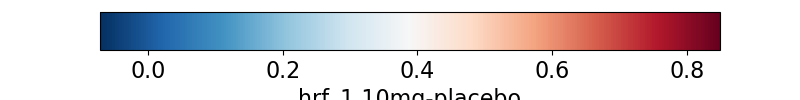

Started server on port 18793
-----


In [53]:
%matplotlib notebook
#visualize subject-specific ROIs and timeseries stats
#compare t1w and surface fitting rsq and polar angle maps
vis_res.compare_volume_surface = False

vis_res.plot_rois_cortex = False
vis_res.plot_stats_cortex = False
vis_res.plot_rsq_cortex = False
vis_res.plot_ecc_cortex = False
vis_res.plot_polar_cortex = False
vis_res.plot_size_cortex = False
vis_res.plot_amp_cortex = False
vis_res.plot_css_exp_cortex = False
vis_res.plot_surround_size_cortex = False
vis_res.plot_suppression_index_cortex = False
vis_res.plot_norm_baselines_cortex = False
vis_res.plot_size_ratio_cortex = False
vis_res.plot_receptors_cortex = False
vis_res.plot_hrf_cortex = False
#set these to None if not wanted. 
vis_res.plot_correlations_per_roi = None#{'x_params_topl':['Norm Param. B'], 'y_params_topl':['Receptor Maps'],
                                    # 'x_params_lowl':['Norm_abcd'], 'y_params_lowl':['GABA'],
                                    # 'atlas':'glasser'} #glasser, HCPQ1Q6, custom
#note there is no quantile exclusion here, so the means may suffer from extreme values. just a visualization tool; use the quant_plots if want to be sure
vis_res.plot_means_per_roi = None#{'y_params_topl':['Norm Param. B','Norm Param. D','Size ratio (sigma_2/sigma_1)'], 
                                 #   'y_params_lowl':['Norm_abcd'], 
                                 #    'atlas':'glasser'} #glasser, HCPQ1Q6, custom
#output FS-format polar angle and eccentricity maps for freeview ROI plotting
vis_res.output_freesurfer_maps = False

vis_res.plot_diffs = True
param_diffs = ['hrf']#, 'TSNR', 'Mean', 'Variance']

rsq_thresh = 0.0
rsq_max_opacity = 0.3#rsq_thresh+1e-6

#left, right = cortex.db.fsaverage.surfaces.inflated.get()
#points = np.concatenate((left[0],right[0]))
#left_flat, right_flat = cortex.db.fsaverage.surfaces.flat.get()
#points_flat = np.concatenate((left_flat[0],right_flat[0]))

#nodorsal
#rois = [roi for roi in vis_res.idx_rois['fsaverage'] if 'glasser' in roi and points_flat[vis_res.idx_rois['fsaverage'][roi],:].mean(0)[1]<50 and points[vis_res.idx_rois['fsaverage'][roi],:].mean(0)[1]<-40]
#nofrontal
#rois = [roi for roi in vis_res.idx_rois['fsaverage'] if 'glasser' in roi and points[vis_res.idx_rois['fsaverage'][roi],:].mean(0)[1]<-40]
#rois = [roi for roi in vis_res.idx_rois['fsaverage'] if 'glasser' in roi]
rois = 'Brain'#['custom.hV4']#'all'#['custom.hV4']#'['custom.hV4']#'all'#['custom.hV4']#'all'#['custom.V1', 'custom.V2', 'custom.V3']
space_names = 'fsaverage'# 'fsnative'#'fsaverage'#'HCP'#
analysis_names = ['fit-task-2R_fit-runs-all']#'Mean analysis''fit-task-BAR_fit-runs-CVmedian'#'fit-task-2R_fit-runs-all'#'fit-task-4R_fit-runs-all'# #'Mean analysis'#
subject_ids = ['fsaverage']# [s for s in vis_res.groups_dict['10mg'] if '007' in s]#,'sub-006_ses-2','sub-006_ses-3']#,'sub-007_ses-3','sub-007_ses-2']#,'sub-001_ses-2','sub-001_ses-3']# 'all'#['sub-001_ses-1']#,'sub-001_ses-2','sub-002_ses-1']#['fsaverage_cvrsq']#['fsaverage_hcp1sthalf','fsaverage_hcp2ndhalf']#['sub-006']##'all'#['sub-001']
excluded_rois = []#['excl_v123']

vis_res.set_alpha(space_names = [space_names], only_models=['Norm_abcd'], ecc_min=0.0, ecc_max=5.3, threshold_li=False, excluded_rois=excluded_rois)
pycortex_image_path = '/Volumes/Crucial_X8/SM-pRF/Figures/nordic_pybest'

vis_res.pycortex_plots(rois, rsq_thresh, space_names, analysis_names, subject_ids, rsq_max_opacity = rsq_max_opacity, pycortex_cmap = 'RdBu_r', #'nipy_spectral',## 'nipy_spectral',# 'RdBu_r',
                     # 'nipy_spectral',#'jet_r',                                        
                     #  roi_borders_name = 'custom',
                       #specify this path to save colormap pDFs
                      # pycortex_image_path = pycortex_image_path, save_colorbars=True,
                       param_diffs = param_diffs,
                       timecourse_folder = '/Volumes/Crucial_X8/SM-pRF/derivatives/timecourses',#'/Volumes/Crucial_X8/PRFMapping/PRFMapping-Deriv-hires/prfpy/FS7_results/timecourses',#'/Volumes/Crucial_X8/PRFMapping/PRFMapping-HCP/timecourses',##'
                       screenshot_paths = ['/Volumes/Crucial_X8/SM-pRF/derivatives/2R_Screenshots'])
                                        # ['/Volumes/Crucial_X8/PRFMapping/PRFMapping-HCP/HCP_data/7T_RETBAR_small.hdf5'])
                                         #  '/Volumes/Crucial_X8/PRFMapping/PRFMapping-HCP/HCP_data/7T_RETBAR2_small.hdf5',
                                         #  '/Volumes/Crucial_X8/PRFMapping/PRFMapping-HCP/HCP_data/7T_RETCW_small.hdf5',
                                         #  '/Volumes/Crucial_X8/PRFMapping/PRFMapping-HCP/HCP_data/7T_RETCCW_small.hdf5',
                                          # '/Volumes/Crucial_X8/PRFMapping/PRFMapping-HCP/HCP_data/7T_RETEXP_small.hdf5',
                                           #'/Volumes/Crucial_X8/PRFMapping/PRFMapping-HCP/HCP_data/7T_RETCON_small.hdf5'])
                                            #'/Volumes/Crucial_X8/PRFMapping/PRFMapping-HCP/HCP_data/7T_RETBAR_small.hdf5'
                                            #'/Volumes/Crucial_X8/PRFMapping/PRFMapping-Deriv-hires/prfpy/FS7_results/timecourses/task-2R_screenshots'

### Pycortex figs

In [126]:
vis_res.js_handle_dict[space_names][analysis_names][subject_ids[0]].keys()

dict_keys(['rsq'])

In [ ]:
vis_res.js_handle_dict[space_names][analysis_names][subject_ids[0]]['rsq'].dataviews.attrs.keys()

In [159]:
save_views=True
time.sleep(1)
if save_views:
    #capture pycortex views
    space = space_names
    analysis = analysis_names
    subj = subject_ids[0]
    if space == 'fsaverage':
        pyc_subj = 'fsaverage'
    else:
        pyc_subj = subj.split('_')[0]
        
    js_handle = 'rsq'
    #param_to_save = 'Norm_abcd Param. B'
    for param_to_save in [f'{subj} Norm_abcd - Gauss']:# vis_res.js_handle_dict[space][analysis][subj][js_handle].dataviews.attrs.keys():
        views_dict = {'occipital_inflated_r':{f'surface.{pyc_subj}.unfold':1, f'surface.{pyc_subj}.specularity':0,
                                            'camera.target':[-10,20,25],
                                             'camera.azimuth':205, 'camera.altitude':109, 'camera.radius':261,
                                             'camera.pivot':0},
                     'occipital_inflated_l':{f'surface.{pyc_subj}.unfold':1, f'surface.{pyc_subj}.specularity':0,
                                            'camera.target':[-10,20,25],
                                             'camera.azimuth':166, 'camera.altitude':109, 'camera.radius':261,
                                             'camera.pivot':0}}

        vis_res.save_pycortex_views(space, analysis, subj, js_handle, param_to_save,
                                    views_dict, image_path = vis_res.pycortex_image_path)
        

### Groups

In [7]:
groups_dict = {'placebo':['sub-001_ses-1','sub-002_ses-2','sub-003_ses-3','sub-004_ses-2','sub-005_ses-1','sub-006_ses-3','sub-007_ses-3','sub-008_ses-1',
                         'sub-009_ses-2','sub-010_ses-1','sub-011_ses-3','sub-012_ses-2','sub-013_ses-3','sub-014_ses-2','sub-015_ses-2','sub-018_ses-1','sub-019_ses-2','sub-020_ses-1'],
               
              '5mg':['sub-001_ses-3','sub-002_ses-1','sub-003_ses-1','sub-004_ses-3','sub-005_ses-2','sub-006_ses-1','sub-007_ses-1','sub-008_ses-3',
                    'sub-009_ses-1','sub-010_ses-2','sub-011_ses-2','sub-012_ses-3','sub-013_ses-2','sub-014_ses-1','sub-015_ses-3','sub-018_ses-3','sub-019_ses-1','sub-020_ses-2'],
               
              '10mg':['sub-001_ses-2','sub-002_ses-3','sub-003_ses-2','sub-004_ses-1','sub-005_ses-3','sub-006_ses-2','sub-007_ses-2','sub-008_ses-2',
                     'sub-009_ses-3','sub-010_ses-3','sub-011_ses-1','sub-012_ses-1','sub-013_ses-1','sub-014_ses-3','sub-015_ses-1','sub-018_ses-2','sub-019_ses-3','sub-020_ses-3']}#,

vis_res.set_alpha(space_names = ['fsnative'], only_models=['Norm_abcd'], ecc_min=0.0, ecc_max=5.3, threshold_li=False, excluded_rois=[])

vis_res.define_groups(groups_dict)
vis_res.compute_diff(space_names = 'fsnative', analysis_names = 'all', subject_ids='all',parameter_names='all',base_group='placebo')


fsnative fit-task-2R_fit-runs-all sub-001_ses-1
fsnative fit-task-2R_fit-runs-all sub-001_ses-2
fsnative fit-task-2R_fit-runs-all sub-001_ses-3
fsnative fit-task-2R_fit-runs-all sub-001_ses-all
fsnative fit-task-2R_fit-runs-all sub-002_ses-1
fsnative fit-task-2R_fit-runs-all sub-002_ses-2
fsnative fit-task-2R_fit-runs-all sub-002_ses-3
fsnative fit-task-2R_fit-runs-all sub-002_ses-all
fsnative fit-task-2R_fit-runs-all sub-003_ses-1
fsnative fit-task-2R_fit-runs-all sub-003_ses-2
fsnative fit-task-2R_fit-runs-all sub-003_ses-3
fsnative fit-task-2R_fit-runs-all sub-003_ses-all
fsnative fit-task-2R_fit-runs-all sub-004_ses-1
fsnative fit-task-2R_fit-runs-all sub-004_ses-2
fsnative fit-task-2R_fit-runs-all sub-004_ses-3
fsnative fit-task-2R_fit-runs-all sub-004_ses-all
fsnative fit-task-2R_fit-runs-all sub-005_ses-1
fsnative fit-task-2R_fit-runs-all sub-005_ses-2
fsnative fit-task-2R_fit-runs-all sub-005_ses-3
fsnative fit-task-2R_fit-runs-all sub-005_ses-all
fsnative fit-task-2R_fit-runs-

In [25]:
vis_res.main_dict['fsnative']['fit-task-2R_fit-runs-all']['sub-006_ses-2']['Processed Results'].keys()

dict_keys(['RSq', 'Eccentricity', 'Polar Angle', 'Amplitude', 'Size (sigma_1)', 'x_pos', 'y_pos', 'hrf_1', 'hrf_2', 'Surround Amplitude', 'Size (sigma_2)', 'Size ratio (sigma_2/sigma_1)', 'Norm Param. B', 'Norm Param. D', 'Ratio (B/D)', 'Noise Ceiling', 'Alpha', 'RSq 10mg-placebo', 'Eccentricity 10mg-placebo', 'Polar Angle 10mg-placebo', 'Amplitude 10mg-placebo', 'Size (sigma_1) 10mg-placebo', 'x_pos 10mg-placebo', 'y_pos 10mg-placebo', 'hrf_1 10mg-placebo', 'hrf_2 10mg-placebo', 'Surround Amplitude 10mg-placebo', 'Size (sigma_2) 10mg-placebo', 'Size ratio (sigma_2/sigma_1) 10mg-placebo', 'Norm Param. B 10mg-placebo', 'Norm Param. D 10mg-placebo', 'Ratio (B/D) 10mg-placebo', 'Noise Ceiling 10mg-placebo'])

### saving data for decoding

In [9]:
msk = vis_res.main_dict['fsnative']['fit-task-2R_fit-runs-all']['sub-001_ses-1']['mask']

In [17]:
np.save('/Volumes/Crucial_X8/sub-001_ses-1_custom-V1.npy',vis_res.idx_rois['sub-001_ses-1']['custom.V1'])

In [10]:
with open('/Volumes/Crucial_X8/sub-001_ses-1_results-gauss.pickle', 'wb') as handle:
    res = vis_res.main_dict['fsnative']['fit-task-2R_fit-runs-all']['sub-001_ses-1']['Results']['Gauss']
    fullres = np.zeros((msk.shape[0],res.shape[1]))
    fullres[msk] = np.copy(res)
    dill.dump(fullres, handle)

In [17]:
with open('/Volumes/Crucial_X8/Gauss_2R_prf_model.pickle', 'wb') as handle:
     dill.dump(vis_res.prf_models['Gauss'], handle)

### Timecourse plots

<IPython.core.display.Javascript object>


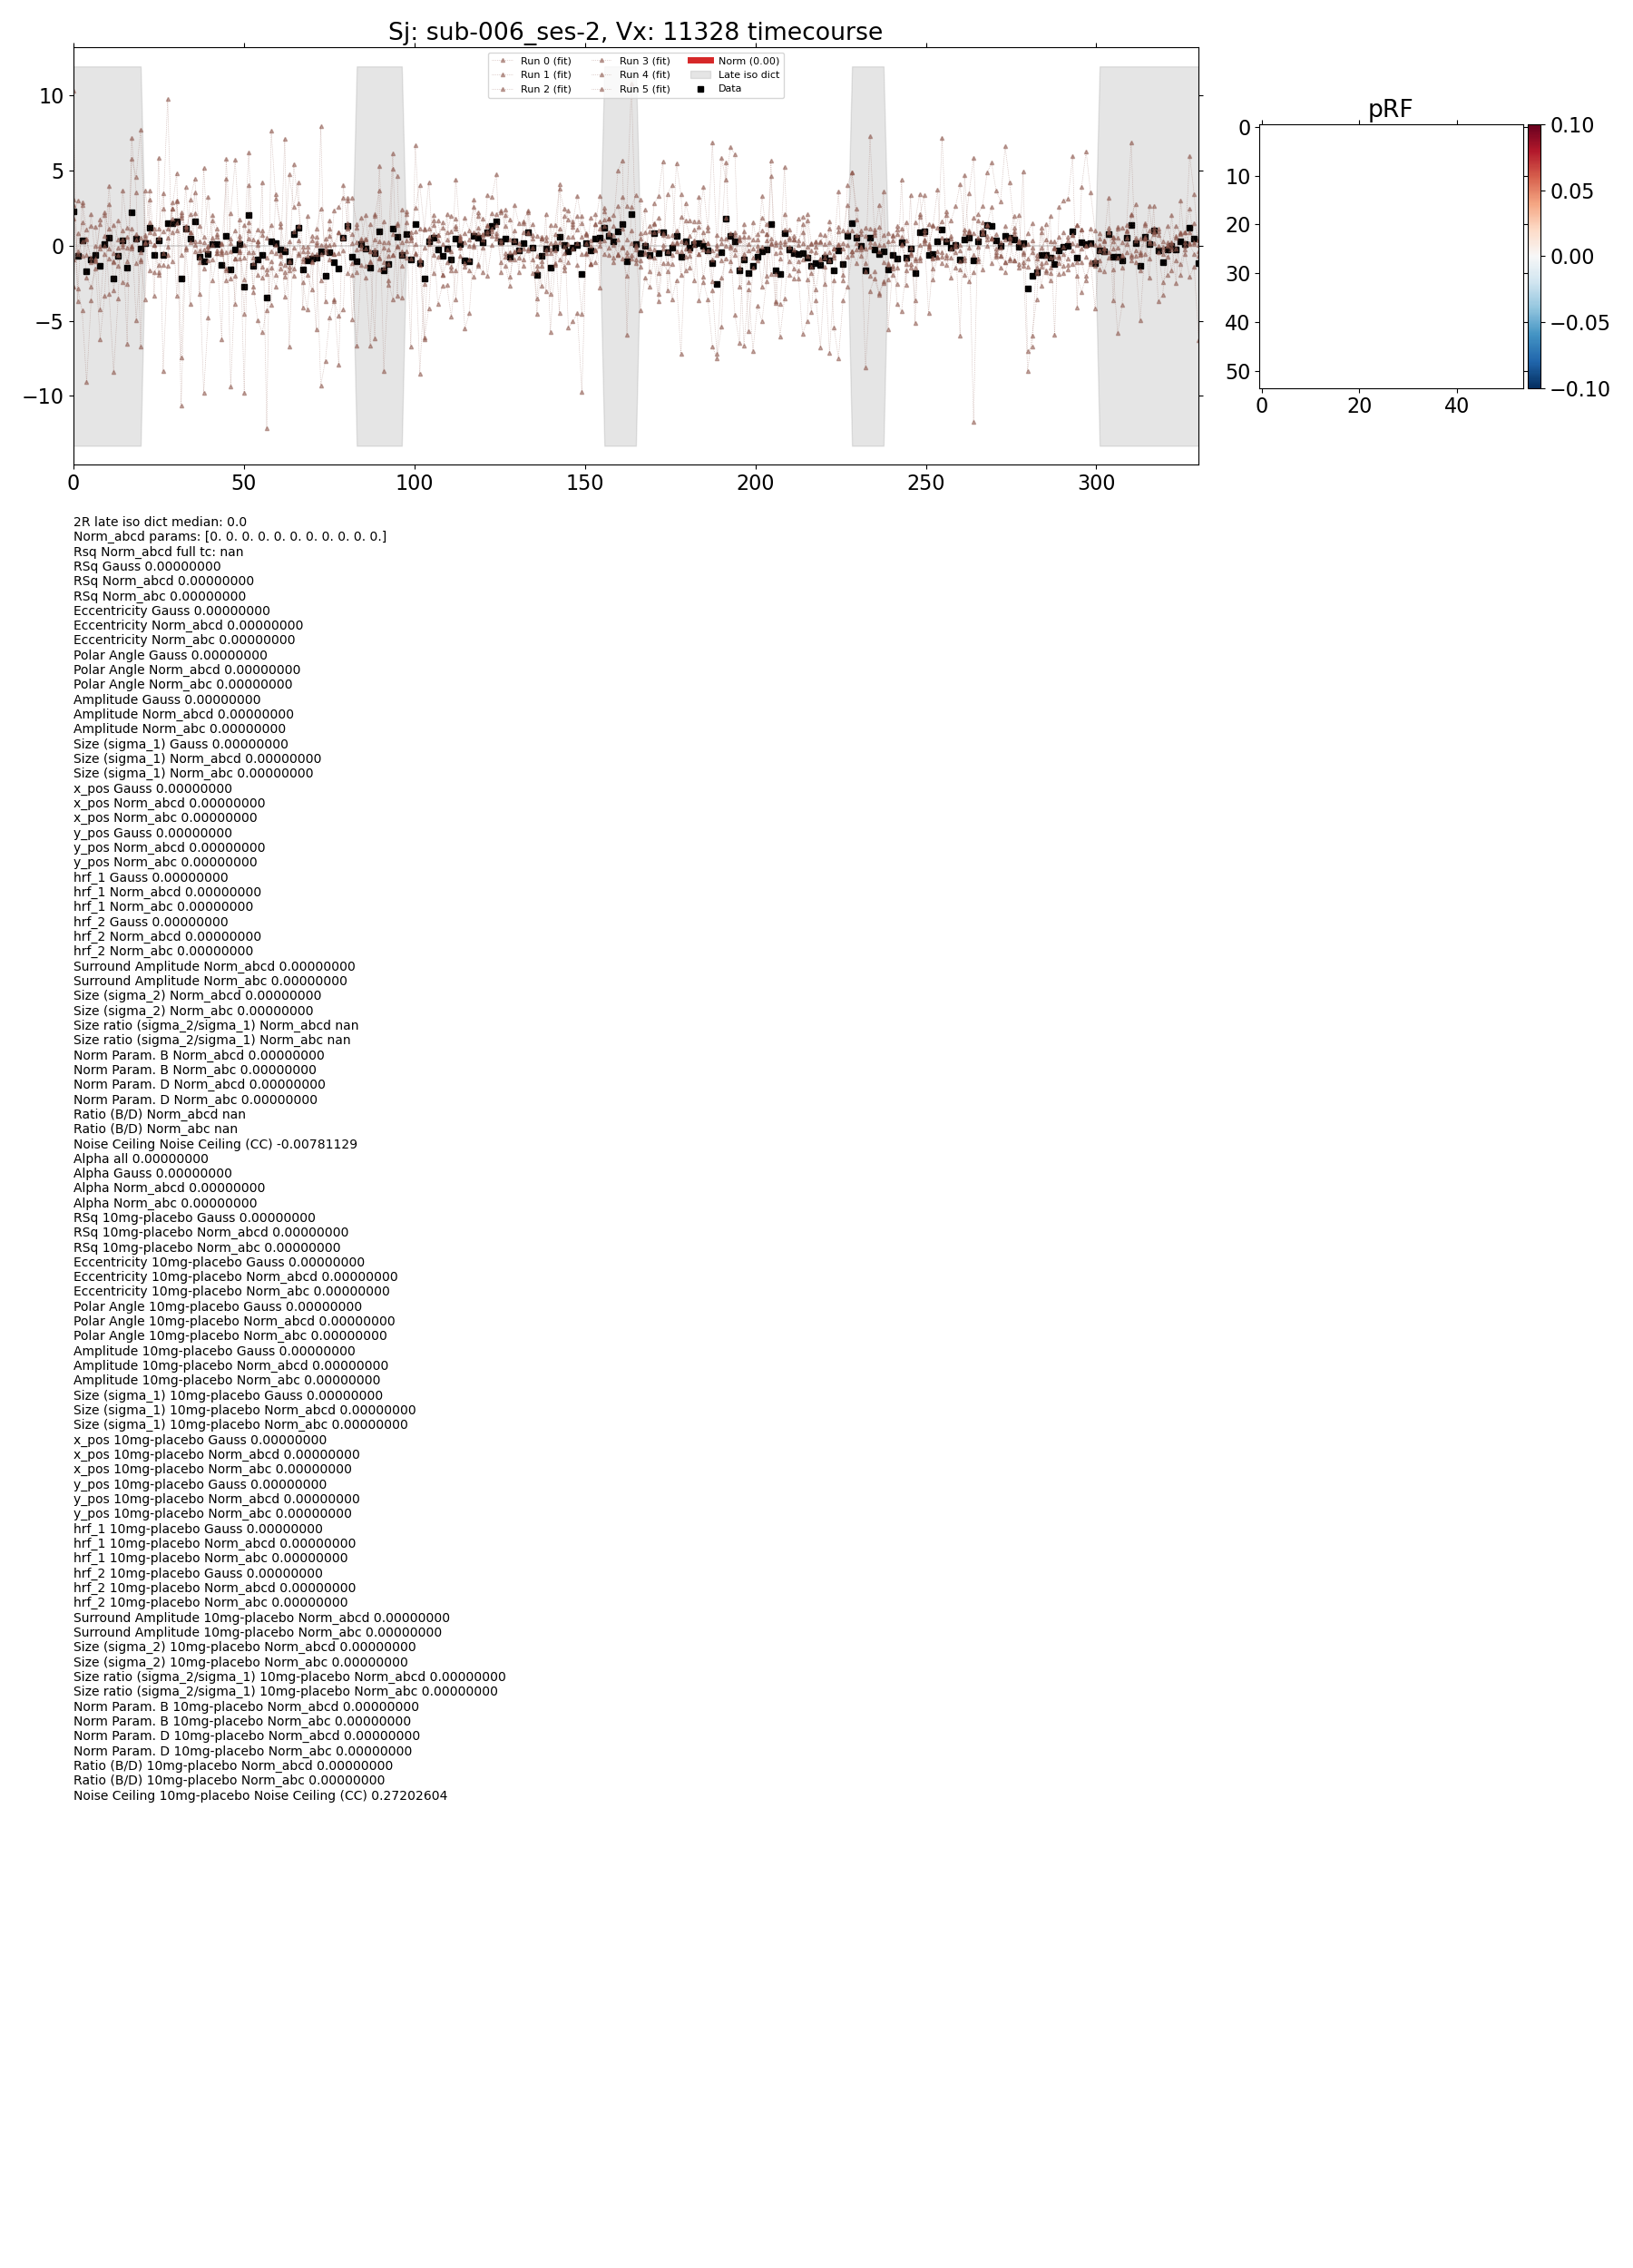

In [16]:
while not hasattr(vis_res, 'f'):
    time.sleep(2)
else:
    pass #45227 43237 #216466
vis_res.f

In [38]:
vis_res.f.savefig(f'/Users/marcoaqil/compr2.pdf', dpi=600, bbox_inches='tight', transparent=True)

# 1D quantitative plots

In [48]:
%%capture capt
pl.close('all')
display(HTML("<style>div.output_scroll { height: 150em; }</style>"))
#generalized quantitative parameter plots
#'Eccentricity'#'Suppression Index (full)'#'Suppression Index#'Size (fwhmax)'#'Surround Size (fwatmin)'
#'Norm Param. B'#''Ratio (B/D)'#'Norm Param. D'#'RSq'#'CCrsq_task-1R'#'CSS Exponent'#'Amplitude'
#'Surround Amplitude'#'Size (sigma_1)'##'Size (sigma_2)'
#'Size ratio (sigma_2/sigma_1)'#C/A#'B/A'#'D/C'#'D/A'#'B/C'#'Surround volume (full)'#'Centre volume (full)'
#'(A+B)/(C+D)'#'(A*B)/(C*D)'#'(A*D)/(C*B)'#'(A+D)/(C+B)'#'Point-stim derivative'#'(C(A+B))/(A(C+D))'
#'Min/Max Response Ratio'#'Max/Min Response Ratio'#'A(C+D)/C(A+B)'##Min/Max Response Ratio (with BD)'#'A/C'
#D/B#D*sigma_2/sigma_1#(D*sigma_2)/(B*sigma_1)#'(AD-BC)/D**2 (deriv at 0)'#(Cs_2**2+D)/(As_1**2+B)
#(B*sigma_1)/(D*sigma_2)##B/D**2#'B/sqrt(D)'#'B(1/(Cpis_2**2+D)-1/D)'
####DoG
#'Surround volume (full)'#'Surround/Centre Amplitude' #'Surround-Centre Amplitude'#'Surround-Centre Volume'
#'Timecourse Neg/Pos Area Ratio'
#['GABA_A','5-HTT', '5-HT2A', '5-HT1A', '5-HT1B', '5-HT4']
#fsnative vox vol for correction: 4.8270. HCP 4.096. smPRF 5.832

#'custom.V1', 'custom.V2', 'custom.V3','custom.V3AB','custom.hV4','custom.LO','custom.TO','custom.VO','custom.IPS'
#combined all_custom Brain
#rois = ['custom.V1', 'custom.V2', 'custom.V3','custom.V3AB','custom.hV4','custom.LO','custom.TO','custom.IPS','all_custom']
left, right = cortex.db.fsaverage.surfaces.inflated.get()
points = np.concatenate((left[0],right[0]))
left_flat, right_flat = cortex.db.fsaverage.surfaces.flat.get()
points_flat = np.concatenate((left_flat[0],right_flat[0]))

#nodorsal
#rois = [roi for roi in vis_res.idx_rois['fsaverage'] if 'glasser' in roi and points_flat[vis_res.idx_rois['fsaverage'][roi],:].mean(0)[1]<40 and points[vis_res.idx_rois['fsaverage'][roi],:].mean(0)[1]<-50]
#nofrontal
#rois = [roi for roi in vis_res.idx_rois['fsaverage'] if 'glasser' in roi and points[vis_res.idx_rois['fsaverage'][roi],:].mean(0)[1]<-40]

#rois = [roi for roi in vis_res.idx_rois['fsaverage'] if 'glasser' in roi]#['V1','V2', 'V3','V3AB','hV4','LO','TO','VO','IPS'] #[roi for roi in vis_res.idx_rois['fsaverage'] if 'glasser' in roi]
#[-20:]#['V1','V2', 'V3','V3AB','hV4','LO','TO','VO','IPS'] #fsaverage
#rois = [ 'V1', 'V2', 'V3', 'hV4', 'VO1', 'VO2', 'PHC1', 'PHC2', 'LO1', 'LO2', 'TO1', 'TO2', 'V3A', 'V3B', 'IPS0', 'IPS1', 'IPS2', 'IPS3', 'IPS4', 'IPS5', 'SPL1', 'FEF']
# rois = ['glasser_V1','glasser_V2','glasser_V3','glasser_V4','glasser_V3A','glasser_V7','glasser_V3B','glasser_V3CD',
# 'glasser_LO1','glasser_LO2','glasser_PIT','glasser_V8','glasser_VMV3',
# 'glasser_IPS1','glasser_IP0','glasser_PGp','glasser_LO3','glasser_MT','glasser_V4t','glasser_FFC','combined']

rois = ['V1','V2', 'V3','V3AB','hV4','LO','TO','VO','IPS','combined']#['custom.V1','custom.V2', 'custom.V3','custom.V3AB','custom.hV4','custom.LO','custom.TO','custom.VO','custom.IPS','all_custom']

#rois = ['all_custom']
#rois = ['HCPQ1Q6.V1', 'HCPQ1Q6.V2', 'HCPQ1Q6.V3', 'HCPQ1Q6.V3AB',
#        'HCPQ1Q6.LO', 'HCPQ1Q6.V7','HCPQ1Q6.TO',
#        'HCPQ1Q6.IPS1']
#rois.append('combined')

rsq_thresh = 0.3 #0.3 #0.1 (eccmon 0,1/5 (eccmin 0 /15))
save_figures = True
figure_path = f"/Volumes/Crucial_X8/SM-pRF/Figures/10mg_diffs_test_weightstats"

#set to 'all' to plot all analyses
space_names = 'fsnative'
analysis_names = 'fit-task-2R_fit-runs-all'#'Mean analysis'#'fit-task-BAR_fit-runs-all'#'all'#, -CVmedian
subject_ids = [s for s in vis_res.groups_dict['10mg']]

#[ 'sub-001_ses-2','sub-002_ses-3','sub-003_ses-2','sub-004_ses-1','sub-005_ses-3','sub-006_ses-2','sub-007_ses-2']
            #['sub-001_ses-1','sub-002_ses-2','sub-003_ses-3','sub-004_ses-2','sub-005_ses-1','sub-006_ses-3','sub-007_ses-3']#,
            # ['sub-001_ses-3','sub-002_ses-1','sub-003_ses-1','sub-004_ses-3','sub-005_ses-2','sub-006_ses-1','sub-007_ses-1']#,
            #  'sub-001_ses-2','sub-002_ses-3','sub-003_ses-2','sub-004_ses-1','sub-005_ses-3','sub-006_ses-2','sub-007_ses-2']#['fsaverage_cvrsq']#[sj for sj in vis_res.main_dict['fsaverage']['fit-task-BAR_fit-runs-all'].keys() if 'fsaverage' not in sj]#['fsaverage_cvrsq']#['fsaverage']#['sub-001','sub-002','sub-006']#
excluded_rois = []# ['excl_v123']

vis_res.set_alpha(only_models=['Norm_abcd'], ecc_min=0.0, ecc_max=5.3, threshold_li=False, excluded_rois=excluded_rois)

ylim={}
xlim={}

#set model/roi specific x-y limitd

#ylim = {'Mean':(1.5,14), 'Norm_abcd':(1.5,14), 'Gauss':(1.5,14), 'CSS':(1.5,14), 'DoG':(1.5,14)}
#xlim = {'Gauss':(0,4.5), 'DoG':(0,4.5), 'CSS':(0,4.5), 'Norm_abcd':(0,4.5)}
#dog rsq
#ylim = {'Norm_abcd':(-5,310)}
#xlim = {'Norm_abcd':(-0.005,0.155)}
#dog tcsi
#xlim = {'Norm_abcd':(-0.02,1.33)}
#for r in rois:
    #xlim[r] = xlim['Norm_abcd']
    #ylim[r] = ylim['Norm_abcd']
    #size ratio
#xlim = {'Norm_abcd':(-0.02,0.8)}
#ylim = {'Norm_abcd':(2,11)}

#         if r in ['custom.V1', 'custom.V2', 'custom.V3']:
#             ylim[r] = (1.5,14)
#         elif r in ['custom.V3AB', 'custom.hV4', 'custom.LO']:
#             ylim[r] = (1.5,14)
#         else:
#             ylim[r] = (1.5,14)

for x_parameter in ['Eccentricity']:#'PCA Component 0','PCA Component 1','PCA Component 2']:#'GABA_A','5-HTT', '5-HT2A', '5-HT1A', '5-HT1B', '5-HT4']
    for y_parameter in ['Norm Param. B 10mg-placebo','Norm Param. D 10mg-placebo', 'Ratio (B/D) 10mg-placebo', 'Size ratio (sigma_2/sigma_1) 10mg-placebo','Amplitude 10mg-placebo','Surround Amplitude 10mg-placebo','Size (sigma_1) 10mg-placebo','Size (sigma_2) 10mg-placebo','hrf_1 10mg-placebo','RSq 10mg-placebo']: #'B/C', 'B/A', '(B*C)/A', '(B+C)/A', 'C/(A+B)',  'C/A']

    #['Noise Ceiling (CC)']:
    
    #['Norm Param. B 10mg-placebo','Norm Param. D 10mg-placebo', 'Ratio (B/D) 10mg-placebo', 'Size ratio (sigma_2/sigma_1) 10mg-placebo','Amplitude 10mg-placebo','Surround Amplitude 10mg-placebo','Size (sigma_1) 10mg-placebo','Size (sigma_2) 10mg-placebo','hrf_1 10mg-placebo','RSq 10mg-placebo']: #'B/C', 'B/A', '(B*C)/A', '(B+C)/A', 'C/(A+B)',  'C/A']

    #         if y_parameter == 'RSq':
#             ylim = {'Norm_abcd':(0.15,0.625)}
#         if y_parameter == 'Norm Param. B':
#             ylim = {'Norm_abcd':(0,80)}
#         if y_parameter == 'Norm Param. D':
#             ylim = {'Norm_abcd':(0,60)}

       # ylim = {'Norm_abcd':(-5,135)}
#         if x_parameter == 'GABA_A':
#             xlim = {'Norm_abcd':(720,1080)}
#         elif x_parameter == '5-HT1A':
#             xlim = {'Norm_abcd':(7,43)}
#         elif x_parameter == '5-HT1B':
#             xlim = {'Norm_abcd':(13,32)}
#         elif x_parameter == '5-HT2A':
#             xlim = {'Norm_abcd':(39,66)}    

        #bin_by: 'size' (x-param bins have the same number of vertices) or 'space' (x-param bins are approx equally spaced) space is useful for clustered parameters)
        vis_res.quant_plots(x_parameter, y_parameter, rois, rsq_thresh, save_figures, figure_path,
                                        space_names, analysis_names, subject_ids,
                                       # x_parameter_toplevel='Receptor Maps',  
                            
                           # y_parameter_toplevel='Noise Ceiling 10mg-placebo',         
                            rsq_weights=True,    
                            
                                        diff_gauss=False, diff_gauss_x=False, 
                                        diff_norm=False,
                                        log_yaxis=False, log_xaxis = False, nr_bins = 1, bin_by='size',      
                                        scatter=False, violin=False, stats_on_plot=True, zconfint_err_alpha=None,
                                        xlim=xlim, ylim=ylim, zscore_xdata=False, zscore_ydata=False, 
                                         means_only=True, 
                                        rois_on_plot = False, rsq_alpha_plot = True,
                                        fit = False, exp_fit = False, show_legend = False, 
                                        each_subj_on_group=True, bold_voxel_volume=5.832,
                                        quantile_exclusion=0.999)#, x_param_model='DoG')

# for x_parameter in ['PCA Component 0','PCA Component 1','PCA Component 2']:#'GABA_A','5-HTT', '5-HT2A', '5-HT1A', '5-HT1B', '5-HT4']
#     for y_parameter in ['Amplitude','Surround Amplitude', 'Eccentricity','Norm Param. B', 'Norm Param. D', 'Polar Angle', 'Size (sigma_1)', 'Size (sigma_2)','Size ratio (sigma_2/sigma_1)']:#'Norm Param. D']:#@

# for x_parameter in ['Eccentricity']:#'GABA_A','5-HTT', '5-HT2A', '5-HT1A', '5-HT1B', '5-HT4']
#     for y_parameter in ['Norm Param. D']:#'Norm Param. D']:#@
#        # ylim = {'Norm_abcd':(23,72)}#{'Norm_abcd':(5,44)}
# #         if x_parameter == '5-HT1B':
# #             xlim = {'Norm_abcd':(13,32)}
# #         else:
# #             xlim = {'Norm_abcd':(39,66)}    
            
#         #bin_by: 'size' (x-param bins have the same number of vertices) or 'space' (x-param bins are approx equally spaced) space is useful for clustered parameters)
#         vis_res.quant_plots(x_parameter, y_parameter, rois, rsq_thresh, save_figures, figure_path,
#                                         space_names, analysis_names, subject_ids,
#                                         x_parameter_toplevel=None,#'Receptor Maps',  #y_parameter_toplevel='Receptor Maps',                                      
#                                         diff_gauss=False, diff_gauss_x=False, 
#                                         log_yaxis=False, log_xaxis = False, nr_bins = 1, bin_by='size', rsq_weights=True,
#                                         scatter=False, violin=False, stats_on_plot=False, zconfint_err_alpha=None,
#                                         xlim=xlim, ylim=ylim, zscore_xdata=False, zscore_ydata=False, 
#                                          means_only=True, 
#                                         rois_on_plot = True, rsq_alpha_plot = True,
#                                         fit = False, exp_fit = False, show_legend = False, 
#                                         each_subj_on_group=True, bold_voxel_volume=4.096,
#                                         quantile_exclusion=0.999)#, x_param_model='DoG')
        
# for x_parameter in ['PCA Component 0', 'PCA Component 1', 'PCA Component 2']:#'GABA_A','5-HTT', '5-HT2A', '5-HT1A', '5-HT1B', '5-HT4']
#     for y_parameter in ['Amplitude','Surround Amplitude', 'Eccentricity','Norm Param. B', 'Norm Param. D', 'Polar Angle', 'Size (sigma_1)', 'Size (sigma_2)','Size ratio (sigma_2/sigma_1)']:#'Norm Param. D']:#@
# #         ylim = {'Norm_abcd':(25,75)}#{'Norm_abcd':(5,44)}
# #         if x_parameter == '5-HT1B':
# #             xlim = {'Norm_abcd':(13,32)}
# #         else:
# #             xlim = {'Norm_abcd':(39,66)}    
            
#         #bin_by: 'size' (x-param bins have the same number of vertices) or 'space' (x-param bins are approx equally spaced) space is useful for clustered parameters)
#         vis_res.quant_plots(x_parameter, y_parameter, rois, rsq_thresh, save_figures, figure_path,
#                                         space_names, analysis_names, subject_ids,
#                                         x_parameter_toplevel='Receptor Maps',  #y_parameter_toplevel='Receptor Maps',                                      
#                                         diff_gauss=False, diff_gauss_x=False, 
#                                         log_yaxis=False, log_xaxis = False, nr_bins = 1, bin_by='size', rsq_weights=True,
#                                         scatter=False, violin=False, stats_on_plot=False, zconfint_err_alpha=None,
#                                         xlim=xlim, ylim=ylim, zscore_xdata=False, zscore_ydata=False, 
#                                          means_only=False, 
#                                         rois_on_plot = True, rsq_alpha_plot = True,
#                                         fit = False, exp_fit = False, show_legend = False, 
#                                         each_subj_on_group=True, bold_voxel_volume=4.096,
#                                         quantile_exclusion=0.999)#, x_param_model='DoG')

os.system(f"open {sound_file}")


In [39]:
np.isfinite(np.nan)#(10)[np.arange(5)]

False

In [13]:
vis_res.main_dict['fsaverage']['fit-task-2R_fit-runs-all']['fsaverage']['Processed Results']['Receptor Maps'].keys()

dict_keys([])

In [16]:
%%capture capt
pl.close('all')
display(HTML("<style>div.output_scroll { height: 150em; }</style>"))
#generalized quantitative parameter plots
#'Eccentricity'#'Suppression Index (full)'#'Suppression Index#'Size (fwhmax)'#'Surround Size (fwatmin)'
#'Norm Param. B'#''Ratio (B/D)'#'Norm Param. D'#'RSq'#'CCrsq_task-1R'#'CSS Exponent'#'Amplitude'
#'Surround Amplitude'#'Size (sigma_1)'##'Size (sigma_2)'
#'Size ratio (sigma_2/sigma_1)'#C/A#'B/A'#'D/C'#'D/A'#'B/C'#'Surround volume (full)'#'Centre volume (full)'
#'(A+B)/(C+D)'#'(A*B)/(C*D)'#'(A*D)/(C*B)'#'(A+D)/(C+B)'#'Point-stim derivative'#'(C(A+B))/(A(C+D))'
#'Min/Max Response Ratio'#'Max/Min Response Ratio'#'A(C+D)/C(A+B)'##Min/Max Response Ratio (with BD)'#'A/C'
#D/B#D*sigma_2/sigma_1#(D*sigma_2)/(B*sigma_1)#'(AD-BC)/D**2 (deriv at 0)'#(Cs_2**2+D)/(As_1**2+B)
#(B*sigma_1)/(D*sigma_2)##B/D**2#'B/sqrt(D)'#'B(1/(Cpis_2**2+D)-1/D)'
####DoG
#'Surround volume (full)'#'Surround/Centre Amplitude' #'Surround-Centre Amplitude'#'Surround-Centre Volume'
#'Timecourse Neg/Pos Area Ratio'
#['GABA_A','5-HTT', '5-HT2A', '5-HT1A', '5-HT1B', '5-HT4']
#fsnative vox vol for correction: 4.8270. HCP 4.096

#'custom.V1', 'custom.V2', 'custom.V3','custom.V3AB','custom.hV4','custom.LO','custom.TO','custom.VO','custom.IPS'
#combined all_custom Brain
#rois = ['custom.V1', 'custom.V2', 'custom.V3','custom.V3AB','custom.hV4','custom.LO','custom.TO','custom.IPS','all_custom']
left, right = cortex.db.fsaverage.surfaces.inflated.get()
points = np.concatenate((left[0],right[0]))
left_flat, right_flat = cortex.db.fsaverage.surfaces.flat.get()
points_flat = np.concatenate((left_flat[0],right_flat[0]))

#nodorsal
#rois = [roi for roi in vis_res.idx_rois['fsaverage'] if 'glasser' in roi and points_flat[vis_res.idx_rois['fsaverage'][roi],:].mean(0)[1]<40 and points[vis_res.idx_rois['fsaverage'][roi],:].mean(0)[1]<-50]
#nofrontal
#rois = [roi for roi in vis_res.idx_rois['fsaverage'] if 'glasser' in roi and points[vis_res.idx_rois['fsaverage'][roi],:].mean(0)[1]<-40]

rois = [roi for roi in vis_res.idx_rois['fsaverage'] if 'glasser' in roi]
#[-20:]#['V1','V2', 'V3','V3AB','hV4','LO','TO','VO','IPS'] #fsaverage
#rois = [ 'V1', 'V2', 'V3', 'hV4', 'VO1', 'VO2', 'PHC1', 'PHC2', 'LO1', 'LO2', 'TO1', 'TO2', 'V3A', 'V3B', 'IPS0', 'IPS1', 'IPS2', 'IPS3', 'IPS4', 'IPS5', 'SPL1', 'FEF']
# rois = ['glasser_V1','glasser_V2','glasser_V3','glasser_V4','glasser_V3A','glasser_V7','glasser_V3B','glasser_V3CD',
# 'glasser_LO1','glasser_LO2','glasser_PIT','glasser_V8','glasser_VMV3',
# 'glasser_IPS1','glasser_IP0','glasser_PGp','glasser_LO3','glasser_MT','glasser_V4t','glasser_FFC','combined']
#rois = ['V1','V2', 'V3','V3AB','hV4','LO','TO','VO','IPS','combined']
#rois = ['all_custom']
#rois = ['HCPQ1Q6.V1', 'HCPQ1Q6.V2', 'HCPQ1Q6.V3', 'HCPQ1Q6.V3AB',
#        'HCPQ1Q6.LO', 'HCPQ1Q6.V7','HCPQ1Q6.TO',
#        'HCPQ1Q6.IPS1']
#rois.append('combined')

rsq_thresh = 0.1 #0.3
save_figures = True
figure_path = f"/Volumes/Crucial_X8/PRFMapping/Figures/spinoza_res_010_thresh_ecc45_xpermstats_noresamp_1e6perm"

#set to 'all' to plot all analyses
space_names = 'fsaverage'
analysis_names = 'fit-task-2R_fit-runs-all'#'fit-task-BAR_fit-runs-all'#'Mean analysis'#'fit-task-BAR_fit-runs-all'#'all'#, -CVmedian
subject_ids = ['fsaverage']#['fsaverage']#['sub-001','sub-002','sub-006']#
excluded_rois = ['excl_v123']

vis_res.set_alpha(only_models=['Norm_abcd'], ecc_min=0.0, ecc_max=4.5, threshold_li=False, excluded_rois=[])

ylim={}
xlim={}

#set model/roi specific x-y limitd

#ylim = {'Mean':(1.5,14), 'Norm_abcd':(1.5,14), 'Gauss':(1.5,14), 'CSS':(1.5,14), 'DoG':(1.5,14)}
#xlim = {'Gauss':(0,4.5), 'DoG':(0,4.5), 'CSS':(0,4.5), 'Norm_abcd':(0,4.5)}
#dog rsq
#ylim = {'Norm_abcd':(-5,310)}
#xlim = {'Norm_abcd':(-0.005,0.155)}
#dog tcsi
#xlim = {'Norm_abcd':(-0.02,1.33)}
#for r in rois:
    #xlim[r] = xlim['Norm_abcd']
    #ylim[r] = ylim['Norm_abcd']
    #size ratio
#xlim = {'Norm_abcd':(-0.02,0.8)}
#ylim = {'Norm_abcd':(2,11)}

#         if r in ['custom.V1', 'custom.V2', 'custom.V3']:
#             ylim[r] = (1.5,14)
#         elif r in ['custom.V3AB', 'custom.hV4', 'custom.LO']:
#             ylim[r] = (1.5,14)
#         else:
#             ylim[r] = (1.5,14)

for x_parameter in ['GABA_A', '5-HT1A']:#'PCA Component 0','PCA Component 1','PCA Component 2']:#'GABA_A','5-HTT', '5-HT2A', '5-HT1A', '5-HT1B', '5-HT4']
    for y_parameter in ['Norm Param. B']:
        
        #ylim = {'Norm_abcd':(-5,135)}
#         if x_parameter == 'GABA_A':
#             xlim = {'Norm_abcd':(720,1080)}
#         else:
#             xlim = {'Norm_abcd':(7,43)}
               
        #bin_by: 'size' (x-param bins have the same number of vertices) or 'space' (x-param bins are approx equally spaced) space is useful for clustered parameters)
        vis_res.quant_plots(x_parameter, y_parameter, rois, rsq_thresh, save_figures, figure_path,
                                        space_names, analysis_names, subject_ids,
                                        x_parameter_toplevel='Receptor Maps',  #y_parameter_toplevel='Receptor Maps',                                      
                                        diff_gauss=False, diff_gauss_x=False, 
                                        log_yaxis=False, log_xaxis = False, nr_bins = 1, bin_by='size', rsq_weights=True,
                                        scatter=False, violin=False, stats_on_plot=False, zconfint_err_alpha=None,
                                        xlim=xlim, ylim=ylim, zscore_xdata=False, zscore_ydata=False, 
                                         means_only=False, 
                                        rois_on_plot = True, rsq_alpha_plot = True,
                                        fit = False, exp_fit = False, show_legend = False, 
                                        each_subj_on_group=True, bold_voxel_volume=4.8270,
                                        quantile_exclusion=0.999)#, x_param_model='DoG')

# for x_parameter in ['PCA Component 0','PCA Component 1','PCA Component 2']:#'GABA_A','5-HTT', '5-HT2A', '5-HT1A', '5-HT1B', '5-HT4']
#     for y_parameter in ['Amplitude','Surround Amplitude', 'Eccentricity','Norm Param. B', 'Norm Param. D', 'Polar Angle', 'Size (sigma_1)', 'Size (sigma_2)','Size ratio (sigma_2/sigma_1)']:#'Norm Param. D']:#@

for x_parameter in ['5-HT1B', '5-HT2A']:#'GABA_A','5-HTT', '5-HT2A', '5-HT1A', '5-HT1B', '5-HT4']
    for y_parameter in ['Norm Param. D']:#'Norm Param. D']:#@
        #ylim = {'Norm_abcd':(23,72)}#{'Norm_abcd':(5,44)}
#         if x_parameter == '5-HT1B':
#             xlim = {'Norm_abcd':(13,32)}
#         else:
#             xlim = {'Norm_abcd':(39,66)}    
            
        #bin_by: 'size' (x-param bins have the same number of vertices) or 'space' (x-param bins are approx equally spaced) space is useful for clustered parameters)
        vis_res.quant_plots(x_parameter, y_parameter, rois, rsq_thresh, save_figures, figure_path,
                                        space_names, analysis_names, subject_ids,
                                        x_parameter_toplevel='Receptor Maps',  #y_parameter_toplevel='Receptor Maps',                                      
                                        diff_gauss=False, diff_gauss_x=False, 
                                        log_yaxis=False, log_xaxis = False, nr_bins = 1, bin_by='size', rsq_weights=True,
                                        scatter=False, violin=False, stats_on_plot=False, zconfint_err_alpha=None,
                                        xlim=xlim, ylim=ylim, zscore_xdata=False, zscore_ydata=False, 
                                         means_only=False, 
                                        rois_on_plot = True, rsq_alpha_plot = True,
                                        fit = False, exp_fit = False, show_legend = False, 
                                        each_subj_on_group=True, bold_voxel_volume=4.8270,
                                        quantile_exclusion=0.999)#, x_param_model='DoG')
        
# for x_parameter in ['PCA Component 0', 'PCA Component 1', 'PCA Component 2']:#'GABA_A','5-HTT', '5-HT2A', '5-HT1A', '5-HT1B', '5-HT4']
#     for y_parameter in ['Amplitude','Surround Amplitude', 'Eccentricity','Norm Param. B', 'Norm Param. D', 'Polar Angle', 'Size (sigma_1)', 'Size (sigma_2)','Size ratio (sigma_2/sigma_1)']:#'Norm Param. D']:#@
# #         ylim = {'Norm_abcd':(25,75)}#{'Norm_abcd':(5,44)}
# #         if x_parameter == '5-HT1B':
# #             xlim = {'Norm_abcd':(13,32)}
# #         else:
# #             xlim = {'Norm_abcd':(39,66)}    
            
#         #bin_by: 'size' (x-param bins have the same number of vertices) or 'space' (x-param bins are approx equally spaced) space is useful for clustered parameters)
#         vis_res.quant_plots(x_parameter, y_parameter, rois, rsq_thresh, save_figures, figure_path,
#                                         space_names, analysis_names, subject_ids,
#                                         x_parameter_toplevel='Receptor Maps',  #y_parameter_toplevel='Receptor Maps',                                      
#                                         diff_gauss=False, diff_gauss_x=False, 
#                                         log_yaxis=False, log_xaxis = False, nr_bins = 1, bin_by='size', rsq_weights=True,
#                                         scatter=False, violin=False, stats_on_plot=False, zconfint_err_alpha=None,
#                                         xlim=xlim, ylim=ylim, zscore_xdata=False, zscore_ydata=False, 
#                                          means_only=False, 
#                                         rois_on_plot = True, rsq_alpha_plot = True,
#                                         fit = False, exp_fit = False, show_legend = False, 
#                                         each_subj_on_group=True, bold_voxel_volume=4.096,
#                                         quantile_exclusion=0.999)#, x_param_model='DoG')

os.system(f"open {sound_file}")


# Multidimensional analyses

## OLS

fsaverage fit-task-BAR_fit-runs-all fsaverage_cvrsq
thresholding at 27.290789658414187 subjects
fsaverage fit-task-BAR_fit-runs-all fsaverage_cvrsq_2ndhalf
thresholding at 13.847806913306545 subjects
fsaverage fit-task-BAR_fit-runs-all fsaverage_cvrsq_1sthalf
thresholding at 13.11686366363076 subjects
fsaverage fit-task-BAR_fit-runs-all fsaverage_cvrsq
Make sure bold_voxel_volume is specified in mm^3
Upsampling correction factor: [2.1213]
fit-task-BAR_fit-runs-all fsaverage_cvrsq glasser_1
X-dims: ['5-HT1B', '5-HT2A']
Y-dims: ['C/(A+B) Norm_abcd']
alldims ['5-HT1B', '5-HT2A', 'C/(A+B) Norm_abcd']
ord dims ['5-HT1A', '5-HT1B', '5-HT2A', '5-HTT', 'C/(A+B) Norm_abcd', 'C/D Norm_abcd', 'GABA_A', 'Norm Param. B Norm_abcd', 'Norm Param. D Norm_abcd', 'RSq Norm_abcd', 'Size ratio (sigma_2/sigma_1) Norm_abcd']
Sample size: 0
fit-task-BAR_fit-runs-all fsaverage_cvrsq glasser_10d
X-dims: ['5-HT1B', '5-HT2A']
Y-dims: ['C/(A+B) Norm_abcd']
alldims ['5-HT1B', '5-HT2A', 'C/(A+B) Norm_abcd']
ord dims

Estimated OLS betas (full data) C/(A+B) Norm_abcd [-0.0158  0.0024]
wRSq (full data) 0.014677510315656783
wCC prediction (full data) 0.12115077513436145
wR2 (fit on full data, eval on roi means): 0.052
wCC prediction (fit on full data, eval on roi means) 0.4317

wR2 (fit on roi means, eval on roi means): 0.2192
wCC prediction (fit on roi means, eval on roi means) 0.4682
Estimated OLS betas (fit on roi means) C/(A+B) Norm_abcd [-0.022  -0.0013]



/Users/marcoaqil/anaconda3/envs/prfpy_2021/lib/python3.9/site-packages/statsmodels/stats/weightstats.py:228: RuntimeWarning: invalid value encountered in sqrt
  return std / np.sqrt(self.sum_weights - 1)


5-HT1B pval=0.0042810
5-HT2A pval=0.7256690
wR2 (fit on full data, eval on full data): 0.0147
wCC prediction (fit on full data, eval on full data) 0.1212
Estimated OLS betas (fit on full data) C/(A+B) Norm_abcd [-0.0158  0.0024]


<IPython.core.display.Javascript object>


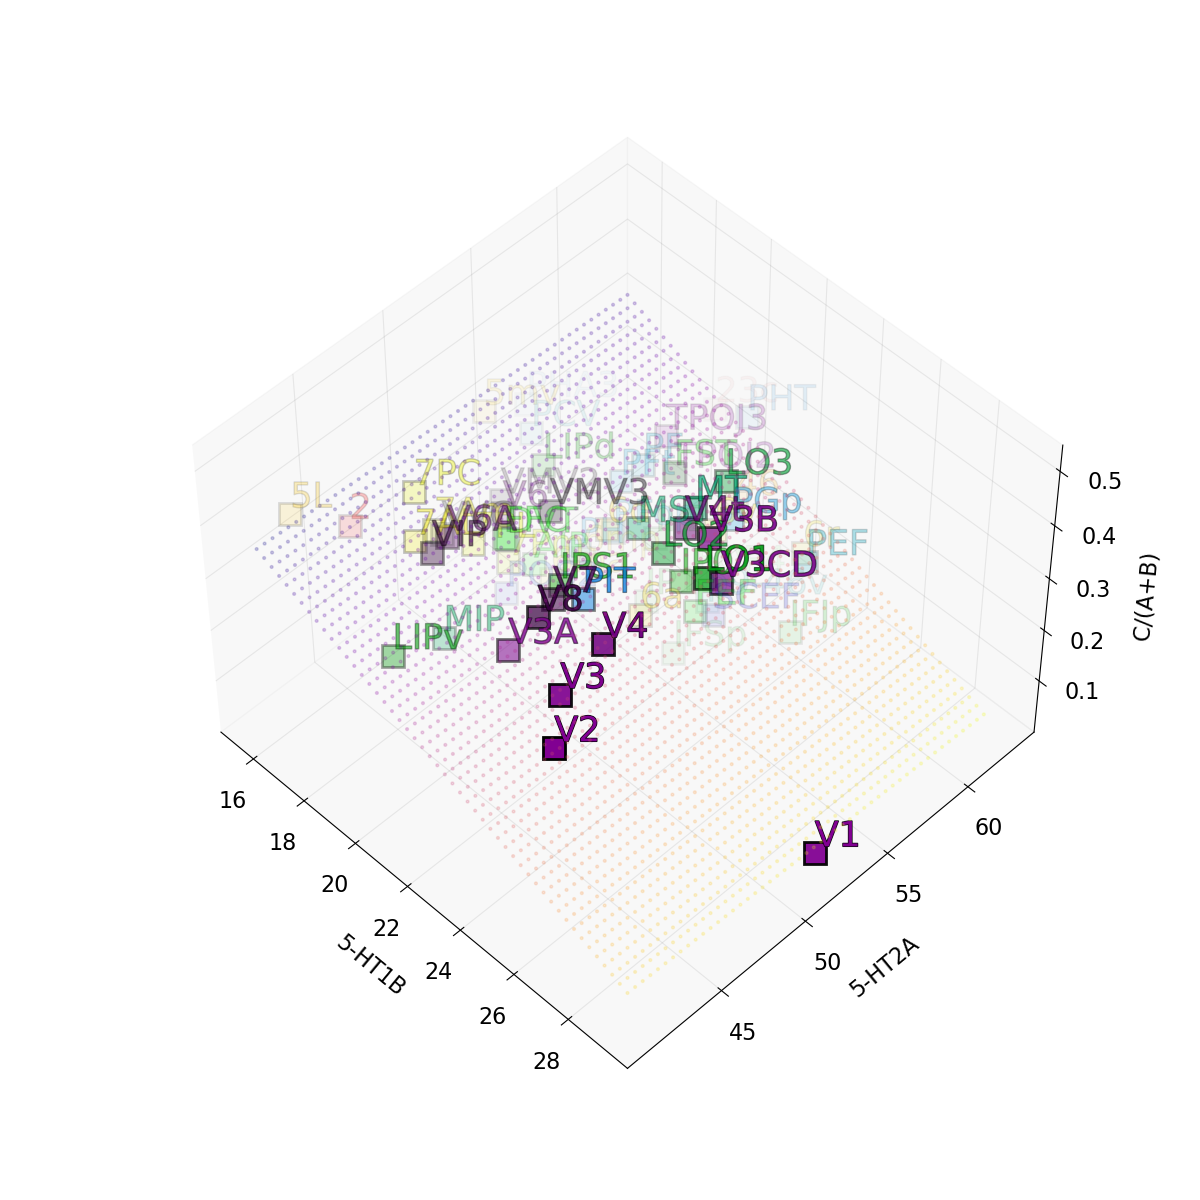

<IPython.core.display.Javascript object>


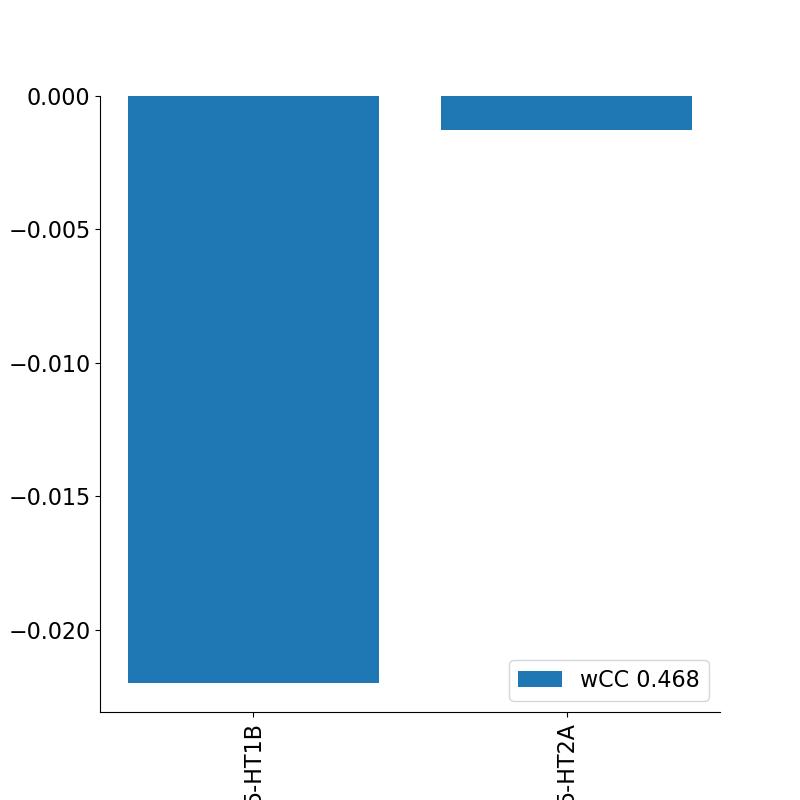

0

In [17]:
#%%capture
display(HTML("<style>div.output_scroll { height: 150em; }</style>"))
pl.close('all')
#fsnative vox vol for correction: 4.8270
#generalized quantitative parameter plots
#'Eccentricity'#'Suppression Index (full)'#'Suppression Index#'Size (fwhmax)'#'Surround Size (fwatmin)'
#'Norm Param. B'#''Ratio (B/D)'#'Norm Param. D'#'RSq'#'CCrsq_task-1R'#'CSS Exponent'#'Amplitude'
#'Surround Amplitude'#'Size (sigma_1)'##'Size (sigma_2)'
#'Size ratio (sigma_2/sigma_1)'#C/A#'B/A'#'D/C'#'D/A'#'B/C'#'Surround volume (full)'#'Centre volume (full)'
#'(A+B)/(C+D)'#'(A*B)/(C*D)'#'(A*D)/(C*B)'#'(A+D)/(C+B)'#'Point-stim derivative'#'(C(A+B))/(A(C+D))'
#'Min/Max Response Ratio'#'Max/Min Response Ratio'#'A(C+D)/C(A+B)'##Min/Max Response Ratio (with BD)'
#'A/C'
####DoG
#'Surround volume (full)'
#'Surround/Centre Amplitude' 
#'Surround-Centre Amplitude'
#'Surround-Centre Volume'

#parameters = ['Eccentricity', 'Norm Param. B', 'Norm Param. D', 'Size (sigma_1)','Size (sigma_2)', 'Amplitude','Surround Amplitude', 'Polar Angle',
#              '5-HT1A', '5-HT1B', '5-HT2A', '5-HT4', '5-HTT', 'GABA_A','Amplitude','Surround Amplitude', 'RSq']#,]#'Size ratio (sigma_2/sigma_1)']# 'Size (sigma_1)', 'Size (sigma_2)', 'Amplitude','Surround Amplitude']

parameters = ['5-HT1A', '5-HT1B', '5-HT2A', 'GABA_A', '5-HTT','Norm Param. B', 'C/(A+B)', 'C/D', 'Norm Param. D', 'Size ratio (sigma_2/sigma_1)', 'RSq']#, 'Eccentricity','Size (sigma_1)','Size (sigma_2)']#

x_dims_idx = [1,2]
y_dims_idx = [6]

#rois = ['custom.V1', 'custom.V2', 'custom.V3','custom.V3AB','custom.hV4','custom.LO','custom.TO','custom.IPS','all_custom']
#rois = ['V1', 'V2', 'V3','V3AB','hV4','LO','TO','VO','IPS']#, 'combined']#['Brain'] #'V1', 'V2', 'V3','V3AB','hV4','LO','TO','IPS','combined', 
#rois = [ 'V1', 'V2', 'V3', 'hV4', 'VO1', 'VO2', 'PHC1', 'PHC2', 'LO1', 'LO2', 'TO1', 'TO2', 'V3A', 'V3B', 'IPS0', 'IPS1', 'IPS2', 'IPS3', 'IPS4', 'IPS5', 'SPL1', 'FEF']
#rois = ['all_custom']
rois = [roi for roi in vis_res.idx_rois['fsaverage'] if 'glasser' in roi]# and 'V1' not in roi]
# rois = ['glasser_V1','glasser_V2','glasser_V3','glasser_V4','glasser_V3A','glasser_V7','glasser_V3B','glasser_V3CD',
# 'glasser_LO1','glasser_LO2','glasser_PIT','glasser_V8','glasser_VMV3',
# 'glasser_IPS1','glasser_IP0','glasser_PGp','glasser_LO3','glasser_MT','glasser_V4t','glasser_FFC']
rois.append('combined')
        
rsq_thresh = 0.0
save_figures= False
figure_path = '/Volumes/Crucial_X8/PRFMapping/Figures/attemptwnames_wang_ecc65rsq015/ols'

space_names = 'fsaverage'
#set to 'all' to plot all analyses
analysis_names = 'fit-task-BAR_fit-runs-all'#-CVmedian

subject_ids = ['fsaverage_cvrsq']#_1sthalf', 'fsaverage_cvrsq_2ndhalf']#']#_1sthalf', 'fsaverage_cvrsq_2ndhalf']#fsaverage, fsaverage_cvrsq, 'fsaverage_hcp1sthalf', 'fsaverage_hcp2ndhalf']

excluded_rois = ['excl_v123']

vis_res.set_alpha(only_models=['Norm_abcd'], ecc_min=0.0, ecc_max=8.0, threshold_li=True, excluded_rois=excluded_rois)

#ols_results = dict()
#for y_dims_idx in [[5],[6]]:
#    for x_dims_idx in [[3, 4], [2, 4], [2, 3], [1, 4], [1, 3], [1, 2], [0, 4], [0, 3], [0, 2], [0, 1]]: #combinations:#

vis_res.multidim_analysis(parameters, rois, rsq_thresh, save_figures, figure_path, space_names = space_names, parameter_toplevel='Receptor Maps', rsq_weights= True,
                    analysis_names = analysis_names, subject_ids = subject_ids, x_dims_idx=x_dims_idx, y_dims_idx=y_dims_idx,
                          zscore_data= False, zscore_data_across_rois = False, 
                          size_response_curves = False, plot_corr_matrix = False, perform_ols = True, polar_plots = False,
                             cv_regression = False, bold_voxel_volume=4.096, zconfint_err_alpha=None, quantile_exclusion=0.999,
                          #vis_pca_comps_rois: fr which rois to make pca comp beta plots; 
                          #vis_pca_comps_axes: which comps to use in 2d plot of mean pca comp per roi
                        perform_pca = False, vis_pca_pycortex = True, vis_pca_comps_rois = ['combined'], vis_pca_comps_axes = [0,1], rsq_alpha_pca_plot = True,
                          perform_pls = False, vis_pls_pycortex = False)
        
 #       mergedict_OR(ols_results, vis_res.ols_result_dict)

os.system(f"open {sound_file}")


In [71]:
vis_res.ols_3d_fig.savefig('/Volumes/Crucial_X8/PRFMapping/Figures/OLS figs/normB_OLS_angle_view.pdf',dpi=600, bbox_inches='tight')

In [39]:
(gaba alone wCCcv:0.63, 1A alone wCCcv:-0.67). together wCCcv:0.85.  '5-HT1A' pval<10^-6, 'GABA_A' pval<10^-6 
(1B alone wCCcv:0.44, 2A alone wCCcv:-0.17). together wCCcv:0.58. '5-HT1B' pval=0.0000270 '5-HT2A' pval=0.0047390    
    
no V1
wCC_cv: (5-HT1B alone has 0.22, 5-HT2A 0.19) 0.4370
5-HT1B pval=0.0041210
5-HT2A pval=0.0128170

[0.0038]

In [ ]:
wCC prediction (fit on roi means, eval on roi means) 0.2669
Estimated OLS betas (fit on roi means) C/D Norm_abcd [-3543.5831  -355.2544]

5-HT1B pval=0.1020640
5-HT2A pval=0.7449550


In [7]:
import itertools

N = 4
numbers = list(range(N+1))

combinations = []
for i in range(1, N+2):
    combinations.extend(itertools.combinations(numbers, i))

print(combinations)

[(0,), (1,), (2,), (3,), (4,), (0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4), (0, 1, 2), (0, 1, 3), (0, 1, 4), (0, 2, 3), (0, 2, 4), (0, 3, 4), (1, 2, 3), (1, 2, 4), (1, 3, 4), (2, 3, 4), (0, 1, 2, 3), (0, 1, 2, 4), (0, 1, 3, 4), (0, 2, 3, 4), (1, 2, 3, 4), (0, 1, 2, 3, 4)]


In [10]:
for key in ols_results:
    this_param_model = []
    rec_models = []
    this_param_betas = []
    for key2 in ols_results[key]:
        rec_models.append(key2)
        this_param_model.append(np.mean(ols_results[key][key2]['wCC']))
        this_param_betas.append(np.mean(ols_results[key][key2]['betas'],axis=0))
    
    print(f"\n{key}")
    sorted_results = np.sort(this_param_model)[::-1]
    sorted_models = np.array(rec_models)[np.argsort(this_param_model)[::-1]]
    sorted_betas = np.array(this_param_betas)[np.argsort(this_param_model)[::-1]]
    for p in range(len(this_param_model)):
        print(f"{p}. wCC {sorted_results[p]:.4f}; recs {sorted_models[p]}; betas {sorted_betas[p]}")
    
    

In [ ]:
the hypothesis only concern a positive correlation of a parameter and a receptor. 
it does not concern the fact that the receptors should be taken as an actual model for the parameters.
im happy to see that in basically of the models the beta of the relevant receptor has the right sign.
we could analyze the following purely data driven result.
Norm Param. B Norm_abcd (main hypothesis:GABA_A++ 5-HT1A--)
0. wCC 0.8517; recs ['5-HT1A', '5-HT2A', 'GABA_A']; betas [-2.4156 -0.3072  0.265 ]
1. wCC 0.8516; recs ['5-HT1A', 'GABA_A']; betas [-2.5619  0.2509]                            
2. wCC 0.8498; recs ['5-HT1A', '5-HT2A', '5-HTT', 'GABA_A']; betas [-2.3502 -0.3609 -1.9602  0.2829]
3. wCC 0.8498; recs ['5-HT1A', '5-HTT', 'GABA_A']; betas [-2.5284 -1.6249  0.2637]
4. wCC 0.8492; recs ['5-HT1A', '5-HT1B', 'GABA_A']; betas [-2.5716 -0.0613  0.2521]
5. wCC 0.8481; recs ['5-HT1A', '5-HT1B', '5-HTT', 'GABA_A']; betas [-2.5445 -0.1337 -1.7595  0.2674]
6. wCC 0.8459; recs ['5-HT1A', '5-HT1B', '5-HT2A', 'GABA_A']; betas [-2.3316  0.3125 -0.4209  0.2631]
7. wCC 0.8445; recs ['5-HT1A', '5-HT1B', '5-HT2A', '5-HTT', 'GABA_A']; betas [-2.2826  0.2632 -0.454  -1.9356  0.2808]
8. wCC 0.8074; recs ['5-HT1B', '5-HT2A', '5-HTT', 'GABA_A']; betas [ 3.4742 -3.1947 -3.8479  0.3626]
9. wCC 0.8070; recs ['5-HT1B', '5-HT2A', 'GABA_A']; betas [ 3.7107 -3.2407  0.3303]
10. wCC 0.7799; recs ['5-HT1A', '5-HT2A', '5-HTT']; betas [-3.7255  1.7886 10.0753]
11. wCC 0.7737; recs ['5-HT1A', '5-HT1B', '5-HT2A', '5-HTT']; betas [-3.4338  0.914   1.3867 10.0692]
12. wCC 0.7723; recs ['5-HT2A', '5-HTT', 'GABA_A']; betas [-2.8975 -7.2758  0.458 ]
13. wCC 0.7691; recs ['5-HT1A', '5-HT1B', '5-HTT']; betas [-2.6233  2.6293 11.6214]
14. wCC 0.7643; recs ['5-HT2A', 'GABA_A']; betas [-2.9435  0.4062]
15. wCC 0.7496; recs ['5-HT1A', '5-HT2A']; betas [-3.9262  2.4157]
16. wCC 0.7440; recs ['5-HT1A', '5-HTT']; betas [-3.0214 13.9961]
17. wCC 0.7403; recs ['5-HT1A', '5-HT1B', '5-HT2A']; betas [-3.7023  0.7108  2.1053]
18. wCC 0.7245; recs ['5-HT1A', '5-HT1B']; betas [-2.4382  3.4758]
19. wCC 0.6676; recs ['5-HT1A']; betas [-2.945]
20. wCC 0.6586; recs ['5-HT1B', '5-HTT', 'GABA_A']; betas [ 2.3013 -6.0886  0.2858]
21. wCC 0.6561; recs ['5-HT1B', 'GABA_A']; betas [2.6532 0.2325]
22. wCC 0.6529; recs ['5-HT1B', '5-HT2A', '5-HTT']; betas [ 6.8945 -2.4954 12.8146]
23. wCC 0.6408; recs ['5-HTT', 'GABA_A']; betas [-8.2831  0.3559]
24. wCC 0.6317; recs ['GABA_A']; betas [0.2949]
25. wCC 0.5952; recs ['5-HT1B', '5-HT2A']; betas [ 7.2399 -1.9586]
26. wCC 0.5362; recs ['5-HT1B', '5-HTT']; betas [5.3409 8.0821]
27. wCC 0.5137; recs ['5-HT1B']; betas [5.7976]
28. wCC 0.3484; recs ['5-HT2A', '5-HTT']; betas [-1.2066 15.3508]
29. wCC 0.3007; recs ['5-HTT']; betas [12.4451]
30. wCC 0.0782; recs ['5-HT2A']; betas [-0.4745]

Norm Param. D Norm_abcd (main hypothesis:5-HT1B++ 5-HT2A--)
0. wCC 0.6549; recs ['5-HT1A', '5-HT1B', '5-HTT', 'GABA_A']; betas [-0.6468  0.4416 -2.057   0.0422]
1. wCC 0.6519; recs ['5-HT1A', '5-HT1B', 'GABA_A']; betas [-0.6749  0.5313  0.0245]
2. wCC 0.6519; recs ['5-HT1A', '5-HT1B', '5-HT2A', '5-HTT', 'GABA_A']; betas [-0.4418  0.7589 -0.3522 -2.1799  0.0524]
3. wCC 0.6490; recs ['5-HT1A', '5-HT1B', '5-HT2A', 'GABA_A']; betas [-0.4917  0.8218 -0.3175  0.0327]
4. wCC 0.6476; recs ['5-HT1A', '5-HTT', 'GABA_A']; betas [-0.6917 -2.3629  0.0541]
5. wCC 0.6416; recs ['5-HT1B', '5-HT2A', '5-HTT', 'GABA_A']; betas [ 1.3862 -0.8836 -2.5263  0.0681]
6. wCC 0.6408; recs ['5-HT1A', '5-HT2A', '5-HTT', 'GABA_A']; betas [-0.6724 -0.0387 -2.3914  0.0561]
7. wCC 0.6407; recs ['5-HT1A', 'GABA_A']; betas [-0.735   0.0359]
8. wCC 0.6368; recs ['5-HT1A', '5-HT1B']; betas [-0.6616  0.8768]
9. wCC 0.6358; recs ['5-HT1A', '5-HT2A', 'GABA_A']; betas [-0.7487  0.0285  0.0346]
10. wCC 0.6351; recs ['5-HT1A', '5-HT1B', '5-HTT']; betas [-0.6609  0.8766  0.0529]
11. wCC 0.6318; recs ['5-HT1A', '5-HT1B', '5-HT2A']; betas [-0.6592  0.8808 -0.0059]
12. wCC 0.6315; recs ['5-HT1B', '5-HT2A', 'GABA_A']; betas [ 1.5417 -0.9125  0.0469]
13. wCC 0.6314; recs ['5-HT1A', '5-HT1B', '5-HT2A', '5-HTT']; betas [-0.6563  0.8852 -0.0109  0.062 ]
14. wCC 0.6200; recs ['5-HT1A', '5-HT2A']; betas [-0.946   0.3857]
15. wCC 0.6197; recs ['5-HT1A', '5-HT2A', '5-HTT']; betas [-0.9458  0.3867 -0.0029]
16. wCC 0.5966; recs ['5-HT1A', '5-HTT']; betas [-0.7936  0.8451]
17. wCC 0.5932; recs ['5-HT1A']; betas [-0.7893]
18. wCC 0.5787; recs ['5-HT1B', '5-HT2A']; betas [ 2.0445 -0.7297]                           
19. wCC 0.5779; recs ['5-HT1B', '5-HT2A', '5-HTT']; betas [ 2.0296 -0.7532  0.5929]
20. wCC 0.5584; recs ['5-HT2A', '5-HTT', 'GABA_A']; betas [-0.7647 -3.9023  0.1061]
21. wCC 0.5128; recs ['5-HT2A', 'GABA_A']; betas [-0.7881  0.0784]
22. wCC 0.4793; recs ['5-HT1B', '5-HTT', 'GABA_A']; betas [ 1.0618 -3.1453  0.0468]
23. wCC 0.4554; recs ['5-HT1B', 'GABA_A']; betas [1.244  0.0194]
24. wCC 0.4420; recs ['5-HT1B']; betas [1.5074]
25. wCC 0.4413; recs ['5-HT1B', '5-HTT']; betas [ 1.5601 -0.8308]
26. wCC 0.4152; recs ['5-HTT', 'GABA_A']; betas [-4.1705  0.0792]
27. wCC 0.3412; recs ['GABA_A']; betas [0.0486]
28. wCC 0.1954; recs ['5-HT2A', '5-HTT']; betas [-0.3737  1.3386]
29. wCC 0.1726; recs ['5-HT2A']; betas [-0.3106]
30. wCC 0.0373; recs ['5-HTT']; betas [0.4434]

## PCA

fsaverage fit-task-BAR_fit-runs-all fsaverage_cvrsq
thresholding at 27.290789658414187 subjects
fsaverage fit-task-BAR_fit-runs-all fsaverage_cvrsq_2ndhalf
thresholding at 13.847806913306545 subjects
fsaverage fit-task-BAR_fit-runs-all fsaverage_cvrsq_1sthalf
thresholding at 13.11686366363076 subjects
fsaverage fit-task-BAR_fit-runs-all fsaverage_cvrsq
Make sure bold_voxel_volume is specified in mm^3
Upsampling correction factor: [2.1213]
fit-task-BAR_fit-runs-all fsaverage_cvrsq glasser_1
X-dims: ['5-HT1A', '5-HT1B', '5-HT2A', '5-HT4']
Y-dims: ['5-HTT', 'GABA_A']
alldims ['5-HT1A', '5-HT1B', '5-HT2A', '5-HT4', '5-HTT', 'GABA_A']
ord dims ['5-HT1A', '5-HT1B', '5-HT2A', '5-HT4', '5-HTT', 'Amplitude Norm_abcd', 'Eccentricity Norm_abcd', 'GABA_A', 'Norm Param. B Norm_abcd', 'Norm Param. D Norm_abcd', 'Polar Angle Norm_abcd', 'RSq Norm_abcd', 'Size (sigma_1) Norm_abcd', 'Size (sigma_2) Norm_abcd', 'Size ratio (sigma_2/sigma_1) Norm_abcd', 'Surround Amplitude Norm_abcd']
Sample size: 0
fit-

<IPython.core.display.Javascript object>


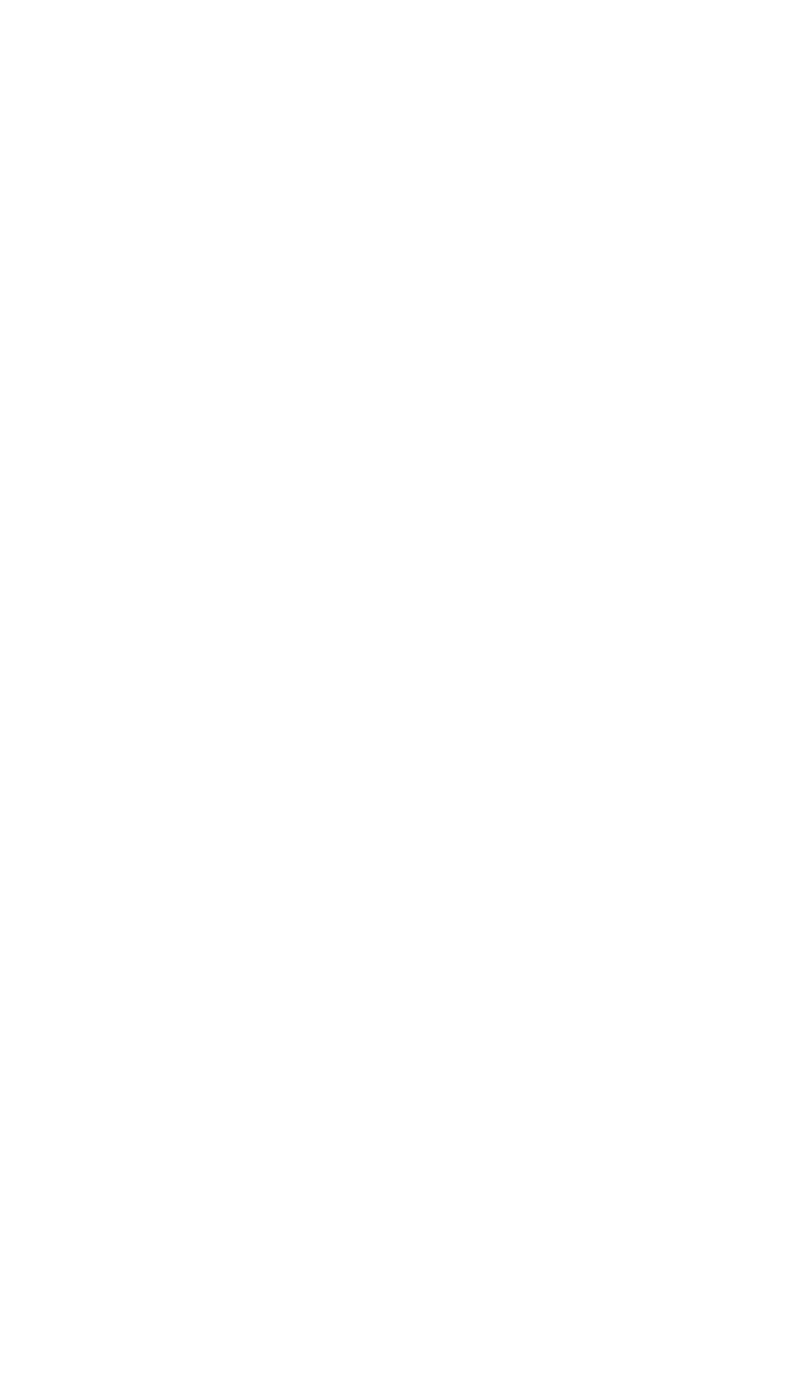

<IPython.core.display.Javascript object>


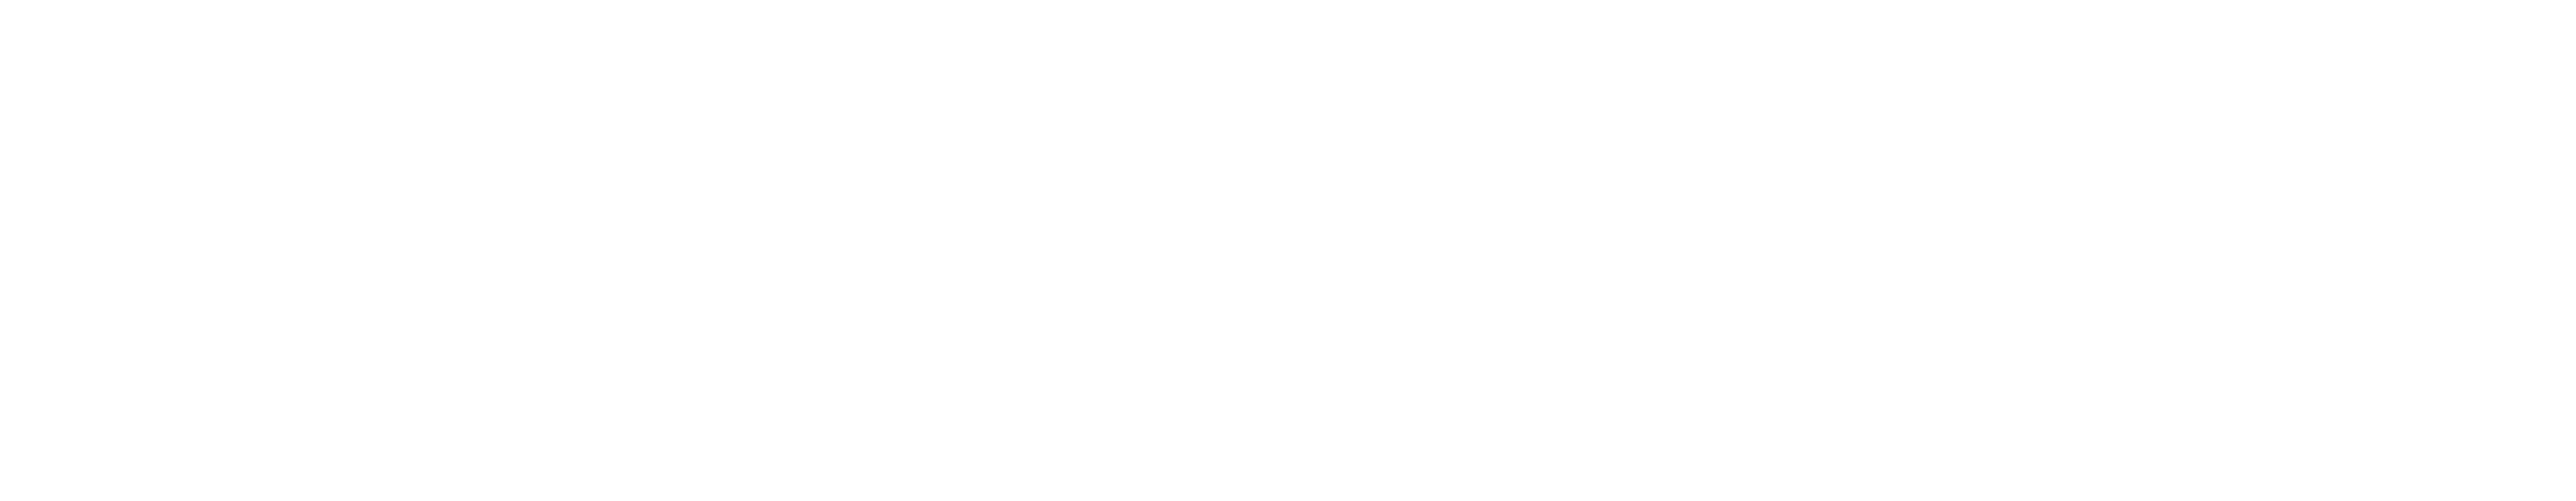

PCA component 1 (R2=0.47)
PCA component 2 (R2=0.34)
PCA component 3 (R2=0.11)
PCA component 4 (R2=0.04)
PCA component 5 (R2=0.03)
PCA component 6 (R2=0.02)


/Users/marcoaqil/anaconda3/envs/prfpy_2021/lib/python3.9/site-packages/statsmodels/stats/weightstats.py:228: RuntimeWarning: invalid value encountered in sqrt
  return std / np.sqrt(self.sum_weights - 1)


wCC (roi means) PCA comp 1 VS Amplitude Norm_abcd: 0.3255 ---
wCC (roi means) PCA comp 1 VS Eccentricity Norm_abcd: -0.4549 ---
wCC (roi means) PCA comp 1 VS Norm Param. B Norm_abcd: -0.8265 ---
wCC (roi means) PCA comp 1 VS Norm Param. D Norm_abcd: -0.6206 ---
wCC (roi means) PCA comp 1 VS Polar Angle Norm_abcd: -0.3547 ---
wCC (roi means) PCA comp 1 VS Size (sigma_1) Norm_abcd: 0.5450 ---
wCC (roi means) PCA comp 1 VS Size (sigma_2) Norm_abcd: 0.3925 ---
wCC (roi means) PCA comp 1 VS Size ratio (sigma_2/sigma_1) Norm_abcd: -0.7961 ---
wCC (roi means) PCA comp 1 VS Surround Amplitude Norm_abcd: 0.5891 ---
wCC (roi means) PCA comp 2 VS Amplitude Norm_abcd: -0.0103 ---
wCC (roi means) PCA comp 2 VS Eccentricity Norm_abcd: -0.0434 ---
wCC (roi means) PCA comp 2 VS Norm Param. B Norm_abcd: 0.2104 ---
wCC (roi means) PCA comp 2 VS Norm Param. D Norm_abcd: 0.3432 ---
wCC (roi means) PCA comp 2 VS Polar Angle Norm_abcd: 0.0104 ---
wCC (roi means) PCA comp 2 VS Size (sigma_1) Norm_abcd: -0.22

<IPython.core.display.Javascript object>


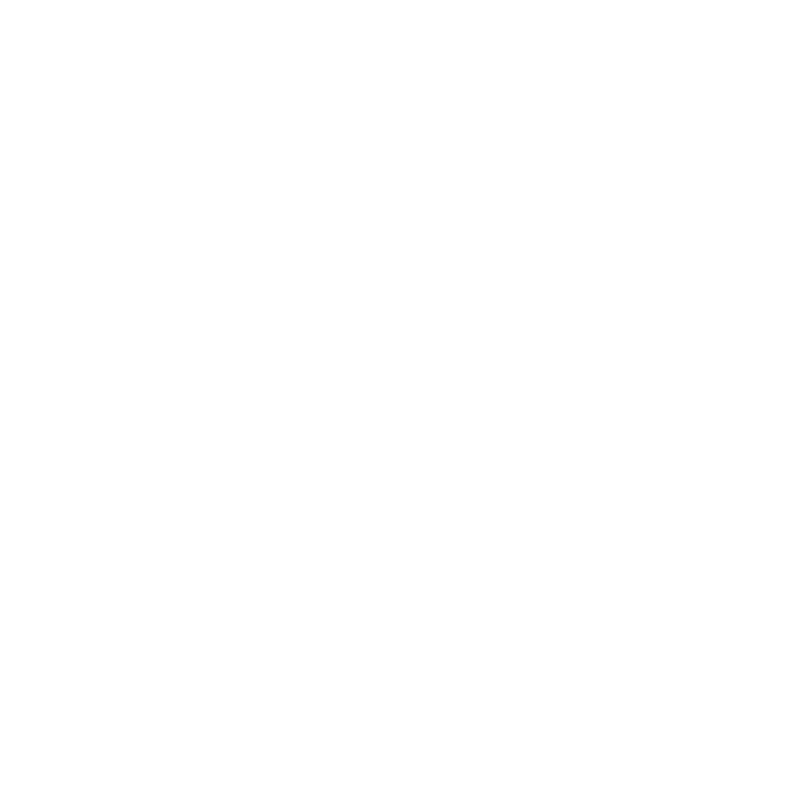

0

In [22]:
#%%capture
display(HTML("<style>div.output_scroll { height: 150em; }</style>"))
pl.close('all')
#generalized quantitative parameter plots
#'Eccentricity'#'Suppression Index (full)'#'Suppression Index#'Size (fwhmax)'#'Surround Size (fwatmin)'
#'Norm Param. B'#''Ratio (B/D)'#'Norm Param. D'#'RSq'#'CCrsq_task-1R'#'CSS Exponent'#'Amplitude'
#'Surround Amplitude'#'Size (sigma_1)'##'Size (sigma_2)'
#'Size ratio (sigma_2/sigma_1)'#C/A#'B/A'#'D/C'#'D/A'#'B/C'#'Surround volume (full)'#'Centre volume (full)'
#'(A+B)/(C+D)'#'(A*B)/(C*D)'#'(A*D)/(C*B)'#'(A+D)/(C+B)'#'Point-stim derivative'#'(C(A+B))/(A(C+D))'
#'Min/Max Response Ratio'#'Max/Min Response Ratio'#'A(C+D)/C(A+B)'##Min/Max Response Ratio (with BD)'
#'A/C'
####DoG
#'Surround volume (full)'
#'Surround/Centre Amplitude' 
#'Surround-Centre Amplitude'
#'Surround-Centre Volume'

#parameters = ['Eccentricity', 'Norm Param. B', 'Norm Param. D', 'Size (sigma_1)','Size (sigma_2)', 'Amplitude','Surround Amplitude', 'Polar Angle',
#              '5-HT1A', '5-HT1B', '5-HT2A', '5-HT4', '5-HTT', 'GABA_A','Amplitude','Surround Amplitude', 'RSq']#,]#'Size ratio (sigma_2/sigma_1)']# 'Size (sigma_1)', 'Size (sigma_2)', 'Amplitude','Surround Amplitude']

parameters = ['5-HT1A','5-HT4', '5-HT1B', '5-HT2A', 'GABA_A', '5-HTT','Amplitude','Surround Amplitude', 'Eccentricity','Norm Param. B', 'Norm Param. D', 'Polar Angle', 'Size (sigma_1)', 'Size (sigma_2)','Size ratio (sigma_2/sigma_1)','RSq']#

x_dims_idx = [0,1,2,3]
y_dims_idx = [4,5]

#rois = ['custom.V1', 'custom.V2', 'custom.V3','custom.V3AB','custom.hV4','custom.LO','custom.TO','custom.IPS','all_custom']
#rois = ['V1', 'V2', 'V3','V3AB','hV4','LO','TO','IPS', 'combined']#['Brain'] #'V1', 'V2', 'V3','V3AB','hV4','LO','TO','IPS','combined', 
#rois = [ 'V1', 'V2', 'V3', 'hV4', 'VO1', 'VO2', 'PHC1', 'PHC2', 'TO2', 'TO1', 'LO2', 'LO1', 'V3B', 'V3A', 'IPS0', 'IPS1', 'IPS2', 'IPS3', 'IPS4', 'IPS5', 'SPL1']#, 'combined']
#rois = ['all_custom']
left, right = cortex.db.fsaverage.surfaces.inflated.get()
points = np.concatenate((left[0],right[0]))
left_flat, right_flat = cortex.db.fsaverage.surfaces.flat.get()
points_flat = np.concatenate((left_flat[0],right_flat[0]))

rois = [roi for roi in vis_res.idx_rois['fsaverage'] if 'glasser' in roi]

#nodorsal
#rois = [roi for roi in vis_res.idx_rois['fsaverage'] if 'glasser' in roi and points_flat[vis_res.idx_rois['fsaverage'][roi],:].mean(0)[1]<20]
#nofrontal
#rois = [roi for roi in vis_res.idx_rois['fsaverage'] if 'glasser' in roi and points[vis_res.idx_rois['fsaverage'][roi],:].mean(0)[1]<-40]
#rois = ['glasser_V1','glasser_V2','glasser_V3','glasser_V4','glasser_V3A','glasser_V7','glasser_V3B','glasser_V3CD',
#'glasser_LO1','glasser_LO2','glasser_PIT','glasser_V8','glasser_VMV3',
#'glasser_IPS1','glasser_IP0','glasser_PGp','glasser_LO3','glasser_MT','glasser_V4t','glasser_FFC']
rois.append('combined')
        
rsq_thresh = 0.0
save_figures= False
figure_path = '/Volumes/Crucial_X8/PRFMapping/Figures/pca_figs'

space_names = 'fsaverage'
#set to 'all' to plot all analyses
analysis_names = 'fit-task-BAR_fit-runs-all'#''fit-task-BAR_fit-runs-CVmedian'# 'fit-task-BAR_fit-runs-all'#'fit-task-BAR_fit-runs-CVmedian'
subject_ids = ['fsaverage_cvrsq']#'fsaverage_hcp1sthalf', 'fsaverage_hcp2ndhalf']

excluded_rois = ['excl_v123']

vis_res.set_alpha(only_models=['Norm_abcd'], ecc_min=0.0, ecc_max=8.0, threshold_li=True, excluded_rois=excluded_rois)

vis_res.multidim_analysis(parameters, rois, rsq_thresh, save_figures, figure_path, space_names = space_names, parameter_toplevel='Receptor Maps', rsq_weights= True,
                    analysis_names = analysis_names, subject_ids = subject_ids, x_dims_idx=x_dims_idx, y_dims_idx=y_dims_idx,
                          zscore_data= False, zscore_data_across_rois = False, #data that goes into pca is always automatically zscored even if this is false
                          size_response_curves = False, plot_corr_matrix = False, perform_ols = False, polar_plots = False,
                             cv_regression = False, bold_voxel_volume=4.096, zconfint_err_alpha=None, quantile_exclusion=0.999,
                          #vis_pca_comps_rois: fr which rois to make pca comp beta plots; 
                          #vis_pca_comps_axes: which comps to use in 2d plot of mean pca comp per roi
                        perform_pca = True, vis_pca_pycortex = False, vis_pca_comps_rois = ['combined'], vis_pca_comps_axes = [0,1], rsq_alpha_pca_plot = True,
                          perform_pls = False, vis_pls_pycortex = False)

os.system(f"open {sound_file}")


In [14]:
np.save('/Users/marcoaqil/fsavglasserL.npy', np.concatenate(tuple([vis_res.idx_rois['fsaverage'][roi] for roi in vis_res.idx_rois['fsaverage'] if 'lh.glasser' in roi])))#np.concatenate(tuple([vis_res.idx_rois['999999'][roi] for roi in vis_res.idx_rois['999999'] if 'V1L' in roi])))

In [15]:
np.save('/Users/marcoaqil/fsavV1R.npy', vis_res.idx_rois['fsaverage']['rh.glasser_V1'])#np.concatenate(tuple([vis_res.idx_rois['fsaverage'][roi] for roi in vis_res.idx_rois['fsaverage'] if 'lh.glasser' in roi])))

In [16]:
 vis_res.idx_rois['fsaverage']['rh.glasser_V1']

array([163873, 163925, 163973, ..., 325798, 325799, 325800])

In [11]:
vis_res.idx_rois['fsaverage'].keys()

dict_keys(['V1v', 'V1d', 'V2v', 'V2d', 'V3v', 'V3d', 'hV4', 'VO1', 'VO2', 'PHC1', 'PHC2', 'TO2', 'TO1', 'LO2', 'LO1', 'V3B', 'V3A', 'IPS0', 'IPS1', 'IPS2', 'IPS3', 'IPS4', 'IPS5', 'SPL1', 'FEF', 'visual_system', 'V1', 'V2', 'V3', 'VO', 'TO', 'LO', 'V3AB', 'IPS', 'custom.hV4', 'custom.IPS', 'custom.LO', 'custom.TO', 'custom.V1', 'custom.V2', 'custom.V3', 'custom.V3AB', 'lh.glasser_1', 'lh.glasser_10d', 'lh.glasser_10pp', 'lh.glasser_10r', 'lh.glasser_10v', 'lh.glasser_11l', 'lh.glasser_13l', 'lh.glasser_2', 'lh.glasser_23c', 'lh.glasser_23d', 'lh.glasser_24dd', 'lh.glasser_24dv', 'lh.glasser_25', 'lh.glasser_31a', 'lh.glasser_31pd', 'lh.glasser_31pv', 'lh.glasser_33pr', 'lh.glasser_3a', 'lh.glasser_3b', 'lh.glasser_4', 'lh.glasser_43', 'lh.glasser_44', 'lh.glasser_45', 'lh.glasser_46', 'lh.glasser_47l', 'lh.glasser_47m', 'lh.glasser_47s', 'lh.glasser_52', 'lh.glasser_55b', 'lh.glasser_5L', 'lh.glasser_5m', 'lh.glasser_5mv', 'lh.glasser_6a', 'lh.glasser_6d', 'lh.glasser_6ma', 'lh.glasser

## PLS

In [ ]:
#%%capture
#display(HTML("<style>div.output_scroll { height: 150em; }</style>"))
pl.close('all')
#generalized quantitative parameter plots
#'Eccentricity'#'Suppression Index (full)'#'Suppression Index#'Size (fwhmax)'#'Surround Size (fwatmin)'
#'Norm Param. B'#''Ratio (B/D)'#'Norm Param. D'#'RSq'#'CCrsq_task-1R'#'CSS Exponent'#'Amplitude'
#'Surround Amplitude'#'Size (sigma_1)'##'Size (sigma_2)'
#'Size ratio (sigma_2/sigma_1)'#C/A#'B/A'#'D/C'#'D/A'#'B/C'#'Surround volume (full)'#'Centre volume (full)'
#'(A+B)/(C+D)'#'(A*B)/(C*D)'#'(A*D)/(C*B)'#'(A+D)/(C+B)'#'Point-stim derivative'#'(C(A+B))/(A(C+D))'
#'Min/Max Response Ratio'#'Max/Min Response Ratio'#'A(C+D)/C(A+B)'##Min/Max Response Ratio (with BD)'
#'A/C'
####DoG
#'Surround volume (full)'
#'Surround/Centre Amplitude' 
#'Surround-Centre Amplitude'
#'Surround-Centre Volume'

#parameters = ['Eccentricity', 'Norm Param. B', 'Norm Param. D', 'Size (sigma_1)','Size (sigma_2)', 'Amplitude','Surround Amplitude', 'Polar Angle',
#              '5-HT1A', '5-HT1B', '5-HT2A', '5-HT4', '5-HTT', 'GABA_A','Amplitude','Surround Amplitude', 'RSq']#,]#'Size ratio (sigma_2/sigma_1)']# 'Size (sigma_1)', 'Size (sigma_2)', 'Amplitude','Surround Amplitude']

parameters = ['5-HT1A', '5-HT1B', '5-HT2A', 'GABA_A', '5-HTT', 'Eccentricity','Norm Param. B', 'Norm Param. D', 'Size (sigma_1)','Size (sigma_2)','RSq']#

x_dims_idx = [0,1,2,3,4]
y_dims_idx = [5,6,7,8,9]

#rois = ['custom.V1', 'custom.V2', 'custom.V3','custom.V3AB','custom.hV4','custom.LO','custom.TO','custom.IPS','all_custom']
#rois = ['V1', 'V2', 'V3','V3AB','hV4','LO','TO','IPS', 'combined']#['Brain'] #'V1', 'V2', 'V3','V3AB','hV4','LO','TO','IPS','combined', 
#rois = [ 'V1', 'V2', 'V3', 'hV4', 'VO1', 'VO2', 'PHC1', 'PHC2', 'TO2', 'TO1', 'LO2', 'LO1', 'V3B', 'V3A', 'IPS0', 'IPS1', 'IPS2', 'IPS3', 'IPS4', 'IPS5', 'SPL1']#, 'combined']
#rois = ['all_custom']
rois = [roi for roi in vis_res.idx_rois['fsaverage'] if 'glasser' in roi]
#rois = ['glasser_V1','glasser_V2','glasser_V3','glasser_V4','glasser_V3A','glasser_V7','glasser_V3B','glasser_V3CD',
#'glasser_LO1','glasser_LO2','glasser_PIT','glasser_V8','glasser_VMV3',
#'glasser_IPS1','glasser_IP0','glasser_PGp','glasser_LO3','glasser_MT','glasser_V4t','glasser_FFC']
rois.append('combined')
        
rsq_thresh = 0.0
save_figures= False
figure_path = '/Volumes/Crucial_X8/PRFMapping/Figures/attemptwnames_glasser_ecc65rsq030/pls'

space_names = 'fsaverage'
#set to 'all' to plot all analyses
analysis_names = 'fit-task-BAR_fit-runs-all'#'fit-task-BAR_fit-runs-CVmedian'

subject_ids = ['fsaverage_cvrsq']#['fsaverage_hcp1sthalf', 'fsaverage_hcp2ndhalf']

excluded_rois = []

vis_res.set_alpha(only_models=['Norm_abcd'], ecc_min=0.0, ecc_max=8.0, threshold_li=True, excluded_rois=excluded_rois)

vis_res.multidim_analysis(parameters, rois, rsq_thresh, save_figures, figure_path, space_names = space_names, parameter_toplevel='Receptor Maps', rsq_weights= True,
                    analysis_names = analysis_names, subject_ids = subject_ids, x_dims_idx=x_dims_idx, y_dims_idx=y_dims_idx,
                          zscore_data= False, zscore_data_across_rois = True, 
                          size_response_curves = False, plot_corr_matrix = False, perform_ols = False, polar_plots = False,
                             cv_regression = False, bold_voxel_volume=4.096, zconfint_err_alpha=None, quantile_exclusion=0.999,
                          #vis_pca_comps_rois: fr which rois to make pca comp beta plots; 
                          #vis_pca_comps_axes: which comps to use in 2d plot of mean pca comp per roi
                        perform_pca = False, vis_pca_pycortex = False, vis_pca_comps_rois = ['combined'], vis_pca_comps_axes = [0,1], rsq_alpha_pca_plot = True,
                          perform_pls = True, vis_pls_pycortex = False)

os.system(f"open {sound_file}")


## Size-response curves

In [ ]:
vis_res.main_dict['fsaverage']['fit-task-BAR_fit-runs-all']['fsaverage_cvrsq']['analysis_info'] = vis_res.main_dict['HCP']['fit-task-BAR_fit-runs-all']['100610']['analysis_info']

In [ ]:
#%%capture
#display(HTML("<style>div.output_scroll { height: 150em; }</style>"))
pl.close('all')
#generalized quantitative parameter plots
#'Eccentricity'#'Suppression Index (full)'#'Suppression Index#'Size (fwhmax)'#'Surround Size (fwatmin)'
#'Norm Param. B'#''Ratio (B/D)'#'Norm Param. D'#'RSq'#'CCrsq_task-1R'#'CSS Exponent'#'Amplitude'
#'Surround Amplitude'#'Size (sigma_1)'##'Size (sigma_2)'
#'Size ratio (sigma_2/sigma_1)'#C/A#'B/A'#'D/C'#'D/A'#'B/C'#'Surround volume (full)'#'Centre volume (full)'
#'(A+B)/(C+D)'#'(A*B)/(C*D)'#'(A*D)/(C*B)'#'(A+D)/(C+B)'#'Point-stim derivative'#'(C(A+B))/(A(C+D))'
#'Min/Max Response Ratio'#'Max/Min Response Ratio'#'A(C+D)/C(A+B)'##Min/Max Response Ratio (with BD)'
#'A/C'
####DoG
#'Surround volume (full)'
#'Surround/Centre Amplitude' 
#'Surround-Centre Amplitude'
#'Surround-Centre Volume'

parameters = ['Eccentricity', 'Norm Param. B', 'Norm Param. D', 'Size (sigma_1)','Size (sigma_2)', 'Polar Angle',
              '5-HT1A', '5-HT1B', '5-HT2A', '5-HT4', '5-HTT', 'GABA_A','Amplitude','Surround Amplitude', 'RSq']#,'Amplitude','Surround Amplitude']#'Size ratio (sigma_2/sigma_1)']# 'Size (sigma_1)', 'Size (sigma_2)', 'Amplitude','Surround Amplitude']

x_dims_idx = [0,1,2,3,4,5]
y_dims_idx = [12,13]

third_dim_sr_curves = '5-HT1A'#'Norm Param. D Norm_abcd'

rois = ['custom.V1', 'custom.V2', 'custom.V3','custom.V3AB','custom.hV4','custom.LO','custom.TO','custom.VO','custom.IPS']
#rois = ['V1', 'V2', 'V3','V3AB','hV4','LO','TO','VO','IPS']#,'combined']#[roi for roi in vis_res.idx_rois['fsaverage'] if 'glasser' in roi] #'V1', 'V2', 'V3','V3AB','hV4','LO','TO','IPS','combined', 
#rois = [roi for roi in vis_res.idx_rois['fsaverage'] if 'glasser' in roi]
#rois = ['glasser_V1','glasser_V2','glasser_V3','glasser_V4','glasser_V3A','glasser_V7','glasser_V3B','glasser_V3CD',
#'glasser_LO1','glasser_LO2','glasser_PIT','glasser_V8','glasser_VMV3',
#'glasser_IPS1','glasser_IP0','glasser_PGp','glasser_LO3','glasser_MT','glasser_V4t','glasser_FFC']
#rois = [ 'V1', 'V2', 'V3', 'hV4', 'VO1', 'VO2', 'PHC1', 'PHC2', 'TO2', 'TO1', 'LO2', 'LO1', 'V3B', 'V3A', 'IPS0', 'IPS1', 'IPS2', 'IPS3', 'IPS4', 'IPS5', 'SPL1', 'combined']
#rois = ['all_custom']
        
rsq_thresh = 0.15
save_figures = False
figure_path = '/Volumes/Crucial_X8/PRFMapping/Figures/newfsarsqwmlowthr/size_response_glasser'

space_names = 'fsaverage'
#set to 'all' to plot all analyses
analysis_names = 'fit-task-BAR_fit-runs-all'

subject_ids = ['fsaverage_cvrsq']#'fsaverage_hcp1sthalf', 'fsaverage_hcp2ndhalf']

excluded_rois = []

vis_res.set_alpha(only_models=['Norm_abcd'], ecc_min=0.0, ecc_max=8.0, threshold_li=True, excluded_rois=excluded_rois)

vis_res.multidim_analysis(parameters, rois, rsq_thresh, save_figures, figure_path, space_names = space_names, parameter_toplevel='Receptor Maps', rsq_weights= True,
                    analysis_names = analysis_names, subject_ids = subject_ids, x_dims_idx=x_dims_idx, y_dims_idx=y_dims_idx,
                          zscore_data = False, zscore_data_across_rois = False, 
                          size_response_curves = True, third_dim_sr_curves = third_dim_sr_curves,
                          plot_corr_matrix = False, perform_ols = False, polar_plots = False,
                             cv_regression = False, bold_voxel_volume=4.096, zconfint_err_alpha=None, quantile_exclusion=0.999,
                            #vis_pca_comps_rois: fr which rois to make pca comp beta plots; 
                          #vis_pca_comps_axes: which comps to use in 2d plot of mean pca comp per roi
                        perform_pca = False, vis_pca_pycortex = False, vis_pca_comps_rois = ['combined'], vis_pca_comps_axes = [0,1], rsq_alpha_pca_plot = True,
                          perform_pls = False, vis_pls_pycortex = False)

os.system(f"open {sound_file}")

In [ ]:
[[3, 4], [2, 4], [2, 3], [1, 4], [1, 3], [1, 2], [0, 4], [0, 3], [0, 2], [0, 1]]

In [ ]:
import itertools

N = 4
numbers = list(range(N+1))

combinations = []
for i in range(1, N+2):
    combinations.extend(itertools.combinations(numbers, i))

print(combinations[::-1])

## Correlation matrix

fsaverage fit-task-BAR_fit-runs-all fsaverage_cvrsq
thresholding at 27.290789658414187 subjects
fsaverage fit-task-BAR_fit-runs-all fsaverage_cvrsq
Make sure bold_voxel_volume is specified in mm^3
Upsampling correction factor: [2.1213]
Ordered dimensions: ['5-HT1A', '5-HT1B', '5-HT2A', '5-HT4', '5-HTT', 'Amplitude Norm_abcd', 'Eccentricity Norm_abcd', 'GABA_A', 'Norm Param. B Norm_abcd', 'Norm Param. D Norm_abcd', 'Polar Angle Norm_abcd', 'RSq Norm_abcd', 'Ratio (B/D) Norm_abcd', 'Size (sigma_1) Norm_abcd', 'Size (sigma_2) Norm_abcd', 'Size ratio (sigma_2/sigma_1) Norm_abcd', 'Surround Amplitude Norm_abcd']
Ordered dimensions: ['5-HT1A', '5-HT1B', '5-HT2A', '5-HT4', '5-HTT', 'Amplitude Norm_abcd', 'Eccentricity Norm_abcd', 'GABA_A', 'Norm Param. B Norm_abcd', 'Norm Param. D Norm_abcd', 'Polar Angle Norm_abcd', 'RSq Norm_abcd', 'Ratio (B/D) Norm_abcd', 'Size (sigma_1) Norm_abcd', 'Size (sigma_2) Norm_abcd', 'Size ratio (sigma_2/sigma_1) Norm_abcd', 'Surround Amplitude Norm_abcd']
Ordere

Ordered dimensions: ['5-HT1A', '5-HT1B', '5-HT2A', '5-HT4', '5-HTT', 'Amplitude Norm_abcd', 'Eccentricity Norm_abcd', 'GABA_A', 'Norm Param. B Norm_abcd', 'Norm Param. D Norm_abcd', 'Polar Angle Norm_abcd', 'RSq Norm_abcd', 'Ratio (B/D) Norm_abcd', 'Size (sigma_1) Norm_abcd', 'Size (sigma_2) Norm_abcd', 'Size ratio (sigma_2/sigma_1) Norm_abcd', 'Surround Amplitude Norm_abcd']
Ordered dimensions: ['5-HT1A', '5-HT1B', '5-HT2A', '5-HT4', '5-HTT', 'Amplitude Norm_abcd', 'Eccentricity Norm_abcd', 'GABA_A', 'Norm Param. B Norm_abcd', 'Norm Param. D Norm_abcd', 'Polar Angle Norm_abcd', 'RSq Norm_abcd', 'Ratio (B/D) Norm_abcd', 'Size (sigma_1) Norm_abcd', 'Size (sigma_2) Norm_abcd', 'Size ratio (sigma_2/sigma_1) Norm_abcd', 'Surround Amplitude Norm_abcd']
Ordered dimensions: ['5-HT1A', '5-HT1B', '5-HT2A', '5-HT4', '5-HTT', 'Amplitude Norm_abcd', 'Eccentricity Norm_abcd', 'GABA_A', 'Norm Param. B Norm_abcd', 'Norm Param. D Norm_abcd', 'Polar Angle Norm_abcd', 'RSq Norm_abcd', 'Ratio (B/D) Norm_

Ordered dimensions: ['5-HT1A', '5-HT1B', '5-HT2A', '5-HT4', '5-HTT', 'Amplitude Norm_abcd', 'Eccentricity Norm_abcd', 'GABA_A', 'Norm Param. B Norm_abcd', 'Norm Param. D Norm_abcd', 'Polar Angle Norm_abcd', 'RSq Norm_abcd', 'Ratio (B/D) Norm_abcd', 'Size (sigma_1) Norm_abcd', 'Size (sigma_2) Norm_abcd', 'Size ratio (sigma_2/sigma_1) Norm_abcd', 'Surround Amplitude Norm_abcd']
Ordered dimensions: ['5-HT1A', '5-HT1B', '5-HT2A', '5-HT4', '5-HTT', 'Amplitude Norm_abcd', 'Eccentricity Norm_abcd', 'GABA_A', 'Norm Param. B Norm_abcd', 'Norm Param. D Norm_abcd', 'Polar Angle Norm_abcd', 'RSq Norm_abcd', 'Ratio (B/D) Norm_abcd', 'Size (sigma_1) Norm_abcd', 'Size (sigma_2) Norm_abcd', 'Size ratio (sigma_2/sigma_1) Norm_abcd', 'Surround Amplitude Norm_abcd']
Ordered dimensions: ['5-HT1A', '5-HT1B', '5-HT2A', '5-HT4', '5-HTT', 'Amplitude Norm_abcd', 'Eccentricity Norm_abcd', 'GABA_A', 'Norm Param. B Norm_abcd', 'Norm Param. D Norm_abcd', 'Polar Angle Norm_abcd', 'RSq Norm_abcd', 'Ratio (B/D) Norm_

Ordered dimensions: ['5-HT1A', '5-HT1B', '5-HT2A', '5-HT4', '5-HTT', 'Amplitude Norm_abcd', 'Eccentricity Norm_abcd', 'GABA_A', 'Norm Param. B Norm_abcd', 'Norm Param. D Norm_abcd', 'Polar Angle Norm_abcd', 'RSq Norm_abcd', 'Ratio (B/D) Norm_abcd', 'Size (sigma_1) Norm_abcd', 'Size (sigma_2) Norm_abcd', 'Size ratio (sigma_2/sigma_1) Norm_abcd', 'Surround Amplitude Norm_abcd']
Ordered dimensions: ['5-HT1A', '5-HT1B', '5-HT2A', '5-HT4', '5-HTT', 'Amplitude Norm_abcd', 'Eccentricity Norm_abcd', 'GABA_A', 'Norm Param. B Norm_abcd', 'Norm Param. D Norm_abcd', 'Polar Angle Norm_abcd', 'RSq Norm_abcd', 'Ratio (B/D) Norm_abcd', 'Size (sigma_1) Norm_abcd', 'Size (sigma_2) Norm_abcd', 'Size ratio (sigma_2/sigma_1) Norm_abcd', 'Surround Amplitude Norm_abcd']
Ordered dimensions: ['5-HT1A', '5-HT1B', '5-HT2A', '5-HT4', '5-HTT', 'Amplitude Norm_abcd', 'Eccentricity Norm_abcd', 'GABA_A', 'Norm Param. B Norm_abcd', 'Norm Param. D Norm_abcd', 'Polar Angle Norm_abcd', 'RSq Norm_abcd', 'Ratio (B/D) Norm_

<IPython.core.display.Javascript object>


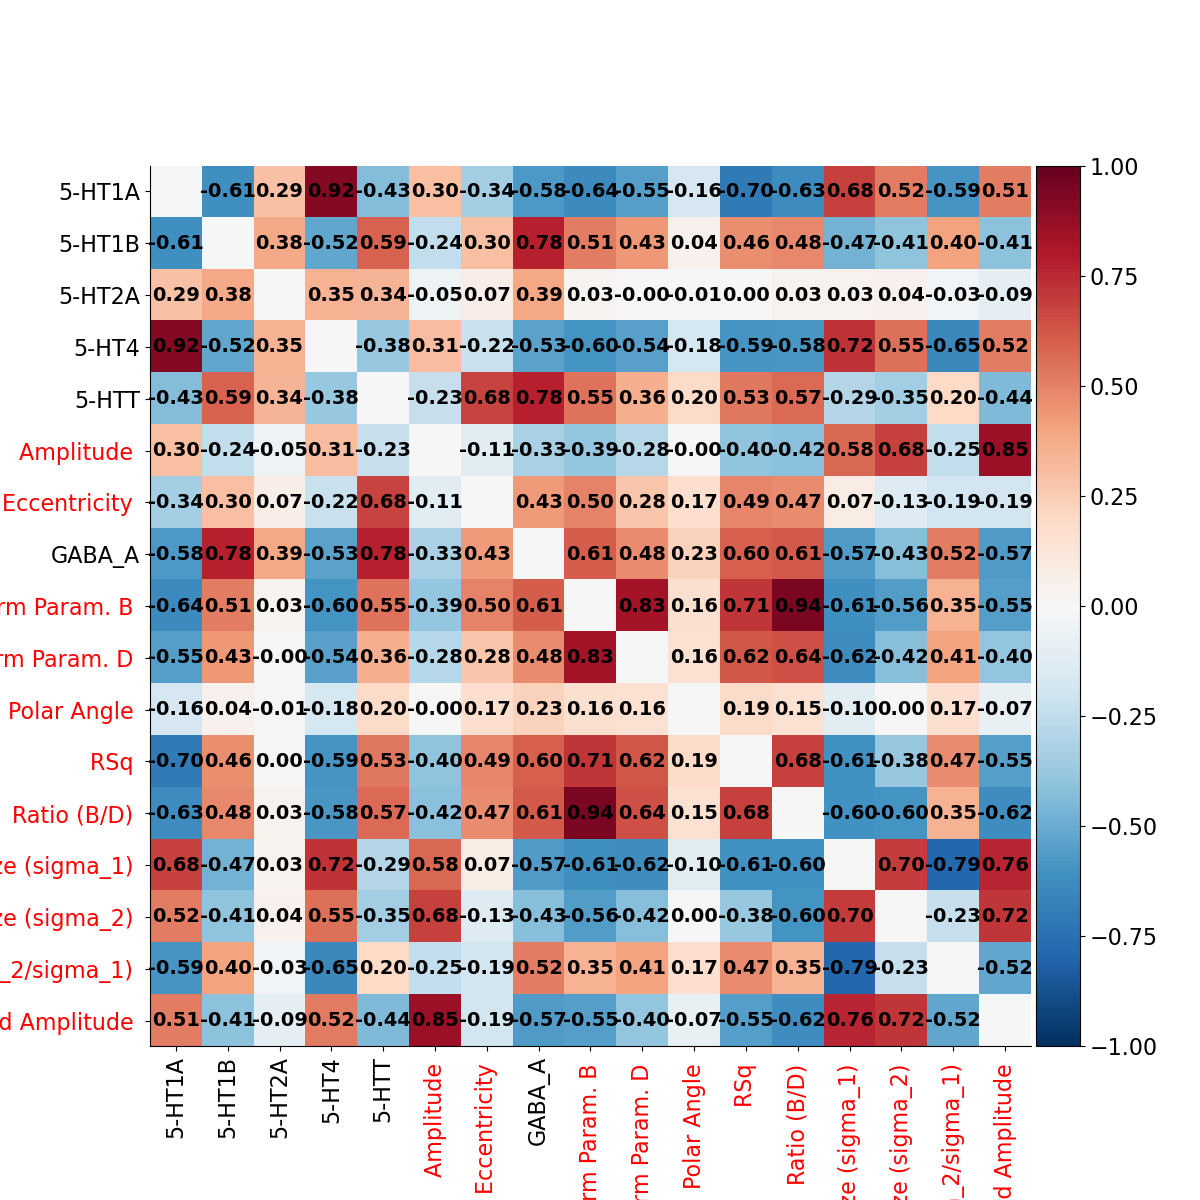

fit-task-BAR_fit-runs-all fsaverage_cvrsq glasser_1
X-dims: ['Eccentricity Norm_abcd', 'Norm Param. B Norm_abcd', 'Norm Param. D Norm_abcd', 'Polar Angle Norm_abcd', 'Size (sigma_1) Norm_abcd', 'Size (sigma_2) Norm_abcd']
Y-dims: ['5-HT1A', '5-HT1B', '5-HT2A', '5-HT4', '5-HTT', 'Amplitude Norm_abcd', 'GABA_A', 'RSq Norm_abcd', 'Ratio (B/D) Norm_abcd', 'Size ratio (sigma_2/sigma_1) Norm_abcd', 'Surround Amplitude Norm_abcd']
alldims ['Eccentricity Norm_abcd', 'Norm Param. B Norm_abcd', 'Norm Param. D Norm_abcd', 'Polar Angle Norm_abcd', 'Size (sigma_1) Norm_abcd', 'Size (sigma_2) Norm_abcd', '5-HT1A', '5-HT1B', '5-HT2A', '5-HT4', '5-HTT', 'Amplitude Norm_abcd', 'GABA_A', 'RSq Norm_abcd', 'Ratio (B/D) Norm_abcd', 'Size ratio (sigma_2/sigma_1) Norm_abcd', 'Surround Amplitude Norm_abcd']
ord dims ['5-HT1A', '5-HT1B', '5-HT2A', '5-HT4', '5-HTT', 'Amplitude Norm_abcd', 'Eccentricity Norm_abcd', 'GABA_A', 'Norm Param. B Norm_abcd', 'Norm Param. D Norm_abcd', 'Polar Angle Norm_abcd', 'RSq Norm

0

In [6]:
#%%capture
#display(HTML("<style>div.output_scroll { height: 150em; }</style>"))
pl.close('all')
#generalized quantitative parameter plots
#'Eccentricity'#'Suppression Index (full)'#'Suppression Index#'Size (fwhmax)'#'Surround Size (fwatmin)'
#'Norm Param. B'#''Ratio (B/D)'#'Norm Param. D'#'RSq'#'CCrsq_task-1R'#'CSS Exponent'#'Amplitude'
#'Surround Amplitude'#'Size (sigma_1)'##'Size (sigma_2)'
#'Size ratio (sigma_2/sigma_1)'#C/A#'B/A'#'D/C'#'D/A'#'B/C'#'Surround volume (full)'#'Centre volume (full)'
#'(A+B)/(C+D)'#'(A*B)/(C*D)'#'(A*D)/(C*B)'#'(A+D)/(C+B)'#'Point-stim derivative'#'(C(A+B))/(A(C+D))'
#'Min/Max Response Ratio'#'Max/Min Response Ratio'#'A(C+D)/C(A+B)'##Min/Max Response Ratio (with BD)'
#'A/C'
####DoG
#'Surround volume (full)'
#'Surround/Centre Amplitude' 
#'Surround-Centre Amplitude'
#'Surround-Centre Volume'

parameters = ['Eccentricity', 'Norm Param. B', 'Norm Param. D', 'Size (sigma_1)','Size (sigma_2)', 'Polar Angle', 'Size ratio (sigma_2/sigma_1)', 'Ratio (B/D)',
              '5-HT1A', '5-HT1B', '5-HT2A', '5-HT4', '5-HTT', 'GABA_A','Amplitude','Surround Amplitude', 'RSq']#,'Amplitude','Surround Amplitude']#'Size ratio (sigma_2/sigma_1)']# 'Size (sigma_1)', 'Size (sigma_2)', 'Amplitude','Surround Amplitude']

x_dims_idx = [0,1,2,3,4,5]
y_dims_idx = [6,7,8,9,10,11,12,13,14,15,16]

#rois = ['custom.V1', 'custom.V2', 'custom.V3','custom.V3AB','custom.hV4','custom.LO','custom.TO','custom.VO','custom.IPS']
#rois = ['V1', 'V2', 'V3','V3AB','hV4','LO','TO','VO','IPS']#,'combined']#[roi for roi in vis_res.idx_rois['fsaverage'] if 'glasser' in roi] #'V1', 'V2', 'V3','V3AB','hV4','LO','TO','IPS','combined', 
rois = [roi for roi in vis_res.idx_rois['fsaverage'] if 'glasser' in roi]
#rois = ['glasser_V1','glasser_V2','glasser_V3','glasser_V4','glasser_V3A','glasser_V7','glasser_V3B','glasser_V3CD',
#'glasser_LO1','glasser_LO2','glasser_PIT','glasser_V8','glasser_VMV3',
#'glasser_IPS1','glasser_IP0','glasser_PGp','glasser_LO3','glasser_MT','glasser_V4t','glasser_FFC']
#rois = [ 'V1', 'V2', 'V3', 'hV4', 'VO1', 'VO2', 'PHC1', 'PHC2', 'TO2', 'TO1', 'LO2', 'LO1', 'V3B', 'V3A', 'IPS0', 'IPS1', 'IPS2', 'IPS3', 'IPS4', 'IPS5', 'SPL1', 'combined']
#rois = ['all_custom']
rois.append('combined') 
    
rsq_thresh = 0.0
save_figures = False
figure_path = '/Volumes/Crucial_X8/PRFMapping/Figures/newfsarsqwmlowthr/correlation_matrix'

space_names = 'fsaverage'
#set to 'all' to plot all analyses
analysis_names = 'fit-task-BAR_fit-runs-all'#'Mean analysis'#

subject_ids = ['fsaverage_cvrsq']#'fsaverage_hcp1sthalf', 'fsaverage_hcp2ndhalf']

excluded_rois = []

vis_res.set_alpha(only_models=['Norm_abcd'], ecc_min=0.0, ecc_max=8.0, threshold_li=True, excluded_rois=excluded_rois)

vis_res.multidim_analysis(parameters, rois, rsq_thresh, save_figures, figure_path, space_names = space_names, parameter_toplevel='Receptor Maps', rsq_weights= True,
                    analysis_names = analysis_names, subject_ids = subject_ids, x_dims_idx=x_dims_idx, y_dims_idx=y_dims_idx,
                          zscore_data = False, zscore_data_across_rois = False, 
                          size_response_curves = False, third_dim_sr_curves = None,
                          plot_corr_matrix = True, perform_ols = False, polar_plots = False,
                             cv_regression = False, bold_voxel_volume=4.096, zconfint_err_alpha=None, quantile_exclusion=0.999,
                            #vis_pca_comps_rois: fr which rois to make pca comp beta plots; 
                          #vis_pca_comps_axes: which comps to use in 2d plot of mean pca comp per roi
                        perform_pca = False, vis_pca_pycortex = False, vis_pca_comps_rois = ['combined'], vis_pca_comps_axes = [0,1], rsq_alpha_pca_plot = True,
                          perform_pls = False, vis_pls_pycortex = False)

os.system(f"open {sound_file}")

# HCP Crossvalidation

## Simple viz

In [ ]:
full_rsq = np.concatenate(tuple([vis_res.main_dict['HCP']['fit-task-BAR_fit-runs-CVmedian'][sj]['Processed Results']['RSq']['Norm_abcd'] for sj in vis_res.main_dict['HCP']['fit-task-BAR_fit-runs-CVmedian'].keys()]))
full_rsq_gauss = np.concatenate(tuple([vis_res.main_dict['HCP']['fit-task-BAR_fit-runs-CVmedian'][sj]['Processed Results']['RSq']['Gauss'] for sj in vis_res.main_dict['HCP']['fit-task-BAR_fit-runs-CVmedian'].keys()]))

In [ ]:
nc = np.concatenate(tuple([vis_res.main_dict['HCP']['fit-task-BAR_fit-runs-CVmedian'][sj]['Processed Results']['Noise Ceiling']['Noise Ceiling (RSq)'] for sj in vis_res.main_dict['HCP']['fit-task-BAR_fit-runs-CVmedian'].keys()]))


In [ ]:
thresh = -10
#mask_rsq = ((nc>thresh) + (full_rsq>thresh) + (full_rsq_gauss>thresh)) * (full_rsq_gauss!=0) * (full_rsq!=0) * ((nc>-5) * (full_rsq>-5) * (full_rsq_gauss>-5))
mask_rsq = (nc>thresh) * (full_rsq>thresh) * (full_rsq_gauss>thresh) #* (full_rsq_gauss!=0) * (full_rsq!=0) 

In [ ]:
np.nanquantile(nc[mask_rsq],0.1)

In [ ]:
pl.figure(figsize=(16,8))
pl.hist(full_rsq_gauss[mask_rsq],bins=np.linspace(thresh,1,1000), label='gauss cvr2', alpha=0.8)
pl.hist(full_rsq[mask_rsq],bins=np.linspace(thresh,1,1000), label='DN cvr2', alpha=0.8)
pl.hist(nc[mask_rsq],bins=np.linspace(thresh,1,1000), label='noise ceiling', alpha=0.8)
pl.axvline(np.mean(full_rsq[mask_rsq]), color='r', linestyle='dashed', linewidth=1, label=f'DN cvr2 mean ({np.mean(full_rsq[mask_rsq]):.2f})')
pl.axvline(np.mean(full_rsq_gauss[mask_rsq]), color='k', linestyle='dashed', linewidth=1, label=f'gauss cvr2 mean ({np.mean(full_rsq_gauss[mask_rsq]):.2f})')
pl.axvline(np.mean(nc[mask_rsq]), color='b', linestyle='dashed', linewidth=1, label=f'noise ceiling mean ({np.mean(nc[mask_rsq]):.2f})')
pl.axvline(np.median(full_rsq[mask_rsq]), color='r', linewidth=1, label=f'DN cvr2 median ({np.median(full_rsq[mask_rsq]):.2f}) ')
pl.axvline(np.median(full_rsq_gauss[mask_rsq]), color='k', linewidth=1, label=f'gauss cvr2 median ({np.median(full_rsq_gauss[mask_rsq]):.2f})')
pl.axvline(np.median(nc[mask_rsq]), color='b', linewidth=1, label=f'noise ceiling median ({np.median(nc[mask_rsq]):.2f})')
pl.legend()

pl.title(f'crossvalidated r2 distribution and noise ceiling (threshold: {thresh:.2f}. vertices: {np.sum(mask_rsq)})')

In [ ]:
pl.figure(figsize=(16,8))
diff = full_rsq[mask_rsq]-full_rsq_gauss[mask_rsq]
pl.hist(diff,bins=1000, label='diff', alpha=0.8)
pl.axvline(np.mean(diff), color='k', linestyle='dashed', linewidth=1, label='diff cvr2 mean')
pl.axvline(np.median(diff), color='k', linewidth=1, label='diff cvr2 median')
pl.legend()
pl.xlim((-1,1))

## Combining no-cv results with CV-rsq and # of subjects map

In [24]:
#rsqwm have rsq-weighted means over subjects on fsaverage
#maindict_ #allall, allruns_sepcond_rsqwm, 5050CV, allruns_sepcond_zsc, HCP_181subjects_rsqwm, HCP_999999, 99mean181, 99split20, HCP_cv (tcfit), HCP_tc_nocv
with open('/Volumes/Crucial_X8/maindict_HCP_cv.pickle', 'rb') as handle:
    dict_cv=renamed_load(handle)

In [13]:
dict_cv = vis_res.main_dict

In [14]:
l = [sj for sj in vis_res.main_dict['HCP']['fit-task-BAR_fit-runs-all'].keys()]
l.sort()

In [15]:
#all
m = [sj for sj in dict_cv['HCP']['fit-task-BAR_fit-runs-CVmedian'].keys() if sj in l]
m.sort()

In [8]:
#one half
m = [sj for sj in dict_cv['HCP']['fit-task-BAR_fit-runs-CVmedian'].keys() if sj in l][::2]
m.sort()

In [11]:
#the other half
m = [sj for sj in dict_cv['HCP']['fit-task-BAR_fit-runs-CVmedian'].keys() if sj in l][1::2]
m.sort()

In [17]:
from skimage import filters
hcp_group_average = dict()
ds_pyc = dict()

#only works on fsaverage because 'HCP' is not treated as a common space so it has one fewer layer in depth
#create the HCP_cvrsq subject manually if you want to do it in HCP space
space = 'fsaverage'  
if space == 'fsaverage':
    pyc_sj = 'fsaverage'
else:
    pyc_sj = '999999'

weights = np.nan_to_num(np.array([dict_cv[space]['fit-task-BAR_fit-runs-CVmedian'][sj]['Processed Results']['RSq']['Norm_abcd'] for sj in m]))
weights[weights<=0] = 0


sj_number_map = np.sum(weights>0, axis=0)
threshold_li = filters.threshold_li(sj_number_map)
print(threshold_li)
# 'A/D', 'C/D', 'A/B', 'C/B', 'Nvol/D', 'Nvol/B', 'Avol/D', 'Avol/B'  'D/A', 'D/C', 'B/A', 'B/C', 'D/Nvol', 'B/Nvol', 'D/Avol', 'B/Avol'
for param in ['C/(A+B+D)']:#'RSq', 'A/l2norm_abcd', 'B/l2norm_abcd', 'C/l2norm_abcd', 'D/l2norm_abcd']:# 'x_pos', 'y_pos','Norm Param. B','Norm Param. D','Amplitude', 'Surround Amplitude','Size (fwhmax)','Surround Size (fwatmin)','Size (sigma_1)','Size (sigma_2)', 'hrf_1', 'hrf_2']:
    if param == 'x_pos':
        data = np.nan_to_num(np.array([vis_res.main_dict[space]['fit-task-BAR_fit-runs-all'][sj]['Processed Results']['Eccentricity']['Norm_abcd'] for sj in m])*np.cos(np.array([vis_res.main_dict[space]['fit-task-BAR_fit-runs-all'][sj]['Processed Results']['Polar Angle']['Norm_abcd'] for sj in m])))
    elif param == 'y_pos':
        data = np.nan_to_num(np.array([vis_res.main_dict[space]['fit-task-BAR_fit-runs-all'][sj]['Processed Results']['Eccentricity']['Norm_abcd'] for sj in m])*np.sin(np.array([vis_res.main_dict[space]['fit-task-BAR_fit-runs-all'][sj]['Processed Results']['Polar Angle']['Norm_abcd'] for sj in m])))
    
    elif param == 'RSq':
        data = np.copy(weights)
    else:
        data = np.nan_to_num(np.array([vis_res.main_dict[space]['fit-task-BAR_fit-runs-all'][sj]['Processed Results'][param]['Norm_abcd'] for sj in m]))

    if param == 'RSq':
        hcp_group_average[param] = (data*(weights>0)).sum(0)/(weights>0).sum(0)
    else:
        hcp_group_average[param] = (data*weights).sum(0)/weights.sum(0)


# with open('/Volumes/Crucial_X8/maindict_HCP_cv.pickle', 'rb') as handle:
#     dict_cv_no_hrf_fit=dill.load(handle)
# hcp_group_average['Rsqdiff_hrf_fit'] = np.nanmean(np.nan_to_num(np.array([vis_res.main_dict[space]['fit-task-BAR_fit-runs-CVmedian'][sj]['Processed Results']['RSq']['Norm_abcd']-\
#                                                                           dict_cv_no_hrf_fit[space]['fit-task-BAR_fit-runs-CVmedian'][sj]['Processed Results']['RSq']['Norm_abcd'] for sj in m])), axis=0)

    
#hcp_group_average['Polar Angle'] = np.arctan2(hcp_group_average['y_pos'], hcp_group_average['x_pos'])
#hcp_group_average['Eccentricity'] = np.sqrt(hcp_group_average['y_pos']**2 + hcp_group_average['x_pos']**2) 
hcp_group_average['#Subjects with CVRSq>0'] = np.copy(sj_number_map)



27.290789658414187


/var/folders/vb/gdqfj5px0gb7r_bgl5hpf8n00000gn/T/ipykernel_77737/2825960057.py:35: RuntimeWarning: invalid value encountered in divide
  hcp_group_average[param] = (data*weights).sum(0)/weights.sum(0)


In [19]:
for param in ['C/(A+B+D)']:#'A/l2norm_abcd', 'B/l2norm_abcd', 'C/l2norm_abcd', 'D/l2norm_abcd']:
    vis_res.main_dict[space]['fit-task-BAR_fit-runs-all'][f'{space}_cvrsq']['Processed Results'][param]['Norm_abcd'] = np.copy(hcp_group_average[param])

In [13]:
for param in hcp_group_average:
    vis_res.main_dict[space]['fit-task-BAR_fit-runs-all'][f'{space}_cvrsq_2ndhalf']['Processed Results'][param]['Norm_abcd'] = np.copy(hcp_group_average[param])


vis_res.main_dict[space]['fit-task-BAR_fit-runs-all'][f'{space}_cvrsq_2ndhalf']['Processed Results']['RSq']['Norm_abcd']=np.nan_to_num(vis_res.main_dict[space]['fit-task-BAR_fit-runs-all'][f'{space}_cvrsq']['Processed Results']['RSq']['Norm_abcd'])
vis_res.main_dict[space]['fit-task-BAR_fit-runs-all'][f'{space}_cvrsq_2ndhalf']['Processed Results']['Size ratio (sigma_2/sigma_1)']['Norm_abcd']=vis_res.main_dict[space]['fit-task-BAR_fit-runs-all'][f'{space}_cvrsq']['Processed Results']['Size (sigma_2)']['Norm_abcd']/vis_res.main_dict[space]['fit-task-BAR_fit-runs-all'][f'{space}_cvrsq']['Processed Results']['Size (sigma_1)']['Norm_abcd']
vis_res.main_dict[space]['fit-task-BAR_fit-runs-all'][f'{space}_cvrsq_2ndhalf']['Processed Results']['Ratio (B/D)']['Norm_abcd']=vis_res.main_dict[space]['fit-task-BAR_fit-runs-all'][f'{space}_cvrsq']['Processed Results']['Norm Param. B']['Norm_abcd']/vis_res.main_dict[space]['fit-task-BAR_fit-runs-all'][f'{space}_cvrsq']['Processed Results']['Norm Param. D']['Norm_abcd']


/var/folders/vb/gdqfj5px0gb7r_bgl5hpf8n00000gn/T/ipykernel_92839/8475619.py:6: RuntimeWarning: invalid value encountered in true_divide
  vis_res.main_dict[space]['fit-task-BAR_fit-runs-all'][f'{space}_cvrsq_2ndhalf']['Processed Results']['Size ratio (sigma_2/sigma_1)']['Norm_abcd']=vis_res.main_dict[space]['fit-task-BAR_fit-runs-all'][f'{space}_cvrsq']['Processed Results']['Size (sigma_2)']['Norm_abcd']/vis_res.main_dict[space]['fit-task-BAR_fit-runs-all'][f'{space}_cvrsq']['Processed Results']['Size (sigma_1)']['Norm_abcd']
/var/folders/vb/gdqfj5px0gb7r_bgl5hpf8n00000gn/T/ipykernel_92839/8475619.py:7: RuntimeWarning: invalid value encountered in true_divide
  vis_res.main_dict[space]['fit-task-BAR_fit-runs-all'][f'{space}_cvrsq_2ndhalf']['Processed Results']['Ratio (B/D)']['Norm_abcd']=vis_res.main_dict[space]['fit-task-BAR_fit-runs-all'][f'{space}_cvrsq']['Processed Results']['Norm Param. B']['Norm_abcd']/vis_res.main_dict[space]['fit-task-BAR_fit-runs-all'][f'{space}_cvrsq']['Proce

In [15]:
#HCP_hrffit #HCP_99hrffit #hrffit_onlyfsavcvrsq
with open('/Volumes/Crucial_X8/maindict_hrffit_onlyfsavcvrsq.pickle', 'rb') as handle:
    dict_hrffit_fsavonly=dill.load(handle)

In [16]:
dict_hrffit_fsavonly[space]['fit-task-BAR_fit-runs-all'][f'{space}_cvrsq_2ndhalf'] = deepcopy(vis_res.main_dict[space]['fit-task-BAR_fit-runs-all'][f'{space}_cvrsq_2ndhalf'])
dict_hrffit_fsavonly[space]['fit-task-BAR_fit-runs-all'][f'{space}_cvrsq_1sthalf'] = deepcopy(vis_res.main_dict[space]['fit-task-BAR_fit-runs-all'][f'{space}_cvrsq_1sthalf'])

In [17]:
with open('/Volumes/Crucial_X8/maindict_hrffit_onlyfsavcvrsq.pickle', 'wb') as handle:
     dill.dump(dict_hrffit_fsavonly, handle)

In [22]:
pyc_sj = 'fsaverage'
sj_number_map = dict_hrffit['fsaverage']['fit-task-BAR_fit-runs-all']['fsaverage_cvrsq']['Processed Results']['#Subjects with CVRSq>0']['Norm_abcd']
hcp_group_average = dict()
ds_pyc = dict()
hcp_group_average['Rsqdiff_hrf_fit'] = dict_hrffit['fsaverage']['fit-task-BAR_fit-runs-all']['fsaverage_cvrsq']['Processed Results']['RSq']['Norm_abcd']-vis_res.main_dict['fsaverage']['fit-task-BAR_fit-runs-all']['fsaverage_cvrsq']['Processed Results']['RSq']['Norm_abcd']

In [23]:
mask=(hcp_group_average['RSq']>0.1)*sj_number_map

for param in ['A/l2norm_abcd', 'B/l2norm_abcd', 'C/l2norm_abcd', 'D/l2norm_abcd']:
    ds_pyc = dict()
    if param == 'Polar Angle':
        pyc_cmap = 'hsvx2'
        vmin1 = -3.1415
        vmax1 = 3.1415
    elif param in ['x_pos', 'y_pos']:
        pyc_cmap = 'nipy_spectral'
        vmin1 = -4
        vmax1 = 4
    elif param == 'RSq':
        pyc_cmap = 'inferno'
        vmin1 = 0
        vmax1 = 0.3  
    elif param == 'Rsqdiff_hrf_fit':
        pyc_cmap = 'RdBu_r'
        vmin1 = -0.1
        vmax1 = 0.1
    elif param == 'Norm Param. B':
        pyc_cmap = 'viridis_r'
        vmin1 = 0#np.nanquantile(hcp_group_average[param][sj_number_map>threshold_li],0.1)
        vmax1 = 100#np.nanquantile(hcp_group_average[param][sj_number_map>threshold_li],0.9)      
    elif param == 'Norm Param. D':
        pyc_cmap = 'inferno_r'
        vmin1 = 1#np.nanquantile(hcp_group_average[param][sj_number_map>threshold_li],0.1)
        vmax1 = 100#np.nanquantile(hcp_group_average[param][sj_number_map>threshold_li],0.9)     
    else:
        pyc_cmap = 'nipy_spectral'
        vmin1 = np.nanquantile(hcp_group_average[param][mask],0.2)
        vmax1 = np.nanquantile(hcp_group_average[param][mask],0.6)
        
    ds_pyc[f"{param}"] = Vertex2D_fix(hcp_group_average[param], mask, subject=pyc_sj, 
                                                        vmin=vmin1, 
                                                        vmax=vmax1, 
                                                        vmin2=threshold_li, vmax2=threshold_li+1, cmap=pyc_cmap)
    cortex.webgl.show(ds_pyc)


# select path for static viewer on disk
viewer_path = '/Users/marcoaqil/Downloads'

# create viewer
#cortex.webgl.make_static(outpath=viewer_path, data=ds_pyc, recache=True)
cortex.webgl.show(ds_pyc)

Started server on port 33188
Started server on port 44815
Started server on port 22755
Started server on port 40783
Started server on port 12582


<JS: window.viewer>

<IPython.core.display.Javascript object>


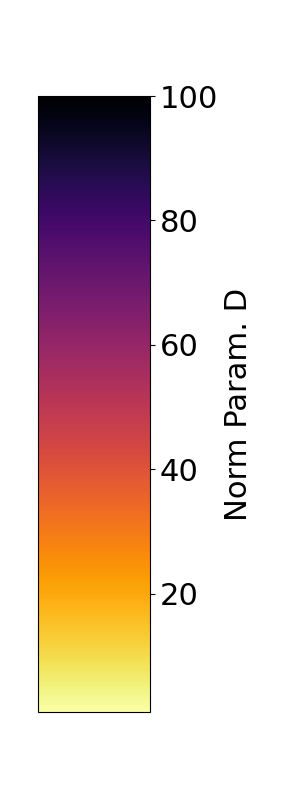

In [94]:
pl.close('all')
# for param in ['x_pos', 'y_pos']:
#     fig = simple_colorbar(vmin=-4,#np.nanquantile(hcp_group_average[param][sj_number_map>threshold_li],0.05),
#                 vmax=4,#np.nanquantile(hcp_group_average[param][sj_number_map>threshold_li],0.95),
#                 cmap_name=pyc_cmap, ori='horizontal', param_name=param)
for param in ['Norm Param. D']:
    fig = simple_colorbar(vmin=1,#np.nanquantile(hcp_group_average[param][sj_number_map>threshold_li],0.05),
                vmax=100,#np.nanquantile(hcp_group_average[param][sj_number_map>threshold_li],0.95),
                cmap_name='inferno_r', ori='vertical', param_name=param)


## New heading

## CVR2 maps tests (neg values not set to zero, median)

In [ ]:
cvrsq_raw_mean = np.mean([vis_res.main_dict['HCP']['fit-task-BAR_fit-runs-CVmedian'][sj]['Processed Results']['RSq']['Norm_abcd'] for sj in vis_res.main_dict['HCP']['fit-task-BAR_fit-runs-CVmedian'].keys()], axis=0)
cvrsq_raw_median = np.median([vis_res.main_dict['HCP']['fit-task-BAR_fit-runs-CVmedian'][sj]['Processed Results']['RSq']['Norm_abcd'] for sj in vis_res.main_dict['HCP']['fit-task-BAR_fit-runs-CVmedian'].keys()], axis=0)

cvrsq_raw_number_sj = np.sum([vis_res.main_dict['HCP']['fit-task-BAR_fit-runs-CVmedian'][sj]['Processed Results']['RSq']['Norm_abcd']>0 for sj in vis_res.main_dict['HCP']['fit-task-BAR_fit-runs-CVmedian'].keys()], axis=0)


In [ ]:
(cvrsq_raw_mean>0).sum()/len(cvrsq_raw_mean)

In [ ]:
rsq_thresh = 0.0
rsq_max_opacity = 0.15
ds_rsq=dict()
ds_rsq[f"cvrsq_raw_mean"] = cortex.Vertex(cvrsq_raw_mean, subject='999999', 
                                vmin=np.nanquantile(cvrsq_raw_mean,0.1), 
                                vmax=np.nanquantile(cvrsq_raw_mean,0.9), cmap='nipy_spectral')
ds_rsq[f"cvrsq_raw_median"] = cortex.Vertex(cvrsq_raw_median, subject='999999', 
                                vmin=np.nanquantile(cvrsq_raw_median,0.1), 
                                vmax=np.nanquantile(cvrsq_raw_median,0.9), cmap='nipy_spectral')
ds_rsq[f"cvrsq_raw_number_sj"] = cortex.Vertex(cvrsq_raw_number_sj, subject='999999', 
                                vmin=8, 
                                vmax=150, cmap='nipy_spectral')
cortex.webgl.show(ds_rsq)

In [ ]:
from skimage import filters
threshold_yen = filters.threshold_yen(cvrsq_raw_number_sj) #yen=43, otsu=56, isodata=56, li=22, mean=16.54, minimum=89, triangle=8
threshold_otsu = filters.threshold_otsu(cvrsq_raw_number_sj)
threshold_isodata = filters.threshold_isodata(cvrsq_raw_number_sj)
threshold_li = filters.threshold_li(cvrsq_raw_number_sj)
threshold_mean = filters.threshold_mean(cvrsq_raw_number_sj)
threshold_minimum = filters.threshold_minimum(cvrsq_raw_number_sj)
threshold_triangle = filters.threshold_triangle(cvrsq_raw_number_sj)

In [ ]:
thresh

In [ ]:
np.sum(cvrsq_raw_number_sj>thresh)/len(cvrsq_raw_number_sj)

In [ ]:
pl.figure()
pl.hist(cvrsq_raw_number_sj,bins=175)
pl.axvline(threshold_yen, linestyle='--', color='k', label = f"Yen ({threshold_yen:.1f})")
pl.axvline(threshold_otsu, linestyle='--', color='r', label = f"Otsu ({threshold_otsu:.1f})")
pl.axvline(threshold_isodata, linestyle='--', color='g', label = f"Iso ({threshold_isodata:.1f})")
pl.axvline(threshold_li, linestyle='--', color='b', label = f"Li ({threshold_li:.1f})")
pl.axvline(threshold_mean, linestyle='--', color='orange', label = f"Mean ({threshold_mean:.1f})")
pl.axvline(threshold_minimum, linestyle='--', color='pink', label = f"Minimum ({threshold_minimum:.1f})")
pl.axvline(threshold_triangle, linestyle='--', color='yellow', label = f"Triangle ({threshold_triangle:.1f})")
pl.xlabel('# subjects with cvR2>0')
pl.ylabel('# vertices')
pl.yscale('log')
pl.legend()

# Something wrong with subj 115017. investigate

In [ ]:
vis_res.main_dict['HCP']['fit-task-all_fit-runs-all'][sj].keys()

In [ ]:
for sj in vis_res.main_dict['HCP']['fit-task-all_fit-runs-all']:
    print(sj)
    print(vis_res.main_dict['HCP']['fit-task-all_fit-runs-all'][sj]['mask'].sum())
    print(vis_res.main_dict['HCP']['fit-task-all_fit-runs-all'][sj]['Results']['Gauss'].shape)

In [ ]:
#rsqwm have rsq-weighted means over subjects on fsaverage
#maindict_ #allall, allruns_sepcond_rsqwm, 5050CV, allruns_sepcond_zsc, HCP_181subjects_rsqwm, HCP_999999, 99mean181, 99split20, HCP_cv (tcfit), HCP_tc_nocv
with open('/Volumes/Crucial_X8/maindict_HCP_cv.pickle', 'rb') as handle:
    dict_cv=dill.load(handle)

In [ ]:
vis_res.main_dict[space][an_name].keys()

In [ ]:
hcp_group_average = dict()
ds_pyc = dict()
an_name = 'fit-task-all_fit-runs-all'
space = 'fsaverage'  #'HCP'#fsaverage

m = [sj for sj in vis_res.main_dict[space][an_name].keys()]
m.sort()

if space == 'fsaverage':
    pyc_sj = 'fsaverage'
else:
    pyc_sj = '999999'

#cvrsq
weights = np.nan_to_num(np.array([dict_cv[space]['fit-task-BAR_fit-runs-CVmedian'][sj]['Processed Results']['RSq']['Norm_abcd'] for sj in m]))
#noncvrsq
#weights = np.nan_to_num(np.array([vis_res.main_dict[space][an_name][sj]['Processed Results']['RSq']['Norm_abcd'] for sj in m]))

weights[weights<=0] = 0

sj_number_map = np.sum(weights>0, axis=0)
threshold_li = filters.threshold_li(sj_number_map)
print(threshold_li)

for param in ['RSq', 'x_pos', 'y_pos','Norm Param. B','Norm Param. D','Amplitude', 'Surround Amplitude','Size (fwhmax)','Surround Size (fwatmin)','Size (sigma_1)','Size (sigma_2)']:
    if param == 'x_pos':
        data = np.nan_to_num(np.array([vis_res.main_dict[space][an_name][sj]['Processed Results']['Eccentricity']['Norm_abcd'] for sj in m])*np.cos(np.array([vis_res.main_dict[space][an_name][sj]['Processed Results']['Polar Angle']['Norm_abcd'] for sj in m])))
    elif param == 'y_pos':
        data = np.nan_to_num(np.array([vis_res.main_dict[space][an_name][sj]['Processed Results']['Eccentricity']['Norm_abcd'] for sj in m])*np.sin(np.array([vis_res.main_dict[space][an_name][sj]['Processed Results']['Polar Angle']['Norm_abcd'] for sj in m])))
    elif param == 'RSq':
        data = np.copy(weights)
    else:
        data = np.nan_to_num(np.array([vis_res.main_dict[space][an_name][sj]['Processed Results'][param]['Norm_abcd'] for sj in m]))

    if param == 'RSq':
        hcp_group_average[param] = (data*(weights>0)).sum(0)/(weights>0).sum(0)
    else:
        hcp_group_average[param] = (data*weights).sum(0)/weights.sum(0)
    
hcp_group_average['Polar Angle'] = np.arctan2(hcp_group_average['y_pos'], hcp_group_average['x_pos'])
hcp_group_average['Eccentricity'] = np.sqrt(hcp_group_average['y_pos']**2 + hcp_group_average['x_pos']**2) 
hcp_group_average['#Subjects with CVRSq>0'] = np.copy(sj_number_map)


In [ ]:
if space == 'HCP':
    vis_res.main_dict[space][an_name][f'{space}_cvrsq'] = dd(lambda:dd(dict))

for param in hcp_group_average:
    
    vis_res.main_dict[space][an_name][f'{space}_cvrsq']['Processed Results'][param]['Norm_abcd'] = np.copy(hcp_group_average[param])
    

vis_res.main_dict[space][an_name][f'{space}_cvrsq']['Processed Results']['RSq']['Norm_abcd']=np.nan_to_num(vis_res.main_dict[space][an_name][f'{space}_cvrsq']['Processed Results']['RSq']['Norm_abcd'])
vis_res.main_dict[space][an_name][f'{space}_cvrsq']['Processed Results']['Size ratio (sigma_2/sigma_1)']['Norm_abcd']=vis_res.main_dict[space][an_name][f'{space}_cvrsq']['Processed Results']['Size (sigma_2)']['Norm_abcd']/vis_res.main_dict[space][an_name][f'{space}_cvrsq']['Processed Results']['Size (sigma_1)']['Norm_abcd']
vis_res.main_dict[space][an_name][f'{space}_cvrsq']['Processed Results']['Ratio (B/D)']['Norm_abcd']=vis_res.main_dict[space][an_name][f'{space}_cvrsq']['Processed Results']['Norm Param. B']['Norm_abcd']/vis_res.main_dict[space][an_name][f'{space}_cvrsq']['Processed Results']['Norm Param. D']['Norm_abcd']


In [64]:
for param in hcp_group_average:
    if param == 'Polar Angle':
        pyc_cmap = 'hsvx2'
        vmin1 = -3.1415
        vmax1 = 3.1415
    else:
        pyc_cmap = 'nipy_spectral'
        vmin1 = np.nanquantile(hcp_group_average[param][sj_number_map>threshold_li],0.1)
        vmax1 = np.nanquantile(hcp_group_average[param][sj_number_map>threshold_li],0.9)
        
    ds_pyc[f"{param}"] = Vertex2D_fix(hcp_group_average[param], sj_number_map, subject=pyc_sj, 
                                                        vmin=vmin1, 
                                                        vmax=vmax1, 
                                                        vmin2=threshold_li, vmax2=threshold_li+1, cmap=pyc_cmap)

# select path for static viewer on disk
viewer_path = '/Users/marcoaqil/Downloads'

# create viewer
#cortex.webgl.make_static(outpath=viewer_path, data=ds_pyc, recache=True)
cortex.webgl.show(ds_pyc)

/Users/marcoaqil/pycortex/cortex/dataset/views.py:207: UserWarning: Trying to register the cmap 'hsvx2' which already exists.
  cm.register_cmap(self.cmap,cmap)


Started server on port 49808


<JS: window.viewer>

In [9]:
for space, space_res in vis_res.main_dict.items(): 
    print(space)
    if space == 'fsnative':#'fsnative' or space == 'HCP':
        for analysis, analysis_res in space_res.items():
            print(analysis)
            for subj, subj_res in analysis_res.items():
                print(subj)
                if 'fsaverage' not in subj:
                    for model in ['Norm_abc']:
                        #subj_res['Processed Results']['D/C'][model] = subj_res['Processed Results']['Norm Param. D'][model]/subj_res['Processed Results']['Surround Amplitude'][model]
                        subj_res['Processed Results']['B/C'][model] = subj_res['Processed Results']['Norm Param. B'][model]/subj_res['Processed Results']['Surround Amplitude'][model]
                        subj_res['Processed Results']['B/A'][model] = subj_res['Processed Results']['Norm Param. B'][model]/subj_res['Processed Results']['Amplitude'][model] 
                        #subj_res['Processed Results']['D/A'][model] = subj_res['Processed Results']['Norm Param. D'][model]/subj_res['Processed Results']['Amplitude'][model] 
                        subj_res['Processed Results']['(B*C)/A'][model] = (subj_res['Processed Results']['Norm Param. B'][model]*subj_res['Processed Results']['Surround Amplitude'][model])/subj_res['Processed Results']['Amplitude'][model]
                        subj_res['Processed Results']['(B+C)/A'][model] = (subj_res['Processed Results']['Norm Param. B'][model]+subj_res['Processed Results']['Surround Amplitude'][model])/subj_res['Processed Results']['Amplitude'][model]
                       
#                         l2norm_abcd = np.sqrt(subj_res['Processed Results']['Norm Param. D'][model]**2+subj_res['Processed Results']['Norm Param. B'][model]**2+subj_res['Processed Results']['Surround Amplitude'][model]**2+subj_res['Processed Results']['Amplitude'][model]**2)
                        
#                         subj_res['Processed Results']['A/l2norm_abcd'][model] = subj_res['Processed Results']['Amplitude'][model]/l2norm_abcd         
#                         subj_res['Processed Results']['B/l2norm_abcd'][model] = subj_res['Processed Results']['Norm Param. B'][model]/l2norm_abcd
#                         subj_res['Processed Results']['C/l2norm_abcd'][model] = subj_res['Processed Results']['Surround Amplitude'][model]/l2norm_abcd
                        
#                         subj_res['Processed Results']['D/l2norm_abcd'][model] = subj_res['Processed Results']['Norm Param. D'][model]/l2norm_abcd

                        subj_res['Processed Results']['C/(A+B)'][model] =  subj_res['Processed Results']['Surround Amplitude'][model]/(subj_res['Processed Results']['Amplitude'][model]+subj_res['Processed Results']['Norm Param. B'][model])
                        subj_res['Processed Results']['C/A'][model] =  subj_res['Processed Results']['Surround Amplitude'][model]/subj_res['Processed Results']['Amplitude'][model]
#                          subj_res['Processed Results']['D/(A+B)'][model] =  subj_res['Processed Results']['Norm Param. D'][model]/(subj_res['Processed Results']['Amplitude'][model]+subj_res['Processed Results']['Norm Param. B'][model])

#                          subj_res['Processed Results']['C/D'][model] =  subj_res['Processed Results']['Surround Amplitude'][model]/subj_res['Processed Results']['Norm Param. D'][model]
#                          subj_res['Processed Results']['C/B'][model] = subj_res['Processed Results']['Surround Amplitude'][model]/subj_res['Processed Results']['Norm Param. B'][model]
                        
#                          subj_res['Processed Results']['C/(A+B+D)'][model] =  subj_res['Processed Results']['Surround Amplitude'][model]/(subj_res['Processed Results']['Amplitude'][model]+subj_res['Processed Results']['Norm Param. B'][model]\
#                                                                                                                                           +subj_res['Processed Results']['Norm Param. D'][model])
        
#                         subj_res['Processed Results']['A/B'][model] = subj_res['Processed Results']['Amplitude'][model]/subj_res['Processed Results']['Norm Param. B'][model]
#                         subj_res['Processed Results']['A/D'][model] = subj_res['Processed Results']['Amplitude'][model]/subj_res['Processed Results']['Norm Param. D'][model] 
                        
#                         subj_res['Processed Results']['Nvol/D'][model] = (2*np.pi*subj_res['Processed Results']['Surround Amplitude'][model]*subj_res['Processed Results']['Size (sigma_2)'][model]**2)/subj_res['Processed Results']['Norm Param. D'][model]         
#                         subj_res['Processed Results']['Nvol/B'][model] = (2*np.pi*subj_res['Processed Results']['Surround Amplitude'][model]*subj_res['Processed Results']['Size (sigma_2)'][model]**2)/subj_res['Processed Results']['Norm Param. B'][model]
#                         subj_res['Processed Results']['Avol/B'][model] = (2*np.pi*subj_res['Processed Results']['Amplitude'][model]*subj_res['Processed Results']['Size (sigma_1)'][model]**2)/subj_res['Processed Results']['Norm Param. B'][model]       
#                         subj_res['Processed Results']['Avol/D'][model] = (2*np.pi*subj_res['Processed Results']['Amplitude'][model]*subj_res['Processed Results']['Size (sigma_1)'][model]**2)/subj_res['Processed Results']['Norm Param. D'][model]

fsnative
fit-task-2R_fit-runs-CVmean
sub-001_ses-2
sub-001_ses-1
sub-001_ses-3
fit-task-2R_fit-runs-all
sub-001_ses-1
sub-001_ses-2
sub-001_ses-3
sub-001_ses-all
fit-task-2R_fit-runs-024
sub-001_ses-1
sub-001_ses-2
sub-001_ses-3
fit-task-2R_fit-runs-135
sub-001_ses-1
sub-001_ses-2


/var/folders/vb/gdqfj5px0gb7r_bgl5hpf8n00000gn/T/ipykernel_14994/2073758985.py:11: RuntimeWarning: invalid value encountered in divide
  subj_res['Processed Results']['B/C'][model] = subj_res['Processed Results']['Norm Param. B'][model]/subj_res['Processed Results']['Surround Amplitude'][model]
/var/folders/vb/gdqfj5px0gb7r_bgl5hpf8n00000gn/T/ipykernel_14994/2073758985.py:12: RuntimeWarning: invalid value encountered in divide
  subj_res['Processed Results']['B/A'][model] = subj_res['Processed Results']['Norm Param. B'][model]/subj_res['Processed Results']['Amplitude'][model]
/var/folders/vb/gdqfj5px0gb7r_bgl5hpf8n00000gn/T/ipykernel_14994/2073758985.py:14: RuntimeWarning: invalid value encountered in divide
  subj_res['Processed Results']['(B*C)/A'][model] = (subj_res['Processed Results']['Norm Param. B'][model]*subj_res['Processed Results']['Surround Amplitude'][model])/subj_res['Processed Results']['Amplitude'][model]
/var/folders/vb/gdqfj5px0gb7r_bgl5hpf8n00000gn/T/ipykernel_14994/

sub-001_ses-3


In [74]:
for space, space_res in vis_res.main_dict.items(): 
    print(space)
    if space == 'fsaverage':#'fsnative' or space == 'HCP':
        for analysis, analysis_res in space_res.items():
            print(analysis)
            for subj, subj_res in analysis_res.items():
                print(subj)
                for model in ['Norm_abcd']:
                    subj_res['Processed Results']['D*sr'][model] = subj_res['Processed Results']['Norm Param. D'][model]*subj_res['Processed Results']['Size ratio (sigma_2/sigma_1)'][model]
                    subj_res['Processed Results']['B*sr'][model] = subj_res['Processed Results']['Norm Param. B'][model]*subj_res['Processed Results']['Size ratio (sigma_2/sigma_1)'][model]

fsaverage
fit-task-BAR_fit-runs-all
fsaverage_cvrsq
fsaverage_cvrsq_2ndhalf
fsaverage_cvrsq_1sthalf


## meanrsq

In [ ]:

array([['169444', '0.08918824004141666'],
       ['186949', '0.12074691232428045'],
       ['826353', '0.14037514835794992'],
       ['115825', '0.14429546731028478'],
       ['878776', '0.14586836114597682'],
       ['263436', '0.149173603817951'],
       ['178243', '0.15077915852132037'],
       ['393247', '0.15384212102806194'],
       ['958976', '0.1559018792503066'],
       ['995174', '0.15802232666193214'],
       ['130518', '0.1592389540634081'],
       ['102816', '0.16107043232679366'],
       ['901442', '0.16175995201729582'],
       ['102311', '0.1634009165882218'],
       ['221319', '0.16460235175686377'],
       ['389357', '0.16586765747719212'],
       ['200614', '0.16715393127986186'],
       ['100610', '0.16818557142360374'],
       ['966975', '0.17290256996228104'],
       ['169040', '0.17470355395363865'],
       ['562345', '0.17517712370812502'],
       ['145834', '0.17540587698094914'],
       ['581450', '0.1770071170162273'],
       ['320826', '0.17715955169660225'],
       ['177645', '0.17749059885590177'],
       ['436845', '0.17793154332035674'],
       ['550439', '0.17843317546110202'],
       ['732243', '0.1799407852821181'],
       ['833249', '0.18095272402472068'],
       ['169343', '0.1811093268579394'],
       ['818859', '0.1814062930490626'],
       ['572045', '0.18235016649424401'],
       ['352738', '0.18255001756756312'],
       ['164131', '0.1826808806288776'],
       ['861456', '0.1832382929506353'],
       ['204521', '0.18351067617657674'],
       ['134829', '0.18353845180037873'],
       ['724446', '0.18354247424792458'],
       ['927359', '0.18435919767981226'],
       ['167440', '0.1854423236534312'],
       ['173334', '0.18584067321097'],
       ['125525', '0.18598965003201995'],
       ['178142', '0.18738087166392753'],
       ['156334', '0.1876962251621903'],
       ['115017', '0.1883833508331396'],
       ['346137', '0.19017592045080164'],
       ['158136', '0.19124463019765367'],
       ['943862', '0.19147201308910747'],
       ['901139', '0.1920666949554687'],
       ['783462', '0.19261498028421295'],
       ['132118', '0.19268564374579042'],
       ['108323', '0.19406049579342813'],
       ['246133', '0.1944409892617005'],
       ['140117', '0.19452890964788477'],
       ['175237', '0.19454247486583956'],
       ['191841', '0.19497801285649055'],
       ['178647', '0.19606452169912003'],
       ['782561', '0.19652432906363596'],
       ['164636', '0.19655860584378454'],
       ['193845', '0.1967438465131949'],
       ['385046', '0.1976967017756247'],
       ['412528', '0.19777283412598026'],
       ['971160', '0.19852961139707864'],
       ['233326', '0.1987421214463424'],
       ['131722', '0.1997764842125972'],
       ['159239', '0.19993890832485936'],
       ['169747', '0.20033384892480643'],
       ['872764', '0.20199220016357888'],
       ['249947', '0.20272163997916445'],
       ['150423', '0.20327543573524132'],
       ['380036', '0.2036648120702137'],
       ['751550', '0.2049126450363511'],
       ['541943', '0.20492247852691828'],
       ['104416', '0.20554029866599338'],
       ['283543', '0.20575358080293363'],
       ['725751', '0.20589984162428476'],
       ['182739', '0.20621147931085257'],
       ['200311', '0.20648431923901076'],
       ['118225', '0.207073109097825'],
       ['146129', '0.2071143503635318'],
       ['765864', '0.20734835961000814'],
       ['192439', '0.20749719332843644'],
       ['182436', '0.20753346100435854'],
       ['617748', '0.2078953469721072'],
       ['330324', '0.2080159818789499'],
       ['547046', '0.20852213677081155'],
       ['360030', '0.20877246277870248'],
       ['109123', '0.20887793665935625'],
       ['157336', '0.20950778883022664'],
       ['381038', '0.2096912297601953'],
       ['155938', '0.20988432442388333'],
       ['162935', '0.20989732482480647'],
       ['706040', '0.2109262462596618'],
       ['116726', '0.21098479133024073'],
       ['128935', '0.21130988547472546'],
       ['239136', '0.2116144242603923'],
       ['158035', '0.2123355846373427'],
       ['205220', '0.21255718281237926'],
       ['212419', '0.21285952913172454'],
       ['429040', '0.21302375436150794'],
       ['185442', '0.21316515339617662'],
       ['171633', '0.21445969625302042'],
       ['131217', '0.2150493010775303'],
       ['200210', '0.2155893757638865'],
       ['130114', '0.21615554499560347'],
       ['318637', '0.21627177333583472'],
       ['111514', '0.2165945831329664'],
       ['644246', '0.21697640608953286'],
       ['601127', '0.21707921558268045'],
       ['187345', '0.2178522615989559'],
       ['627549', '0.21786312402476782'],
       ['176542', '0.21802721626102645'],
       ['148133', '0.21868929370950138'],
       ['144226', '0.2189026174100038'],
       ['525541', '0.2192467371052229'],
       ['146735', '0.21941561434344545'],
       ['180533', '0.2198335854396083'],
       ['177140', '0.21988770475679262'],
       ['573249', '0.21993534987139704'],
       ['905147', '0.2200566728740847'],
       ['638049', '0.2201236628521382'],
       ['878877', '0.22134786790190772'],
       ['257845', '0.22150151819616196'],
       ['397760', '0.2232855272816353'],
       ['898176', '0.22331494571884364'],
       ['214524', '0.2249847304313198'],
       ['680957', '0.2274195458186514'],
       ['126426', '0.22761666637388386'],
       ['251833', '0.22763401093677554'],
       ['209228', '0.2277009356513807'],
       ['172130', '0.22774134710195432'],
       ['134627', '0.22787976557832296'],
       ['365343', '0.22793107227697237'],
       ['467351', '0.22796977972315302'],
       ['771354', '0.22905296135728062'],
       ['198653', '0.22942118005264664'],
       ['690152', '0.2294527244901441'],
       ['105923', '0.2299212478693106'],
       ['191336', '0.23018100619376516'],
       ['114823', '0.2302788403078945'],
       ['401422', '0.23063038149505574'],
       ['789373', '0.23142387699935932'],
       ['135124', '0.23169502929259292'],
       ['196144', '0.2318551749935031'],
       ['197348', '0.23200129233361122'],
       ['395756', '0.2320262826729533'],
       ['214019', '0.2322611437301178'],
       ['203418', '0.2324504789667681'],
       ['406836', '0.23292225020024127'],
       ['926862', '0.23367918700873364'],
       ['463040', '0.23393669362946037'],
       ['825048', '0.23450441273225078'],
       ['167036', '0.23495363326040267'],
       ['199655', '0.2358052332427025'],
       ['181232', '0.23699690080079294'],
       ['177746', '0.2371183065041936'],
       ['191033', '0.2383001610370215'],
       ['195041', '0.23896297750784906'],
       ['871762', '0.24120868933895429'],
       ['192641', '0.24273577628152146'],
       ['757764', '0.24308757977055173'],
       ['899885', '0.24321066891770393'],
       ['942658', '0.24335025286109335'],
       ['671855', '0.2474430091890822'],
       ['165436', '0.24828055021328113'],
       ['859671', '0.2546276144216892'],
       ['814649', '0.25564992256260816'],
       ['910241', '0.2576472323479812'],
       ['770352', '0.26105663753319513'],
       ['146937', '0.2630996139083668'], nice stuff
       ['137128', '0.2780790344544725']]

In [39]:
allsjmrsq = np.array([[key,vis_res.main_dict['HCP']['fit-task-BAR_fit-runs-all'][key]['Processed Results']['RSq']['Norm_abcd'][vis_res.main_dict['HCP']['fit-task-BAR_fit-runs-all'][key]['Processed Results']['RSq']['Norm_abcd']>0.05].mean()] for key in vis_res.main_dict['HCP']['fit-task-BAR_fit-runs-all'].keys()])


In [40]:
allsjmd = np.array([[key,vis_res.main_dict['HCP']['fit-task-BAR_fit-runs-all'][key]['Processed Results']['Norm Param. D']['Norm_abcd'][vis_res.main_dict['HCP']['fit-task-BAR_fit-runs-all'][key]['Processed Results']['RSq']['Norm_abcd']>0.05].mean()] for key in vis_res.main_dict['HCP']['fit-task-BAR_fit-runs-all'].keys()])
allsjmd[np.argsort(allsjmrsq[:,1])]

array([['169444', '43.22156220135457'],
       ['186949', '37.00118486601094'],
       ['826353', '24.225650957840887'],
       ['115825', '33.954419392876105'],
       ['878776', '39.03999915261657'],
       ['263436', '35.15923335395729'],
       ['178243', '27.608323078876193'],
       ['393247', '47.98431381779054'],
       ['958976', '43.033786514306456'],
       ['995174', '40.89976050958901'],
       ['130518', '46.75417766881869'],
       ['102816', '38.62186249469877'],
       ['901442', '43.22513344006574'],
       ['102311', '43.3275306231528'],
       ['221319', '53.18494472093604'],
       ['389357', '31.062497386943097'],
       ['200614', '35.50346992309539'],
       ['100610', '41.99665565689131'],
       ['966975', '52.07532580614499'],
       ['169040', '46.614096040974616'],
       ['562345', '48.3775180250005'],
       ['145834', '43.51759602093832'],
       ['581450', '46.21225734227177'],
       ['320826', '36.483133430646475'],
       ['177645', '47.7233179243244